# Perihepatic Abscess Creep

Fit creep compliance of perihepatic abscess data.

**Data:** examples/data/pyRheo/perihepatic_abscess/creep_perihepatic_data.csv


In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.models.fractional_maxwell_model import FractionalMaxwellModel
from rheojax.models.generalized_maxwell import GeneralizedMaxwell
from rheojax.pipeline.base import Pipeline

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)

def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return float(np.mean(np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), 1e-12)) * 100)

def load_tab_file(path):
    df = pd.read_csv(path, sep='	')
    df.columns = df.columns.str.strip()
    df = df.dropna()
    df.iloc[:,0] = pd.to_numeric(df.iloc[:,0], errors='coerce')
    df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce')
    df = df.dropna()
    return df
import arviz as az


INFO:2025-12-07 17:47:38,116:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Loading rheojax version 0.4.0


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/piblin_jax/__init__.py:28: UserWarning: GPU acceleration is only available on Linux with CUDA 12+. Using JAX in CPU mode.
  from . import backend, data, dataio, transform


Found 'auto' as default backend, checking available backends


Matplotlib is available, defining as default backend


arviz_base available, exposing its functions as part of arviz.preview


arviz_stats available, exposing its functions as part of arviz.preview


arviz_plots available, exposing its functions as part of arviz.preview


## Load creep compliance data

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'pyRheo' / 'perihepatic_abscess'
df = load_tab_file(DATA_DIR / 'creep_perihepatic_data.csv')
t = df.iloc[:,0].to_numpy()
J = df.iloc[:,1].to_numpy()
print(df.head())


       Time  Creep Compliance
0  0.010000          0.024139
1  0.010243          0.022159
2  0.010493          0.024002
3  0.010748          0.024553
4  0.011009          0.025381


## Fit creep models

In [4]:
gm = GeneralizedMaxwell(n_modes=2, modulus_type='tensile')
gm.fit(t, J, test_mode='creep', use_log_residuals=True)
gm_pred = gm.predict(t)
gm_r2 = gm.score(t, J)

fm = FractionalMaxwellModel()
fm.fit(t, J, test_mode='creep', use_log_residuals=True)
fm_pred = fm.predict(t, test_mode='creep')
fm_r2 = r2_complex(J, fm_pred)

print({'gm_r2': gm_r2, 'fm_r2': fm_r2})


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.187981s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=134 | final_cost=4.293831e-01 | time=1.188s | final_gradient_norm=5127246.35771932


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.547659s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=134 | final_cost=4.293831e-01 | time=0.548s | final_gradient_norm=5127246.35771932


Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.765917s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=66 | final_cost=4.443579e-01 | time=0.766s | final_gradient_norm=26321.517334627442


Element minimization: reducing from 2 to 1 modes


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


[WARNING] Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Timer: optimization took 1.312266s


Convergence: reason=Inner optimization loop exceeded maximum iterations. | iterations=1 | final_cost=1.249933e+02 | time=1.312s | final_gradient_norm=nan


NLSQ hit inner iteration limit; retrying with SciPy least_squares for stability.


{'gm_r2': 0.9980894518125447, 'fm_r2': -0.6487562848699773}


## Plot creep fits

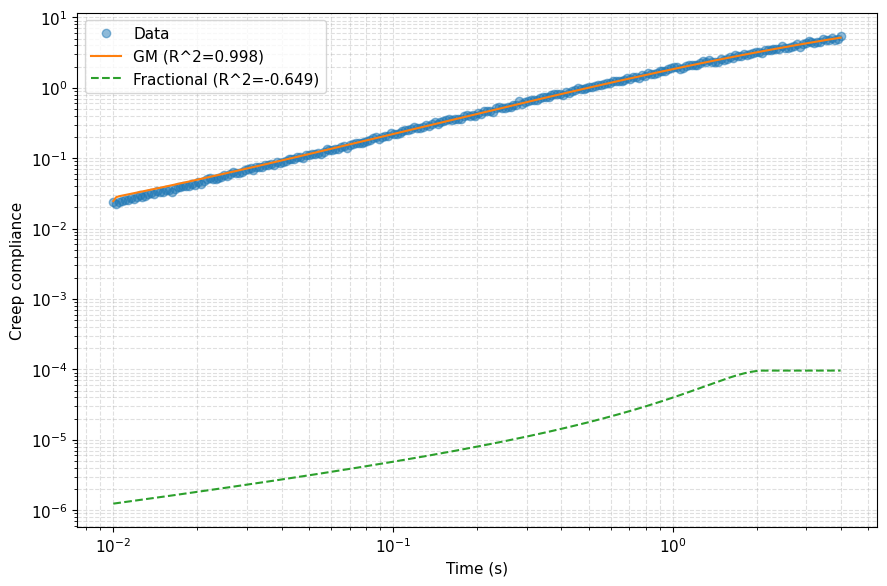

In [5]:
fig, ax = plt.subplots(figsize=(9,6))
ax.loglog(t, J, 'o', label='Data', alpha=0.5)
ax.loglog(t, gm_pred, '-', label=f'GM (R^2={gm_r2:.3f})')
ax.loglog(t, fm_pred, '--', label=f'Fractional (R^2={fm_r2:.3f})')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Creep compliance')
ax.grid(True, which='both', ls='--', alpha=0.4)
ax.legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.242557s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=25 | final_cost=4.443579e-01 | time=0.243s | final_gradient_norm=208417.21662571112


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


[WARNING] Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Timer: optimization took 0.662543s


Convergence: reason=Inner optimization loop exceeded maximum iterations. | iterations=1 | final_cost=1.249933e+02 | time=0.663s | final_gradient_norm=nan


NLSQ hit inner iteration limit; retrying with SciPy least_squares for stability.


Model ranking (R²): [('gm', 0.998), ('fm', -62647260551.339)]


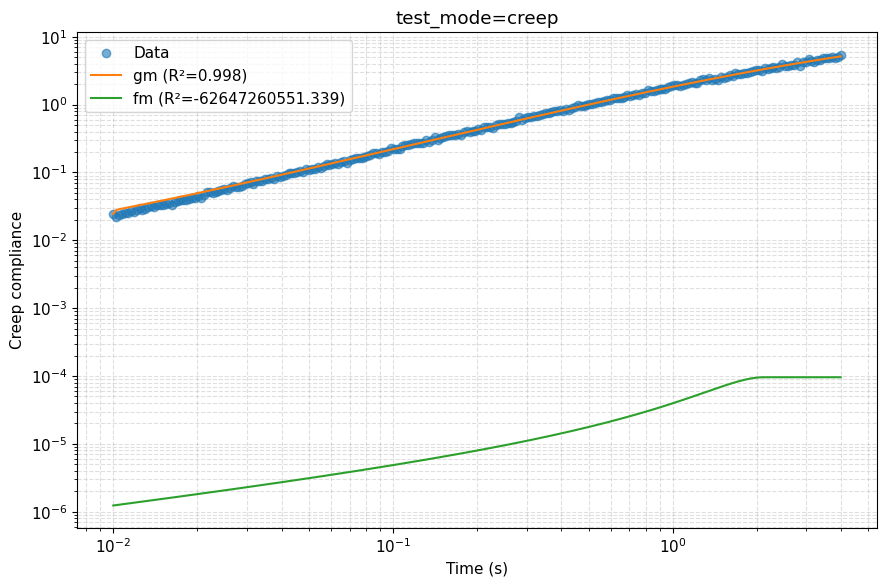

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   0%|          | 1/4000 [00:00<39:42,  1.68it/s, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   1%|▏         | 51/4000 [00:00<00:41, 95.06it/s, 863 steps of size 2.12e-03. acc. prob=0.73]

warmup:   2%|▏         | 77/4000 [00:00<00:33, 118.38it/s, 1023 steps of size 2.42e-03. acc. prob=0.75]

warmup:   2%|▏         | 99/4000 [00:01<00:33, 116.17it/s, 1023 steps of size 2.37e-03. acc. prob=0.75]

warmup:   3%|▎         | 117/4000 [00:01<00:38, 101.31it/s, 7 steps of size 1.29e-03. acc. prob=0.75]  

warmup:   3%|▎         | 132/4000 [00:01<00:42, 91.13it/s, 3 steps of size 6.99e-04. acc. prob=0.76] 

warmup:   4%|▎         | 144/4000 [00:01<00:46, 82.22it/s, 1023 steps of size 2.18e-03. acc. prob=0.76]

warmup:   4%|▍         | 154/4000 [00:01<00:46, 82.26it/s, 1023 steps of size 1.45e-03. acc. prob=0.76]

warmup:   4%|▍         | 164/4000 [00:01<00:45, 85.00it/s, 3 steps of size 6.12e-04. acc. prob=0.76]   

warmup:   4%|▍         | 174/4000 [00:02<00:46, 82.14it/s, 1023 steps of size 3.97e-03. acc. prob=0.76]

warmup:   5%|▍         | 183/4000 [00:02<00:47, 81.06it/s, 1023 steps of size 9.21e-03. acc. prob=0.77]

warmup:   5%|▍         | 192/4000 [00:02<00:50, 75.09it/s, 1023 steps of size 4.34e-03. acc. prob=0.77]

warmup:   5%|▌         | 200/4000 [00:02<00:50, 75.49it/s, 1023 steps of size 2.76e-03. acc. prob=0.77]

warmup:   5%|▌         | 208/4000 [00:02<00:50, 75.06it/s, 1023 steps of size 5.50e-03. acc. prob=0.77]

warmup:   5%|▌         | 217/4000 [00:02<00:48, 78.57it/s, 1023 steps of size 4.07e-03. acc. prob=0.77]

warmup:   6%|▌         | 227/4000 [00:02<00:45, 82.77it/s, 1023 steps of size 2.20e-03. acc. prob=0.77]

warmup:   6%|▌         | 236/4000 [00:02<00:50, 74.92it/s, 511 steps of size 2.49e-03. acc. prob=0.77] 

warmup:   6%|▌         | 244/4000 [00:03<00:53, 69.87it/s, 1023 steps of size 8.85e-03. acc. prob=0.77]

warmup:   6%|▋         | 253/4000 [00:03<00:50, 73.75it/s, 1023 steps of size 1.44e-03. acc. prob=0.77]

warmup:   7%|▋         | 261/4000 [00:03<00:49, 75.20it/s, 1023 steps of size 3.30e-03. acc. prob=0.77]

warmup:   7%|▋         | 269/4000 [00:03<00:52, 71.39it/s, 799 steps of size 2.62e-03. acc. prob=0.77] 

warmup:   7%|▋         | 277/4000 [00:03<00:51, 72.27it/s, 1023 steps of size 3.51e-03. acc. prob=0.77]

warmup:   7%|▋         | 285/4000 [00:03<00:54, 67.62it/s, 1023 steps of size 3.06e-03. acc. prob=0.77]

warmup:   7%|▋         | 293/4000 [00:03<00:52, 70.78it/s, 1023 steps of size 2.18e-03. acc. prob=0.77]

warmup:   8%|▊         | 301/4000 [00:03<00:56, 66.00it/s, 7 steps of size 1.90e-03. acc. prob=0.77]   

warmup:   8%|▊         | 309/4000 [00:03<00:55, 66.83it/s, 1023 steps of size 3.91e-03. acc. prob=0.78]

warmup:   8%|▊         | 316/4000 [00:04<00:54, 67.49it/s, 5 steps of size 8.61e-04. acc. prob=0.77]   

warmup:   8%|▊         | 323/4000 [00:04<00:55, 66.81it/s, 1023 steps of size 1.36e-03. acc. prob=0.77]

warmup:   8%|▊         | 330/4000 [00:04<00:58, 63.09it/s, 1023 steps of size 2.90e-03. acc. prob=0.78]

warmup:   8%|▊         | 337/4000 [00:04<00:58, 62.17it/s, 1023 steps of size 1.34e-03. acc. prob=0.78]

warmup:   9%|▊         | 345/4000 [00:04<00:57, 63.47it/s, 1023 steps of size 3.77e-03. acc. prob=0.78]

warmup:   9%|▉         | 353/4000 [00:04<00:55, 65.45it/s, 1023 steps of size 2.98e-03. acc. prob=0.78]

warmup:   9%|▉         | 360/4000 [00:04<00:57, 62.80it/s, 1023 steps of size 3.00e-03. acc. prob=0.78]

warmup:   9%|▉         | 367/4000 [00:04<00:57, 63.47it/s, 1023 steps of size 2.14e-03. acc. prob=0.78]

warmup:   9%|▉         | 374/4000 [00:04<00:57, 62.53it/s, 1023 steps of size 1.91e-03. acc. prob=0.78]

warmup:  10%|▉         | 383/4000 [00:05<00:53, 67.54it/s, 1023 steps of size 2.26e-03. acc. prob=0.78]

warmup:  10%|▉         | 390/4000 [00:05<00:55, 65.63it/s, 147 steps of size 2.42e-03. acc. prob=0.78] 

warmup:  10%|▉         | 397/4000 [00:05<00:55, 64.56it/s, 1023 steps of size 4.08e-03. acc. prob=0.78]

warmup:  10%|█         | 406/4000 [00:05<00:52, 68.24it/s, 1023 steps of size 4.09e-03. acc. prob=0.78]

warmup:  10%|█         | 413/4000 [00:05<00:55, 64.65it/s, 1023 steps of size 1.75e-03. acc. prob=0.78]

warmup:  10%|█         | 420/4000 [00:05<00:56, 62.86it/s, 1023 steps of size 2.03e-03. acc. prob=0.78]

warmup:  11%|█         | 427/4000 [00:05<00:55, 64.02it/s, 1023 steps of size 3.00e-03. acc. prob=0.78]

warmup:  11%|█         | 434/4000 [00:05<00:59, 60.41it/s, 511 steps of size 1.50e-03. acc. prob=0.78] 

warmup:  11%|█         | 441/4000 [00:06<01:00, 58.48it/s, 511 steps of size 4.16e-03. acc. prob=0.78]

warmup:  11%|█         | 448/4000 [00:06<00:57, 61.31it/s, 1023 steps of size 1.81e-03. acc. prob=0.78]

warmup:  11%|█▏        | 455/4000 [00:06<00:56, 62.78it/s, 1023 steps of size 1.10e-03. acc. prob=0.78]

warmup:  12%|█▏        | 462/4000 [00:06<00:58, 59.99it/s, 1023 steps of size 8.87e-04. acc. prob=0.78]

warmup:  12%|█▏        | 471/4000 [00:06<00:52, 66.73it/s, 1023 steps of size 6.52e-04. acc. prob=0.78]

warmup:  12%|█▏        | 478/4000 [00:06<00:55, 63.19it/s, 1023 steps of size 7.84e-04. acc. prob=0.78]

warmup:  12%|█▏        | 485/4000 [00:06<00:55, 63.38it/s, 1023 steps of size 1.64e-03. acc. prob=0.78]

warmup:  12%|█▏        | 492/4000 [00:06<00:56, 61.97it/s, 11 steps of size 3.93e-04. acc. prob=0.78]  

warmup:  12%|█▏        | 499/4000 [00:06<00:57, 60.43it/s, 1023 steps of size 7.22e-04. acc. prob=0.78]

warmup:  13%|█▎        | 506/4000 [00:07<00:56, 61.50it/s, 1023 steps of size 3.81e-04. acc. prob=0.78]

warmup:  13%|█▎        | 513/4000 [00:07<01:01, 57.07it/s, 1023 steps of size 9.57e-04. acc. prob=0.78]

warmup:  13%|█▎        | 519/4000 [00:07<01:00, 57.52it/s, 1023 steps of size 1.91e-03. acc. prob=0.78]

warmup:  13%|█▎        | 526/4000 [00:07<00:57, 60.00it/s, 1023 steps of size 1.16e-03. acc. prob=0.78]

warmup:  13%|█▎        | 533/4000 [00:07<00:55, 62.57it/s, 1023 steps of size 7.64e-04. acc. prob=0.78]

warmup:  14%|█▎        | 540/4000 [00:07<00:56, 61.04it/s, 3 steps of size 6.19e-04. acc. prob=0.78]   

warmup:  14%|█▍        | 550/4000 [00:07<00:48, 71.05it/s, 915 steps of size 1.10e-03. acc. prob=0.78]

warmup:  14%|█▍        | 558/4000 [00:07<00:54, 63.48it/s, 1023 steps of size 1.26e-03. acc. prob=0.78]

warmup:  14%|█▍        | 566/4000 [00:08<00:52, 64.90it/s, 1023 steps of size 7.15e-04. acc. prob=0.78]

warmup:  14%|█▍        | 573/4000 [00:08<00:54, 62.52it/s, 1023 steps of size 1.32e-03. acc. prob=0.78]

warmup:  14%|█▍        | 580/4000 [00:08<00:57, 59.80it/s, 1023 steps of size 1.01e-03. acc. prob=0.78]

warmup:  15%|█▍        | 587/4000 [00:08<00:55, 61.25it/s, 275 steps of size 1.11e-03. acc. prob=0.78] 

warmup:  15%|█▍        | 594/4000 [00:08<00:59, 57.18it/s, 1023 steps of size 1.10e-03. acc. prob=0.78]

warmup:  15%|█▌        | 600/4000 [00:08<00:59, 57.01it/s, 1023 steps of size 7.45e-04. acc. prob=0.78]

warmup:  15%|█▌        | 606/4000 [00:08<01:01, 54.81it/s, 1023 steps of size 5.86e-04. acc. prob=0.78]

warmup:  15%|█▌        | 612/4000 [00:08<01:03, 53.45it/s, 1023 steps of size 1.54e-03. acc. prob=0.78]

warmup:  16%|█▌        | 620/4000 [00:08<00:55, 60.36it/s, 1023 steps of size 6.28e-04. acc. prob=0.78]

warmup:  16%|█▌        | 627/4000 [00:09<00:58, 57.40it/s, 1023 steps of size 1.68e-03. acc. prob=0.78]

warmup:  16%|█▌        | 633/4000 [00:09<00:58, 57.96it/s, 1023 steps of size 9.15e-04. acc. prob=0.78]

warmup:  16%|█▌        | 640/4000 [00:09<00:55, 60.24it/s, 1023 steps of size 1.15e-03. acc. prob=0.78]

warmup:  16%|█▌        | 647/4000 [00:09<00:54, 61.17it/s, 1023 steps of size 2.00e-03. acc. prob=0.78]

warmup:  16%|█▋        | 654/4000 [00:09<00:56, 59.21it/s, 1023 steps of size 1.43e-03. acc. prob=0.78]

warmup:  17%|█▋        | 662/4000 [00:09<00:53, 61.88it/s, 1023 steps of size 1.16e-03. acc. prob=0.78]

warmup:  17%|█▋        | 669/4000 [00:09<00:54, 61.08it/s, 1023 steps of size 1.01e-03. acc. prob=0.78]

warmup:  17%|█▋        | 676/4000 [00:09<00:55, 60.00it/s, 767 steps of size 1.41e-03. acc. prob=0.78] 

warmup:  17%|█▋        | 683/4000 [00:10<00:55, 59.59it/s, 7 steps of size 9.55e-04. acc. prob=0.78]  

warmup:  17%|█▋        | 690/4000 [00:10<00:54, 60.38it/s, 1023 steps of size 1.46e-03. acc. prob=0.78]

warmup:  17%|█▋        | 697/4000 [00:10<00:58, 56.75it/s, 1023 steps of size 7.62e-04. acc. prob=0.78]

warmup:  18%|█▊        | 703/4000 [00:10<01:00, 54.53it/s, 1023 steps of size 6.18e-04. acc. prob=0.78]

warmup:  18%|█▊        | 709/4000 [00:10<00:58, 55.94it/s, 1023 steps of size 9.99e-04. acc. prob=0.78]

warmup:  18%|█▊        | 715/4000 [00:10<00:58, 55.74it/s, 1023 steps of size 9.10e-04. acc. prob=0.78]

warmup:  18%|█▊        | 722/4000 [00:10<00:57, 56.79it/s, 1023 steps of size 1.51e-03. acc. prob=0.78]

warmup:  18%|█▊        | 728/4000 [00:10<00:57, 57.13it/s, 1023 steps of size 1.08e-03. acc. prob=0.78]

warmup:  18%|█▊        | 736/4000 [00:10<00:52, 61.72it/s, 1023 steps of size 5.97e-04. acc. prob=0.78]

warmup:  19%|█▊        | 743/4000 [00:11<00:51, 62.66it/s, 3 steps of size 6.35e-04. acc. prob=0.78]   

warmup:  19%|█▉        | 750/4000 [00:11<00:50, 63.82it/s, 1023 steps of size 1.57e-03. acc. prob=0.79]

warmup:  19%|█▉        | 757/4000 [00:11<00:50, 64.31it/s, 1023 steps of size 1.19e-03. acc. prob=0.78]

warmup:  19%|█▉        | 764/4000 [00:11<00:54, 59.04it/s, 1023 steps of size 9.16e-04. acc. prob=0.78]

warmup:  19%|█▉        | 770/4000 [00:11<00:57, 55.79it/s, 1023 steps of size 1.13e-03. acc. prob=0.78]

warmup:  19%|█▉        | 777/4000 [00:11<00:59, 54.57it/s, 1023 steps of size 1.37e-03. acc. prob=0.79]

warmup:  20%|█▉        | 783/4000 [00:11<00:59, 53.63it/s, 1023 steps of size 1.05e-03. acc. prob=0.79]

warmup:  20%|█▉        | 789/4000 [00:11<00:59, 54.27it/s, 1023 steps of size 1.35e-03. acc. prob=0.79]

warmup:  20%|█▉        | 795/4000 [00:12<00:57, 55.41it/s, 1023 steps of size 1.09e-03. acc. prob=0.79]

warmup:  20%|██        | 801/4000 [00:12<00:56, 56.46it/s, 1023 steps of size 1.06e-03. acc. prob=0.79]

warmup:  20%|██        | 807/4000 [00:12<00:59, 53.51it/s, 1023 steps of size 9.54e-04. acc. prob=0.79]

warmup:  20%|██        | 813/4000 [00:12<01:01, 52.00it/s, 1023 steps of size 9.29e-04. acc. prob=0.79]

warmup:  21%|██        | 821/4000 [00:12<00:54, 58.01it/s, 1023 steps of size 9.41e-04. acc. prob=0.79]

warmup:  21%|██        | 829/4000 [00:12<00:52, 60.85it/s, 1023 steps of size 1.09e-03. acc. prob=0.79]

warmup:  21%|██        | 837/4000 [00:12<00:50, 62.78it/s, 1023 steps of size 1.34e-03. acc. prob=0.79]

warmup:  21%|██        | 844/4000 [00:12<00:53, 58.68it/s, 1023 steps of size 1.60e-03. acc. prob=0.79]

warmup:  21%|██▏       | 853/4000 [00:12<00:48, 64.76it/s, 1023 steps of size 8.27e-04. acc. prob=0.79]

warmup:  22%|██▏       | 860/4000 [00:13<00:49, 64.07it/s, 1023 steps of size 9.66e-04. acc. prob=0.79]

warmup:  22%|██▏       | 867/4000 [00:13<00:51, 61.19it/s, 1023 steps of size 1.58e-03. acc. prob=0.79]

warmup:  22%|██▏       | 874/4000 [00:13<00:50, 62.52it/s, 1023 steps of size 1.03e-03. acc. prob=0.79]

warmup:  22%|██▏       | 881/4000 [00:13<00:49, 62.69it/s, 1023 steps of size 6.82e-04. acc. prob=0.79]

warmup:  22%|██▏       | 888/4000 [00:13<00:54, 57.40it/s, 1023 steps of size 1.46e-03. acc. prob=0.79]

warmup:  22%|██▏       | 895/4000 [00:13<00:52, 58.94it/s, 1023 steps of size 9.52e-04. acc. prob=0.79]

warmup:  23%|██▎       | 901/4000 [00:13<00:54, 56.87it/s, 647 steps of size 1.17e-03. acc. prob=0.79] 

warmup:  23%|██▎       | 907/4000 [00:13<00:56, 54.97it/s, 1023 steps of size 9.65e-04. acc. prob=0.79]

warmup:  23%|██▎       | 913/4000 [00:14<00:55, 55.62it/s, 1023 steps of size 1.17e-03. acc. prob=0.79]

warmup:  23%|██▎       | 919/4000 [00:14<00:54, 56.72it/s, 15 steps of size 7.99e-04. acc. prob=0.79]  

warmup:  23%|██▎       | 926/4000 [00:14<00:52, 59.05it/s, 1023 steps of size 8.74e-04. acc. prob=0.79]

warmup:  23%|██▎       | 936/4000 [00:14<00:44, 68.21it/s, 1023 steps of size 1.28e-03. acc. prob=0.79]

warmup:  24%|██▎       | 943/4000 [00:14<00:45, 67.00it/s, 1023 steps of size 1.12e-03. acc. prob=0.79]

warmup:  24%|██▍       | 953/4000 [00:14<00:40, 75.03it/s, 1023 steps of size 5.38e-04. acc. prob=0.79]

warmup:  24%|██▍       | 961/4000 [00:14<00:40, 75.86it/s, 1023 steps of size 8.98e-04. acc. prob=0.79]

warmup:  24%|██▍       | 972/4000 [00:14<00:37, 80.84it/s, 1023 steps of size 2.76e-04. acc. prob=0.79]

warmup:  25%|██▍       | 981/4000 [00:14<00:42, 70.64it/s, 1023 steps of size 1.49e-03. acc. prob=0.79]

warmup:  25%|██▍       | 990/4000 [00:15<00:41, 72.64it/s, 1023 steps of size 8.21e-04. acc. prob=0.79]

warmup:  25%|██▍       | 998/4000 [00:15<00:41, 72.61it/s, 1023 steps of size 9.37e-04. acc. prob=0.79]

sample:  25%|██▌       | 1006/4000 [00:15<00:44, 67.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  25%|██▌       | 1014/4000 [00:15<00:42, 69.69it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  26%|██▌       | 1022/4000 [00:15<00:48, 60.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  26%|██▌       | 1029/4000 [00:15<00:52, 56.77it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  26%|██▌       | 1035/4000 [00:15<00:54, 54.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  26%|██▌       | 1041/4000 [00:15<00:56, 52.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  26%|██▌       | 1047/4000 [00:16<00:56, 52.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  26%|██▋       | 1054/4000 [00:16<00:53, 55.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1062/4000 [00:16<00:49, 59.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1070/4000 [00:16<00:46, 63.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1077/4000 [00:16<00:53, 54.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1083/4000 [00:16<00:53, 54.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1089/4000 [00:16<00:53, 54.80it/s, 15 steps of size 5.52e-04. acc. prob=0.96]  

sample:  27%|██▋       | 1095/4000 [00:16<00:54, 53.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1101/4000 [00:17<00:55, 52.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  28%|██▊       | 1107/4000 [00:17<00:56, 51.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  28%|██▊       | 1115/4000 [00:17<00:49, 57.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1121/4000 [00:17<00:52, 54.88it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1127/4000 [00:17<00:52, 54.94it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1133/4000 [00:17<00:53, 53.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1140/4000 [00:17<00:50, 56.87it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▊       | 1146/4000 [00:17<00:52, 54.10it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1152/4000 [00:17<00:54, 52.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1158/4000 [00:18<00:55, 51.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1164/4000 [00:18<00:55, 51.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1170/4000 [00:18<00:55, 50.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1176/4000 [00:18<00:55, 51.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|██▉       | 1182/4000 [00:18<00:55, 50.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|██▉       | 1188/4000 [00:18<00:53, 52.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|██▉       | 1195/4000 [00:18<00:49, 56.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|███       | 1201/4000 [00:18<00:50, 55.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|███       | 1207/4000 [00:19<00:49, 56.48it/s, 219 steps of size 5.52e-04. acc. prob=0.96] 

sample:  30%|███       | 1213/4000 [00:19<00:48, 57.37it/s, 947 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███       | 1221/4000 [00:19<00:45, 61.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███       | 1228/4000 [00:19<00:45, 60.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███       | 1236/4000 [00:19<00:43, 63.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███       | 1243/4000 [00:19<00:42, 64.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███▏      | 1250/4000 [00:19<00:46, 59.75it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███▏      | 1257/4000 [00:19<00:45, 60.43it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1264/4000 [00:19<00:47, 57.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1274/4000 [00:20<00:40, 67.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1281/4000 [00:20<00:41, 64.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1288/4000 [00:20<00:43, 61.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1295/4000 [00:20<00:44, 60.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1302/4000 [00:20<00:43, 61.46it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1309/4000 [00:20<00:44, 60.84it/s, 11 steps of size 5.52e-04. acc. prob=0.96]  

sample:  33%|███▎      | 1316/4000 [00:20<00:46, 57.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1322/4000 [00:20<00:48, 55.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1329/4000 [00:21<00:47, 56.70it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1335/4000 [00:21<00:47, 55.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▎      | 1342/4000 [00:21<00:46, 57.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▎      | 1348/4000 [00:21<00:48, 54.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1354/4000 [00:21<00:49, 53.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1360/4000 [00:21<00:53, 49.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1365/4000 [00:21<00:53, 49.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1371/4000 [00:21<00:51, 50.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1377/4000 [00:21<00:50, 51.74it/s, 811 steps of size 5.52e-04. acc. prob=0.96] 

sample:  35%|███▍      | 1383/4000 [00:22<00:49, 53.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▍      | 1389/4000 [00:22<00:47, 54.79it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▍      | 1395/4000 [00:22<00:48, 54.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▌      | 1401/4000 [00:22<00:49, 52.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▌      | 1407/4000 [00:22<00:49, 52.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▌      | 1413/4000 [00:22<00:49, 52.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▌      | 1419/4000 [00:22<00:49, 52.48it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  36%|███▌      | 1427/4000 [00:22<00:43, 59.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  36%|███▌      | 1434/4000 [00:22<00:43, 59.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  36%|███▌      | 1442/4000 [00:23<00:40, 63.91it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  36%|███▋      | 1452/4000 [00:23<00:36, 70.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  36%|███▋      | 1460/4000 [00:23<00:38, 65.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1467/4000 [00:23<00:41, 60.77it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1474/4000 [00:23<00:40, 62.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1481/4000 [00:23<00:41, 61.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1488/4000 [00:23<00:43, 58.34it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1494/4000 [00:23<00:45, 55.42it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1500/4000 [00:24<00:45, 54.69it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1506/4000 [00:24<00:44, 56.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1513/4000 [00:24<00:43, 57.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1520/4000 [00:24<00:42, 58.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1526/4000 [00:24<00:43, 56.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1532/4000 [00:24<00:45, 54.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▊      | 1543/4000 [00:24<00:35, 68.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▉      | 1551/4000 [00:24<00:39, 62.33it/s, 735 steps of size 5.52e-04. acc. prob=0.96] 

sample:  39%|███▉      | 1558/4000 [00:24<00:39, 62.34it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▉      | 1565/4000 [00:25<00:40, 60.67it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▉      | 1572/4000 [00:25<00:40, 60.48it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  39%|███▉      | 1579/4000 [00:25<00:45, 53.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|███▉      | 1585/4000 [00:25<00:47, 51.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|███▉      | 1591/4000 [00:25<00:48, 49.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|███▉      | 1597/4000 [00:25<00:46, 51.32it/s, 7 steps of size 5.52e-04. acc. prob=0.96]   

sample:  40%|████      | 1604/4000 [00:25<00:45, 53.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|████      | 1610/4000 [00:26<00:45, 52.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|████      | 1617/4000 [00:26<00:43, 55.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1623/4000 [00:26<00:42, 55.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1629/4000 [00:26<00:44, 53.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1635/4000 [00:26<00:43, 54.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1641/4000 [00:26<00:44, 52.46it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1647/4000 [00:26<00:43, 53.54it/s, 783 steps of size 5.52e-04. acc. prob=0.96] 

sample:  41%|████▏     | 1653/4000 [00:26<00:45, 51.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1660/4000 [00:26<00:42, 54.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1666/4000 [00:27<00:42, 55.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1672/4000 [00:27<00:43, 53.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1679/4000 [00:27<00:40, 56.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1685/4000 [00:27<00:42, 54.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1691/4000 [00:27<00:41, 55.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1697/4000 [00:27<00:43, 52.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1703/4000 [00:27<00:44, 51.47it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1710/4000 [00:27<00:42, 53.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1716/4000 [00:27<00:42, 54.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1722/4000 [00:28<00:43, 52.65it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1728/4000 [00:28<00:42, 53.29it/s, 83 steps of size 5.52e-04. acc. prob=0.96]  

sample:  43%|████▎     | 1735/4000 [00:28<00:39, 56.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▎     | 1741/4000 [00:28<00:39, 57.73it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  44%|████▎     | 1747/4000 [00:28<00:40, 56.32it/s, 3 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1753/4000 [00:28<00:40, 55.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1759/4000 [00:28<00:43, 51.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1765/4000 [00:28<00:43, 51.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1772/4000 [00:28<00:40, 54.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1778/4000 [00:29<00:41, 53.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▍     | 1784/4000 [00:29<00:42, 52.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▍     | 1790/4000 [00:29<00:43, 51.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▍     | 1796/4000 [00:29<00:42, 52.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▌     | 1802/4000 [00:29<00:42, 51.70it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▌     | 1808/4000 [00:29<00:42, 51.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▌     | 1814/4000 [00:29<00:41, 52.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1820/4000 [00:29<00:41, 51.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1826/4000 [00:30<00:42, 50.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1832/4000 [00:30<00:42, 50.56it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1838/4000 [00:30<00:41, 52.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1844/4000 [00:30<00:41, 51.62it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▋     | 1850/4000 [00:30<00:41, 51.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▋     | 1856/4000 [00:30<00:41, 51.34it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1862/4000 [00:30<00:40, 52.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1868/4000 [00:30<00:39, 54.62it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1874/4000 [00:30<00:39, 53.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1880/4000 [00:31<00:38, 54.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1886/4000 [00:31<00:39, 53.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1894/4000 [00:31<00:35, 59.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1901/4000 [00:31<00:34, 61.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1908/4000 [00:31<00:34, 61.47it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1915/4000 [00:31<00:36, 57.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1921/4000 [00:31<00:37, 55.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1927/4000 [00:31<00:37, 54.91it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1933/4000 [00:31<00:39, 52.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1939/4000 [00:32<00:41, 50.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▊     | 1946/4000 [00:32<00:38, 52.91it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1952/4000 [00:32<00:43, 47.35it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1957/4000 [00:32<00:43, 47.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1962/4000 [00:32<00:43, 46.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1967/4000 [00:32<00:44, 45.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1972/4000 [00:32<00:45, 44.83it/s, 7 steps of size 5.52e-04. acc. prob=0.96]   

sample:  49%|████▉     | 1977/4000 [00:32<00:47, 42.94it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|████▉     | 1982/4000 [00:33<00:53, 37.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|████▉     | 1986/4000 [00:33<01:00, 33.03it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|████▉     | 1990/4000 [00:33<01:10, 28.60it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|████▉     | 1996/4000 [00:33<00:58, 34.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|█████     | 2004/4000 [00:33<00:46, 43.35it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|█████     | 2011/4000 [00:33<00:40, 49.65it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|█████     | 2017/4000 [00:33<00:39, 49.89it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████     | 2025/4000 [00:34<00:35, 56.33it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████     | 2032/4000 [00:34<00:33, 59.54it/s, 335 steps of size 5.52e-04. acc. prob=0.96] 

sample:  51%|█████     | 2039/4000 [00:34<00:34, 56.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████     | 2045/4000 [00:34<00:36, 54.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████▏    | 2052/4000 [00:34<00:34, 57.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████▏    | 2058/4000 [00:34<00:34, 55.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2064/4000 [00:34<00:36, 53.51it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2071/4000 [00:34<00:35, 54.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2078/4000 [00:35<00:33, 56.75it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2085/4000 [00:35<00:33, 57.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2091/4000 [02:31<2:49:45,  5.34s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2096/4000 [02:31<2:07:43,  4.02s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2102/4000 [02:31<1:29:40,  2.84s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2110/4000 [02:31<57:11,  1.82s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]  

sample:  53%|█████▎    | 2116/4000 [02:31<41:14,  1.31s/it, 23 steps of size 5.52e-04. acc. prob=0.96]  

sample:  53%|█████▎    | 2122/4000 [02:31<29:34,  1.06it/s, 431 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2129/4000 [02:31<20:08,  1.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2135/4000 [02:32<14:34,  2.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▎    | 2141/4000 [02:32<10:29,  2.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▎    | 2149/4000 [02:32<06:53,  4.48it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2156/4000 [02:32<04:55,  6.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2163/4000 [02:32<03:35,  8.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2169/4000 [02:32<02:45, 11.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2176/4000 [02:32<02:01, 14.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▍    | 2183/4000 [02:32<01:32, 19.73it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  55%|█████▍    | 2190/4000 [02:32<01:11, 25.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▍    | 2198/4000 [02:33<00:56, 31.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▌    | 2205/4000 [02:33<00:47, 37.68it/s, 15 steps of size 5.52e-04. acc. prob=0.96]  

sample:  55%|█████▌    | 2212/4000 [02:33<00:41, 43.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▌    | 2219/4000 [02:33<00:39, 44.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2226/4000 [02:33<00:37, 47.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2232/4000 [02:33<00:36, 48.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2238/4000 [02:33<00:35, 49.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2244/4000 [02:33<00:34, 51.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▋    | 2250/4000 [02:34<00:34, 51.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▋    | 2256/4000 [02:34<00:33, 51.79it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2262/4000 [02:34<00:33, 51.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2269/4000 [02:34<00:31, 55.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2275/4000 [02:34<00:31, 55.64it/s, 455 steps of size 5.52e-04. acc. prob=0.96] 

sample:  57%|█████▋    | 2281/4000 [02:34<00:31, 54.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2287/4000 [02:34<00:33, 51.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2293/4000 [02:34<00:33, 50.51it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2299/4000 [02:34<00:35, 48.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2305/4000 [02:35<00:34, 49.03it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2310/4000 [02:35<00:36, 46.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2315/4000 [02:35<00:35, 46.94it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2320/4000 [02:35<00:41, 40.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2325/4000 [02:35<00:51, 32.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2329/4000 [02:35<01:04, 26.07it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2332/4000 [02:36<01:04, 25.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2335/4000 [02:36<01:13, 22.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2338/4000 [02:36<01:16, 21.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▊    | 2341/4000 [02:36<01:24, 19.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▊    | 2344/4000 [02:36<01:18, 21.13it/s, 483 steps of size 5.52e-04. acc. prob=0.96] 

sample:  59%|█████▊    | 2347/4000 [02:36<01:20, 20.59it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2350/4000 [02:37<01:25, 19.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2353/4000 [02:37<01:27, 18.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2355/4000 [02:37<01:30, 18.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2358/4000 [02:37<01:23, 19.75it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2361/4000 [02:37<01:19, 20.67it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2364/4000 [02:37<01:13, 22.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2367/4000 [02:37<01:18, 20.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2370/4000 [02:37<01:14, 22.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2373/4000 [02:38<01:08, 23.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2376/4000 [02:38<01:14, 21.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2379/4000 [02:38<01:09, 23.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|█████▉    | 2382/4000 [02:38<01:08, 23.46it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|█████▉    | 2385/4000 [02:38<01:05, 24.82it/s, 511 steps of size 5.52e-04. acc. prob=0.96] 

sample:  60%|█████▉    | 2388/4000 [02:38<01:05, 24.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|█████▉    | 2392/4000 [02:38<00:59, 26.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|█████▉    | 2395/4000 [02:38<01:03, 25.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|█████▉    | 2398/4000 [02:39<01:08, 23.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2401/4000 [02:39<01:11, 22.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2404/4000 [02:39<01:13, 21.59it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2407/4000 [02:39<01:13, 21.65it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2410/4000 [02:39<01:10, 22.53it/s, 511 steps of size 5.52e-04. acc. prob=0.96] 

sample:  60%|██████    | 2413/4000 [02:39<01:13, 21.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2416/4000 [02:40<01:16, 20.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2419/4000 [02:40<01:18, 20.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2422/4000 [02:40<01:18, 20.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2425/4000 [02:40<01:19, 19.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2427/4000 [02:40<01:19, 19.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2429/4000 [02:40<01:19, 19.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2432/4000 [02:40<01:18, 20.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2434/4000 [02:40<01:18, 19.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2437/4000 [02:41<01:17, 20.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2440/4000 [02:41<01:18, 19.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2443/4000 [02:41<01:10, 22.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2446/4000 [02:41<01:13, 21.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2449/4000 [02:41<01:15, 20.43it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████▏   | 2452/4000 [02:41<01:16, 20.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████▏   | 2455/4000 [02:41<01:16, 20.12it/s, 823 steps of size 5.52e-04. acc. prob=0.96] 

sample:  61%|██████▏   | 2458/4000 [02:42<01:18, 19.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2460/4000 [02:42<01:18, 19.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2463/4000 [02:42<01:09, 22.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2466/4000 [02:42<01:12, 21.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2469/4000 [02:42<01:06, 22.98it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  62%|██████▏   | 2472/4000 [02:42<01:11, 21.50it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2475/4000 [02:42<01:14, 20.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2478/4000 [02:42<01:08, 22.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2481/4000 [02:43<01:11, 21.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2484/4000 [02:43<01:05, 23.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2488/4000 [02:43<00:58, 25.79it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2491/4000 [02:43<01:03, 23.62it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2494/4000 [02:43<01:04, 23.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2497/4000 [02:43<01:05, 22.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▎   | 2500/4000 [02:43<01:02, 24.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2503/4000 [02:44<00:59, 25.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2506/4000 [02:44<00:58, 25.37it/s, 63 steps of size 5.52e-04. acc. prob=0.96]  

sample:  63%|██████▎   | 2509/4000 [02:44<00:59, 25.06it/s, 331 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2512/4000 [02:44<01:04, 23.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2516/4000 [02:44<00:55, 26.76it/s, 631 steps of size 5.52e-04. acc. prob=0.96] 

sample:  63%|██████▎   | 2519/4000 [02:44<00:59, 24.96it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2522/4000 [02:44<00:57, 25.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2525/4000 [02:44<00:55, 26.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2529/4000 [02:44<00:49, 30.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2533/4000 [02:45<00:57, 25.38it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2536/4000 [02:45<00:55, 26.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2539/4000 [02:45<00:59, 24.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▎   | 2543/4000 [02:45<00:57, 25.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▎   | 2546/4000 [02:45<01:01, 23.51it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2550/4000 [02:45<00:53, 27.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2553/4000 [02:45<00:59, 24.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2556/4000 [02:46<00:57, 25.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2559/4000 [02:46<00:55, 25.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2562/4000 [02:46<00:53, 26.71it/s, 599 steps of size 5.52e-04. acc. prob=0.96] 

sample:  64%|██████▍   | 2565/4000 [02:46<00:59, 24.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2569/4000 [02:46<00:57, 25.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2572/4000 [02:46<01:01, 23.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2575/4000 [02:46<00:57, 24.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2578/4000 [02:47<01:00, 23.48it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2581/4000 [02:47<01:03, 22.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2584/4000 [02:47<01:06, 21.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2587/4000 [02:47<01:08, 20.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2590/4000 [02:47<01:09, 20.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2593/4000 [02:47<01:10, 19.96it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2596/4000 [02:47<01:05, 21.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2599/4000 [02:48<01:08, 20.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▌   | 2602/4000 [02:48<01:02, 22.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▌   | 2605/4000 [02:48<00:58, 23.78it/s, 11 steps of size 5.52e-04. acc. prob=0.96]  

sample:  65%|██████▌   | 2608/4000 [02:48<01:02, 22.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▌   | 2611/4000 [02:48<01:05, 21.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▌   | 2614/4000 [02:48<01:00, 22.88it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▌   | 2617/4000 [02:48<01:03, 21.65it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2620/4000 [02:48<01:00, 22.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2623/4000 [02:49<01:04, 21.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2626/4000 [02:49<01:06, 20.59it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2629/4000 [02:49<01:05, 20.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2632/4000 [02:49<01:06, 20.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2635/4000 [02:49<01:06, 20.42it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2638/4000 [02:49<01:05, 20.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2641/4000 [02:49<01:00, 22.58it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2644/4000 [02:50<01:00, 22.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2647/4000 [02:50<01:03, 21.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▋   | 2650/4000 [02:50<01:05, 20.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▋   | 2653/4000 [02:50<00:59, 22.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▋   | 2656/4000 [02:50<01:01, 21.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▋   | 2659/4000 [02:50<01:02, 21.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2662/4000 [02:50<01:04, 20.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2665/4000 [02:51<00:59, 22.44it/s, 67 steps of size 5.52e-04. acc. prob=0.96]  

sample:  67%|██████▋   | 2668/4000 [02:51<00:55, 23.88it/s, 103 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2671/4000 [02:51<00:58, 22.70it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2674/4000 [02:51<01:02, 21.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2677/4000 [02:51<00:57, 23.03it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  67%|██████▋   | 2682/4000 [02:51<00:48, 26.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2685/4000 [02:51<00:54, 24.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2688/4000 [02:52<00:58, 22.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2691/4000 [02:52<01:02, 20.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2694/4000 [02:52<01:06, 19.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2697/4000 [02:52<01:07, 19.35it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2699/4000 [02:52<01:08, 19.07it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2701/4000 [02:52<01:10, 18.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2704/4000 [02:52<01:02, 20.77it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2707/4000 [02:53<01:04, 20.10it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2710/4000 [02:53<01:05, 19.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2713/4000 [02:53<01:01, 20.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2716/4000 [02:53<00:59, 21.67it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2719/4000 [02:53<00:57, 22.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2722/4000 [02:53<00:56, 22.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2725/4000 [02:53<00:56, 22.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2728/4000 [02:54<00:57, 22.03it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2731/4000 [02:54<00:58, 21.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2735/4000 [02:54<00:54, 23.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2738/4000 [02:54<00:57, 22.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▊   | 2741/4000 [02:54<00:52, 23.77it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  69%|██████▊   | 2744/4000 [02:54<00:50, 25.09it/s, 7 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▊   | 2747/4000 [02:54<00:54, 22.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2750/4000 [02:54<00:57, 21.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2753/4000 [02:55<01:00, 20.77it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2756/4000 [02:55<01:01, 20.38it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2759/4000 [02:55<01:02, 19.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2762/4000 [02:55<01:04, 19.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2764/4000 [02:55<01:04, 19.02it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2766/4000 [02:55<01:04, 19.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2768/4000 [02:55<01:05, 18.77it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2770/4000 [02:56<01:05, 18.87it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2773/4000 [02:56<01:03, 19.33it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2775/4000 [02:56<01:02, 19.47it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2777/4000 [02:56<01:02, 19.50it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2781/4000 [02:56<00:54, 22.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2784/4000 [02:56<00:54, 22.43it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2787/4000 [02:56<00:53, 22.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2790/4000 [02:56<00:54, 22.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2793/4000 [02:57<00:56, 21.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2796/4000 [02:57<00:58, 20.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2799/4000 [02:57<00:59, 20.33it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2802/4000 [02:57<00:53, 22.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2805/4000 [02:57<00:56, 21.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2808/4000 [02:57<00:58, 20.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2811/4000 [02:57<00:59, 20.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2814/4000 [02:58<01:00, 19.58it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2816/4000 [02:58<01:00, 19.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2818/4000 [02:58<01:00, 19.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2820/4000 [02:58<01:00, 19.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2822/4000 [02:58<01:01, 19.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2824/4000 [02:58<01:03, 18.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2826/4000 [02:58<01:05, 18.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2828/4000 [02:58<01:06, 17.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2830/4000 [02:59<01:05, 17.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2832/4000 [02:59<01:04, 18.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2835/4000 [02:59<01:00, 19.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2838/4000 [02:59<00:53, 21.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2841/4000 [02:59<00:48, 23.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2844/4000 [02:59<00:51, 22.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2847/4000 [02:59<00:50, 22.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████▏  | 2850/4000 [02:59<00:49, 23.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████▏  | 2853/4000 [03:00<00:52, 21.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████▏  | 2856/4000 [03:00<00:52, 21.89it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2860/4000 [03:00<00:47, 23.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2863/4000 [03:00<00:49, 22.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2866/4000 [03:00<00:51, 21.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2869/4000 [03:00<00:53, 21.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2872/4000 [03:00<00:53, 21.02it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2875/4000 [03:01<00:54, 20.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2878/4000 [03:01<00:50, 22.42it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2881/4000 [03:01<00:46, 24.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2884/4000 [03:01<00:45, 24.40it/s, 215 steps of size 5.52e-04. acc. prob=0.96] 

sample:  72%|███████▏  | 2887/4000 [03:01<00:44, 25.02it/s, 3 steps of size 5.52e-04. acc. prob=0.96]  

sample:  72%|███████▏  | 2890/4000 [03:01<00:43, 25.35it/s, 7 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2893/4000 [03:01<00:42, 26.34it/s, 863 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2897/4000 [03:01<00:37, 29.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▎  | 2900/4000 [03:01<00:43, 25.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2904/4000 [03:02<00:39, 27.51it/s, 743 steps of size 5.52e-04. acc. prob=0.96] 

sample:  73%|███████▎  | 2907/4000 [03:02<00:39, 27.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2910/4000 [03:02<00:46, 23.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2913/4000 [03:02<00:43, 24.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2919/4000 [03:02<00:34, 31.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2923/4000 [03:02<00:39, 27.56it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2926/4000 [03:02<00:41, 25.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2929/4000 [03:03<00:40, 26.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2932/4000 [03:03<00:40, 26.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2937/4000 [03:03<00:35, 30.11it/s, 1011 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▎  | 2941/4000 [03:03<00:35, 29.83it/s, 443 steps of size 5.52e-04. acc. prob=0.96] 

sample:  74%|███████▎  | 2945/4000 [03:03<00:40, 26.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▎  | 2948/4000 [03:03<00:43, 24.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2951/4000 [03:03<00:45, 23.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2954/4000 [03:04<00:46, 22.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2957/4000 [03:04<00:47, 21.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2960/4000 [03:04<00:44, 23.47it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2963/4000 [03:04<00:46, 22.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2966/4000 [03:04<00:48, 21.43it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2969/4000 [03:04<00:49, 20.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2972/4000 [03:04<00:50, 20.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2975/4000 [03:05<00:48, 21.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2978/4000 [03:05<00:50, 20.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2981/4000 [03:05<00:50, 20.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2984/4000 [03:05<00:47, 21.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2987/4000 [03:05<00:48, 20.87it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2990/4000 [03:05<00:44, 22.92it/s, 7 steps of size 5.52e-04. acc. prob=0.96]   

sample:  75%|███████▍  | 2993/4000 [03:05<00:45, 21.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2996/4000 [03:06<00:46, 21.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2999/4000 [03:06<00:48, 20.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3003/4000 [03:06<00:44, 22.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3006/4000 [03:06<00:41, 24.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3009/4000 [03:06<00:42, 23.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3012/4000 [03:06<00:44, 22.07it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3015/4000 [03:06<00:45, 21.65it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3018/4000 [03:07<00:47, 20.88it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3021/4000 [03:07<00:48, 20.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3024/4000 [03:07<00:46, 21.12it/s, 651 steps of size 5.52e-04. acc. prob=0.96] 

sample:  76%|███████▌  | 3027/4000 [03:07<00:47, 20.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3030/4000 [03:07<00:47, 20.59it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3033/4000 [03:07<00:47, 20.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3036/4000 [03:07<00:48, 19.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3039/4000 [03:08<00:48, 19.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3041/4000 [03:08<00:48, 19.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3044/4000 [03:08<00:43, 21.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3047/4000 [03:08<00:44, 21.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▋  | 3050/4000 [03:08<00:41, 22.88it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▋  | 3053/4000 [03:08<00:44, 21.38it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▋  | 3056/4000 [03:08<00:43, 21.76it/s, 527 steps of size 5.52e-04. acc. prob=0.96] 

sample:  76%|███████▋  | 3059/4000 [03:09<00:44, 21.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3062/4000 [03:09<00:46, 20.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3065/4000 [03:09<00:48, 19.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3067/4000 [03:09<00:48, 19.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3069/4000 [03:09<00:48, 19.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3071/4000 [03:09<00:48, 19.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3073/4000 [03:09<00:48, 19.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3075/4000 [03:09<00:48, 19.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3078/4000 [03:09<00:43, 21.08it/s, 563 steps of size 5.52e-04. acc. prob=0.96] 

sample:  77%|███████▋  | 3081/4000 [03:10<00:44, 20.71it/s, 803 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3084/4000 [03:10<00:45, 20.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3087/4000 [03:10<00:42, 21.59it/s, 327 steps of size 5.52e-04. acc. prob=0.96] 

sample:  77%|███████▋  | 3090/4000 [03:10<00:43, 20.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3093/4000 [03:10<00:42, 21.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3097/4000 [03:10<00:38, 23.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3101/4000 [03:10<00:34, 26.38it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3104/4000 [03:11<00:35, 25.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3107/4000 [03:11<00:38, 23.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3110/4000 [03:11<00:40, 21.91it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3113/4000 [03:11<00:42, 21.10it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3116/4000 [03:11<00:43, 20.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3120/4000 [03:11<00:38, 23.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3123/4000 [03:12<00:39, 22.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3126/4000 [03:12<00:41, 21.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3129/4000 [03:12<00:42, 20.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3132/4000 [03:12<00:43, 19.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3135/4000 [03:12<00:40, 21.59it/s, 7 steps of size 5.52e-04. acc. prob=0.96]   

sample:  78%|███████▊  | 3138/4000 [03:12<00:41, 20.58it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▊  | 3143/4000 [03:12<00:32, 26.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▊  | 3146/4000 [03:12<00:32, 26.58it/s, 183 steps of size 5.52e-04. acc. prob=0.96] 

sample:  79%|███████▉  | 3150/4000 [03:13<00:31, 26.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3153/4000 [03:13<00:31, 26.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3156/4000 [03:13<00:36, 23.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3159/4000 [03:13<00:38, 21.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3162/4000 [03:13<00:39, 21.20it/s, 871 steps of size 5.52e-04. acc. prob=0.96] 

sample:  79%|███████▉  | 3165/4000 [03:13<00:40, 20.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3168/4000 [03:14<00:39, 21.33it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3172/4000 [03:14<00:34, 24.29it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3176/4000 [03:14<00:31, 25.88it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3179/4000 [03:14<00:34, 23.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3183/4000 [03:14<00:32, 25.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3186/4000 [03:14<00:33, 23.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3189/4000 [03:14<00:35, 22.59it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3192/4000 [03:15<00:37, 21.62it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3195/4000 [03:15<00:38, 20.96it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3198/4000 [03:15<00:39, 20.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3201/4000 [03:15<00:39, 20.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3204/4000 [03:15<00:39, 20.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3207/4000 [03:15<00:40, 19.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3209/4000 [03:15<00:40, 19.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3212/4000 [03:16<00:40, 19.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3215/4000 [03:16<00:39, 19.75it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3218/4000 [03:16<00:36, 21.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████  | 3223/4000 [03:16<00:28, 27.65it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████  | 3231/4000 [03:16<00:19, 39.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████  | 3236/4000 [03:16<00:18, 41.58it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████  | 3241/4000 [03:16<00:17, 43.63it/s, 911 steps of size 5.52e-04. acc. prob=0.96] 

sample:  81%|████████  | 3248/4000 [03:16<00:15, 48.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████▏ | 3254/4000 [03:16<00:15, 49.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3260/4000 [03:17<00:14, 51.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3266/4000 [03:17<00:13, 53.20it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  82%|████████▏ | 3272/4000 [03:17<00:13, 54.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3278/4000 [03:17<00:13, 52.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3284/4000 [03:17<00:13, 52.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3290/4000 [03:17<00:13, 52.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3296/4000 [03:17<00:13, 51.42it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3302/4000 [03:17<00:13, 50.48it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3308/4000 [18:19<8:40:55, 45.17s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3313/4000 [18:19<6:20:55, 33.27s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3318/4000 [18:19<4:34:46, 24.17s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3323/4000 [18:19<3:16:11, 17.39s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3330/4000 [18:19<2:04:22, 11.14s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3336/4000 [18:19<1:25:38,  7.74s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▎ | 3342/4000 [18:19<59:07,  5.39s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]  

sample:  84%|████████▎ | 3348/4000 [18:19<40:54,  3.76s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3355/4000 [18:19<26:57,  2.51s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3362/4000 [18:20<18:04,  1.70s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3368/4000 [18:20<12:53,  1.22s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3374/4000 [18:20<09:08,  1.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3380/4000 [18:20<06:28,  1.60it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▍ | 3386/4000 [18:20<04:34,  2.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▍ | 3392/4000 [18:20<03:15,  3.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▍ | 3399/4000 [18:20<02:12,  4.53it/s, 883 steps of size 5.52e-04. acc. prob=0.96] 

sample:  85%|████████▌ | 3407/4000 [18:20<01:28,  6.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▌ | 3413/4000 [18:21<01:06,  8.83it/s, 919 steps of size 5.52e-04. acc. prob=0.96] 

sample:  86%|████████▌ | 3420/4000 [18:21<00:48, 12.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▌ | 3426/4000 [18:21<00:37, 15.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▌ | 3432/4000 [18:21<00:29, 18.96it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▌ | 3438/4000 [18:21<00:24, 23.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▌ | 3445/4000 [18:21<00:18, 29.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▋ | 3453/4000 [18:21<00:14, 37.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▋ | 3460/4000 [18:21<00:12, 43.33it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3467/4000 [18:21<00:11, 47.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3474/4000 [18:22<00:10, 48.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3480/4000 [18:22<00:10, 49.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3486/4000 [18:22<00:10, 49.42it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3492/4000 [18:22<00:09, 51.93it/s, 1 steps of size 5.52e-04. acc. prob=0.96]   

sample:  87%|████████▋ | 3498/4000 [18:22<00:09, 51.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3504/4000 [18:22<00:09, 52.10it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3511/4000 [18:22<00:08, 56.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3517/4000 [18:22<00:08, 54.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3523/4000 [18:22<00:08, 53.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3529/4000 [18:23<00:08, 54.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3535/4000 [18:23<00:08, 56.06it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  89%|████████▊ | 3541/4000 [18:23<00:08, 53.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▊ | 3547/4000 [18:23<00:08, 54.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3553/4000 [18:23<00:08, 54.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3559/4000 [18:23<00:08, 53.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3565/4000 [18:23<00:08, 51.67it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3571/4000 [18:23<00:08, 51.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3577/4000 [18:23<00:08, 50.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|████████▉ | 3583/4000 [31:49<4:39:49, 40.26s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|████████▉ | 3590/4000 [31:49<3:03:30, 26.85s/it, 11 steps of size 5.52e-04. acc. prob=0.96]  

sample:  90%|████████▉ | 3596/4000 [31:49<2:08:28, 19.08s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|█████████ | 3602/4000 [31:50<1:29:33, 13.50s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|█████████ | 3609/4000 [31:50<59:09,  9.08s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]  

sample:  90%|█████████ | 3615/4000 [31:50<41:35,  6.48s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████ | 3622/4000 [31:50<27:40,  4.39s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████ | 3628/4000 [31:50<19:32,  3.15s/it, 867 steps of size 5.52e-04. acc. prob=0.96] 

sample:  91%|█████████ | 3636/4000 [31:50<12:27,  2.05s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████ | 3642/4000 [31:50<08:55,  1.50s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████ | 3648/4000 [31:50<06:20,  1.08s/it, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████▏| 3654/4000 [31:50<04:29,  1.29it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3660/4000 [31:51<03:09,  1.79it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3666/4000 [31:51<02:13,  2.50it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3672/4000 [31:51<01:34,  3.48it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3678/4000 [31:51<01:06,  4.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3684/4000 [31:51<00:47,  6.62it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3691/4000 [31:51<00:32,  9.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3698/4000 [31:51<00:23, 12.88it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3704/4000 [31:51<00:18, 16.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3710/4000 [31:52<00:14, 20.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3717/4000 [31:52<00:10, 26.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3723/4000 [31:52<00:09, 30.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3730/4000 [31:52<00:07, 36.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3736/4000 [31:52<00:06, 38.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▎| 3742/4000 [31:52<00:05, 43.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▎| 3748/4000 [31:52<00:05, 46.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▍| 3754/4000 [31:52<00:05, 47.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▍| 3760/4000 [31:52<00:04, 50.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▍| 3767/4000 [31:53<00:04, 55.18it/s, 403 steps of size 5.52e-04. acc. prob=0.96] 

sample:  94%|█████████▍| 3773/4000 [31:53<00:04, 52.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▍| 3779/4000 [31:53<00:04, 51.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▍| 3785/4000 [31:53<00:04, 52.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▍| 3791/4000 [31:53<00:04, 49.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▍| 3797/4000 [31:53<00:04, 46.96it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▌| 3802/4000 [31:53<00:04, 45.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▌| 3807/4000 [31:53<00:04, 44.02it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▌| 3812/4000 [31:54<00:04, 42.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▌| 3817/4000 [31:54<00:04, 39.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3822/4000 [31:54<00:04, 37.59it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3826/4000 [31:54<00:04, 37.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3830/4000 [31:54<00:05, 32.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3834/4000 [31:54<00:05, 32.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3838/4000 [31:54<00:05, 27.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3841/4000 [31:55<00:06, 24.89it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3844/4000 [31:55<00:07, 20.46it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3847/4000 [31:55<00:08, 17.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3849/4000 [31:55<00:09, 16.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▋| 3851/4000 [31:55<00:09, 16.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▋| 3853/4000 [31:55<00:09, 15.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▋| 3855/4000 [31:56<00:10, 14.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▋| 3858/4000 [31:56<00:09, 15.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3861/4000 [31:56<00:08, 16.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3864/4000 [31:56<00:07, 17.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3866/4000 [31:56<00:08, 15.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3868/4000 [31:56<00:08, 15.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3870/4000 [31:57<00:08, 15.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3872/4000 [31:57<00:08, 15.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3875/4000 [31:57<00:06, 18.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3877/4000 [31:57<00:06, 18.34it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3880/4000 [31:57<00:06, 19.67it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3882/4000 [31:57<00:06, 19.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3884/4000 [31:57<00:06, 19.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3886/4000 [31:57<00:05, 19.35it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3889/4000 [31:57<00:05, 20.65it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3894/4000 [31:58<00:04, 26.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3897/4000 [31:58<00:04, 25.58it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3900/4000 [31:58<00:04, 23.94it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3903/4000 [31:58<00:03, 25.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3906/4000 [31:58<00:03, 26.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3909/4000 [31:58<00:03, 23.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3912/4000 [31:58<00:03, 24.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3915/4000 [31:59<00:03, 23.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3918/4000 [31:59<00:03, 21.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3921/4000 [31:59<00:03, 21.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3924/4000 [31:59<00:03, 21.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3927/4000 [31:59<00:03, 20.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3930/4000 [31:59<00:03, 22.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3933/4000 [31:59<00:03, 21.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3936/4000 [32:00<00:03, 20.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3939/4000 [32:00<00:03, 20.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▊| 3942/4000 [32:00<00:02, 19.94it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▊| 3945/4000 [32:00<00:02, 21.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▊| 3948/4000 [32:00<00:02, 22.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▉| 3955/4000 [32:00<00:01, 32.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▉| 3960/4000 [32:00<00:01, 36.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▉| 3966/4000 [32:00<00:00, 40.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▉| 3974/4000 [32:01<00:00, 49.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|█████████▉| 3980/4000 [32:01<00:00, 49.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|█████████▉| 3986/4000 [32:01<00:00, 51.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|█████████▉| 3993/4000 [32:01<00:00, 54.51it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|█████████▉| 3999/4000 [32:01<00:00, 53.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|██████████| 4000/4000 [32:01<00:00,  2.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 41/4000 [00:00<00:10, 374.82it/s, 511 steps of size 1.16e-03. acc. prob=0.71]

warmup:   2%|▏         | 86/4000 [00:00<00:09, 409.46it/s, 351 steps of size 2.87e-03. acc. prob=0.75]

warmup:   3%|▎         | 128/4000 [00:00<00:27, 141.90it/s, 35 steps of size 1.30e-03. acc. prob=0.76]

warmup:   4%|▍         | 154/4000 [00:01<00:37, 103.85it/s, 1023 steps of size 6.84e-04. acc. prob=0.76]

warmup:   4%|▍         | 173/4000 [00:01<00:42, 91.04it/s, 1023 steps of size 8.31e-04. acc. prob=0.76] 

warmup:   5%|▍         | 187/4000 [00:01<00:45, 84.21it/s, 1023 steps of size 1.71e-03. acc. prob=0.77]

warmup:   5%|▍         | 199/4000 [00:01<00:47, 79.25it/s, 831 steps of size 2.55e-03. acc. prob=0.77] 

warmup:   5%|▌         | 209/4000 [00:02<00:50, 74.70it/s, 1023 steps of size 2.86e-03. acc. prob=0.77]

warmup:   5%|▌         | 218/4000 [00:02<00:52, 71.83it/s, 1023 steps of size 2.27e-03. acc. prob=0.77]

warmup:   6%|▌         | 226/4000 [00:02<00:55, 68.20it/s, 1023 steps of size 1.30e-03. acc. prob=0.77]

warmup:   6%|▌         | 234/4000 [00:02<00:55, 67.74it/s, 1023 steps of size 4.50e-03. acc. prob=0.77]

warmup:   6%|▌         | 242/4000 [00:02<00:55, 67.42it/s, 1023 steps of size 1.67e-03. acc. prob=0.77]

warmup:   6%|▌         | 249/4000 [00:02<00:57, 64.92it/s, 1023 steps of size 3.12e-03. acc. prob=0.77]

warmup:   6%|▋         | 256/4000 [00:02<00:57, 65.18it/s, 1023 steps of size 2.11e-03. acc. prob=0.77]

warmup:   7%|▋         | 263/4000 [00:02<00:56, 65.78it/s, 1023 steps of size 2.00e-03. acc. prob=0.77]

warmup:   7%|▋         | 271/4000 [00:02<00:53, 69.07it/s, 1023 steps of size 7.80e-04. acc. prob=0.77]

warmup:   7%|▋         | 279/4000 [00:03<00:51, 71.94it/s, 1023 steps of size 5.93e-04. acc. prob=0.77]

warmup:   7%|▋         | 287/4000 [00:03<00:51, 72.03it/s, 1023 steps of size 7.32e-04. acc. prob=0.77]

warmup:   7%|▋         | 295/4000 [00:03<00:58, 63.71it/s, 1023 steps of size 1.17e-03. acc. prob=0.77]

warmup:   8%|▊         | 302/4000 [00:03<01:10, 52.77it/s, 1023 steps of size 7.81e-04. acc. prob=0.77]

warmup:   8%|▊         | 308/4000 [00:03<01:13, 50.30it/s, 1023 steps of size 1.03e-03. acc. prob=0.77]

warmup:   8%|▊         | 314/4000 [00:03<01:12, 50.95it/s, 5 steps of size 5.10e-04. acc. prob=0.77]   

warmup:   8%|▊         | 322/4000 [00:03<01:06, 55.11it/s, 1023 steps of size 1.06e-03. acc. prob=0.77]

warmup:   8%|▊         | 329/4000 [00:04<01:03, 58.13it/s, 1023 steps of size 6.90e-04. acc. prob=0.77]

warmup:   8%|▊         | 335/4000 [00:04<01:02, 58.47it/s, 1023 steps of size 1.08e-03. acc. prob=0.78]

warmup:   9%|▊         | 341/4000 [00:04<01:03, 57.26it/s, 1023 steps of size 1.20e-03. acc. prob=0.78]

warmup:   9%|▊         | 348/4000 [00:04<01:03, 57.91it/s, 1023 steps of size 1.38e-03. acc. prob=0.78]

warmup:   9%|▉         | 355/4000 [00:04<01:02, 58.28it/s, 1023 steps of size 8.93e-04. acc. prob=0.78]

warmup:   9%|▉         | 361/4000 [00:04<01:02, 58.17it/s, 1023 steps of size 9.63e-04. acc. prob=0.78]

warmup:   9%|▉         | 367/4000 [00:04<01:06, 55.03it/s, 1023 steps of size 5.97e-04. acc. prob=0.78]

warmup:   9%|▉         | 373/4000 [00:04<01:04, 55.83it/s, 1023 steps of size 7.90e-04. acc. prob=0.78]

warmup:   9%|▉         | 379/4000 [00:04<01:05, 55.67it/s, 1023 steps of size 1.09e-03. acc. prob=0.78]

warmup:  10%|▉         | 385/4000 [00:05<01:04, 56.18it/s, 1023 steps of size 1.16e-03. acc. prob=0.78]

warmup:  10%|▉         | 391/4000 [00:05<01:07, 53.47it/s, 1023 steps of size 6.11e-04. acc. prob=0.78]

warmup:  10%|▉         | 397/4000 [00:05<01:06, 54.49it/s, 1023 steps of size 7.88e-04. acc. prob=0.78]

warmup:  10%|█         | 403/4000 [00:05<01:05, 55.08it/s, 5 steps of size 4.99e-04. acc. prob=0.78]   

warmup:  10%|█         | 409/4000 [00:05<01:05, 54.79it/s, 1023 steps of size 9.79e-04. acc. prob=0.78]

warmup:  10%|█         | 415/4000 [00:05<01:07, 53.14it/s, 1023 steps of size 9.13e-04. acc. prob=0.78]

warmup:  11%|█         | 421/4000 [00:05<01:07, 52.90it/s, 1023 steps of size 1.35e-03. acc. prob=0.78]

warmup:  11%|█         | 427/4000 [00:05<01:09, 51.52it/s, 703 steps of size 7.16e-04. acc. prob=0.78] 

warmup:  11%|█         | 433/4000 [00:05<01:08, 51.72it/s, 335 steps of size 8.20e-04. acc. prob=0.78]

warmup:  11%|█         | 441/4000 [00:06<01:03, 56.37it/s, 1023 steps of size 1.34e-03. acc. prob=0.78]

warmup:  11%|█         | 447/4000 [00:06<01:05, 54.62it/s, 1023 steps of size 1.51e-03. acc. prob=0.78]

warmup:  11%|█▏        | 455/4000 [00:06<01:00, 58.91it/s, 1023 steps of size 1.08e-03. acc. prob=0.78]

warmup:  12%|█▏        | 461/4000 [00:06<01:00, 58.59it/s, 1023 steps of size 7.44e-04. acc. prob=0.78]

warmup:  12%|█▏        | 467/4000 [00:06<01:00, 58.48it/s, 1023 steps of size 1.04e-03. acc. prob=0.78]

warmup:  12%|█▏        | 473/4000 [00:06<01:01, 57.23it/s, 1023 steps of size 6.67e-04. acc. prob=0.78]

warmup:  12%|█▏        | 481/4000 [00:06<00:58, 60.40it/s, 1023 steps of size 8.80e-04. acc. prob=0.78]

warmup:  12%|█▏        | 489/4000 [00:06<00:53, 65.36it/s, 1023 steps of size 4.02e-04. acc. prob=0.78]

warmup:  12%|█▏        | 496/4000 [00:06<00:57, 60.53it/s, 1023 steps of size 6.50e-04. acc. prob=0.78]

warmup:  13%|█▎        | 503/4000 [00:07<00:56, 61.86it/s, 31 steps of size 3.82e-04. acc. prob=0.78]  

warmup:  13%|█▎        | 510/4000 [00:07<00:58, 59.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.78]

warmup:  13%|█▎        | 517/4000 [00:07<00:57, 60.91it/s, 171 steps of size 7.65e-04. acc. prob=0.78] 

warmup:  13%|█▎        | 524/4000 [00:07<00:58, 59.58it/s, 1023 steps of size 8.89e-04. acc. prob=0.78]

warmup:  13%|█▎        | 532/4000 [00:07<00:54, 63.90it/s, 1023 steps of size 4.63e-04. acc. prob=0.78]

warmup:  13%|█▎        | 539/4000 [00:07<00:58, 59.12it/s, 1023 steps of size 8.58e-04. acc. prob=0.78]

warmup:  14%|█▎        | 546/4000 [00:07<01:00, 57.22it/s, 1023 steps of size 6.50e-04. acc. prob=0.78]

warmup:  14%|█▍        | 552/4000 [00:07<01:03, 54.04it/s, 1023 steps of size 7.13e-04. acc. prob=0.78]

warmup:  14%|█▍        | 558/4000 [00:08<01:03, 54.37it/s, 1023 steps of size 8.24e-04. acc. prob=0.78]

warmup:  14%|█▍        | 567/4000 [00:08<00:54, 63.00it/s, 1023 steps of size 1.09e-03. acc. prob=0.78]

warmup:  14%|█▍        | 575/4000 [00:08<00:53, 64.48it/s, 1023 steps of size 1.83e-03. acc. prob=0.78]

warmup:  15%|█▍        | 582/4000 [00:08<00:54, 63.18it/s, 1023 steps of size 7.07e-04. acc. prob=0.78]

warmup:  15%|█▍        | 589/4000 [00:08<00:53, 63.74it/s, 1023 steps of size 1.04e-03. acc. prob=0.78]

warmup:  15%|█▍        | 596/4000 [00:08<00:55, 61.13it/s, 1023 steps of size 7.30e-04. acc. prob=0.78]

warmup:  15%|█▌        | 603/4000 [00:08<01:04, 52.66it/s, 1023 steps of size 8.24e-04. acc. prob=0.78]

warmup:  15%|█▌        | 609/4000 [00:08<01:03, 53.59it/s, 1023 steps of size 8.58e-04. acc. prob=0.78]

warmup:  15%|█▌        | 615/4000 [00:09<01:03, 53.52it/s, 1023 steps of size 9.16e-04. acc. prob=0.78]

warmup:  16%|█▌        | 621/4000 [00:09<01:04, 52.47it/s, 1023 steps of size 1.27e-03. acc. prob=0.78]

warmup:  16%|█▌        | 627/4000 [00:09<01:04, 52.05it/s, 1019 steps of size 9.78e-04. acc. prob=0.78]

warmup:  16%|█▌        | 634/4000 [00:09<01:00, 55.62it/s, 1023 steps of size 1.16e-03. acc. prob=0.78]

warmup:  16%|█▌        | 640/4000 [00:09<01:03, 53.25it/s, 1023 steps of size 1.35e-03. acc. prob=0.78]

warmup:  16%|█▌        | 646/4000 [00:09<01:02, 53.74it/s, 1023 steps of size 1.94e-03. acc. prob=0.78]

warmup:  16%|█▋        | 652/4000 [00:09<01:01, 54.42it/s, 1023 steps of size 1.09e-03. acc. prob=0.78]

warmup:  16%|█▋        | 658/4000 [00:09<01:03, 52.59it/s, 1023 steps of size 1.33e-03. acc. prob=0.78]

warmup:  17%|█▋        | 664/4000 [00:09<01:04, 51.54it/s, 1023 steps of size 1.62e-03. acc. prob=0.78]

warmup:  17%|█▋        | 671/4000 [00:10<01:01, 53.78it/s, 1023 steps of size 8.12e-04. acc. prob=0.78]

warmup:  17%|█▋        | 678/4000 [00:10<00:58, 57.13it/s, 1023 steps of size 1.47e-03. acc. prob=0.78]

warmup:  17%|█▋        | 684/4000 [00:10<00:58, 56.63it/s, 1023 steps of size 1.27e-03. acc. prob=0.78]

warmup:  17%|█▋        | 691/4000 [00:10<00:57, 57.66it/s, 1023 steps of size 1.04e-03. acc. prob=0.78]

warmup:  17%|█▋        | 699/4000 [00:10<00:53, 61.17it/s, 1023 steps of size 1.07e-03. acc. prob=0.78]

warmup:  18%|█▊        | 706/4000 [00:10<00:54, 60.17it/s, 1023 steps of size 1.59e-03. acc. prob=0.78]

warmup:  18%|█▊        | 713/4000 [00:10<00:58, 55.82it/s, 1023 steps of size 9.26e-04. acc. prob=0.78]

warmup:  18%|█▊        | 720/4000 [00:10<00:56, 58.16it/s, 1023 steps of size 1.37e-03. acc. prob=0.78]

warmup:  18%|█▊        | 726/4000 [00:11<00:57, 56.70it/s, 1023 steps of size 1.50e-03. acc. prob=0.79]

warmup:  18%|█▊        | 734/4000 [00:11<00:54, 59.99it/s, 1023 steps of size 9.73e-04. acc. prob=0.78]

warmup:  19%|█▊        | 741/4000 [00:11<00:55, 58.21it/s, 1023 steps of size 1.33e-03. acc. prob=0.79]

warmup:  19%|█▊        | 748/4000 [00:11<00:55, 58.34it/s, 1023 steps of size 6.87e-04. acc. prob=0.78]

warmup:  19%|█▉        | 754/4000 [00:11<00:58, 55.28it/s, 1023 steps of size 1.09e-03. acc. prob=0.79]

warmup:  19%|█▉        | 760/4000 [00:11<01:00, 53.20it/s, 1023 steps of size 1.38e-03. acc. prob=0.79]

warmup:  19%|█▉        | 768/4000 [00:11<00:56, 57.36it/s, 1023 steps of size 9.70e-04. acc. prob=0.79]

warmup:  19%|█▉        | 776/4000 [00:11<00:52, 61.06it/s, 1023 steps of size 1.39e-03. acc. prob=0.79]

warmup:  20%|█▉        | 784/4000 [00:11<00:48, 65.77it/s, 1023 steps of size 9.57e-04. acc. prob=0.79]

warmup:  20%|█▉        | 792/4000 [00:12<00:46, 69.34it/s, 1023 steps of size 1.07e-03. acc. prob=0.79]

warmup:  20%|██        | 800/4000 [00:12<00:47, 68.07it/s, 1023 steps of size 1.08e-03. acc. prob=0.79]

warmup:  20%|██        | 807/4000 [00:12<00:48, 65.32it/s, 1023 steps of size 9.96e-04. acc. prob=0.79]

warmup:  20%|██        | 814/4000 [00:12<00:51, 61.76it/s, 1023 steps of size 1.08e-03. acc. prob=0.79]

warmup:  21%|██        | 821/4000 [00:12<00:50, 62.59it/s, 511 steps of size 8.84e-04. acc. prob=0.79] 

warmup:  21%|██        | 828/4000 [00:12<00:52, 59.86it/s, 1023 steps of size 9.05e-04. acc. prob=0.79]

warmup:  21%|██        | 835/4000 [00:12<00:52, 59.83it/s, 1023 steps of size 8.47e-04. acc. prob=0.79]

warmup:  21%|██        | 842/4000 [00:12<00:51, 61.61it/s, 511 steps of size 1.12e-03. acc. prob=0.79] 

warmup:  21%|██        | 849/4000 [00:13<00:50, 62.49it/s, 1023 steps of size 1.61e-03. acc. prob=0.79]

warmup:  21%|██▏       | 856/4000 [00:13<00:50, 62.84it/s, 1023 steps of size 1.17e-03. acc. prob=0.79]

warmup:  22%|██▏       | 863/4000 [00:13<00:53, 59.04it/s, 1023 steps of size 1.47e-03. acc. prob=0.79]

warmup:  22%|██▏       | 870/4000 [00:13<00:53, 58.87it/s, 1023 steps of size 1.28e-03. acc. prob=0.79]

warmup:  22%|██▏       | 880/4000 [00:13<00:45, 68.82it/s, 511 steps of size 1.47e-03. acc. prob=0.79] 

warmup:  22%|██▏       | 888/4000 [00:13<00:46, 66.34it/s, 1023 steps of size 1.02e-03. acc. prob=0.79]

warmup:  22%|██▏       | 896/4000 [00:13<00:46, 67.26it/s, 1023 steps of size 8.52e-04. acc. prob=0.79]

warmup:  23%|██▎       | 903/4000 [00:13<00:46, 65.95it/s, 1023 steps of size 1.66e-03. acc. prob=0.79]

warmup:  23%|██▎       | 910/4000 [00:13<00:48, 63.89it/s, 1023 steps of size 1.47e-03. acc. prob=0.79]

warmup:  23%|██▎       | 917/4000 [00:14<00:50, 61.28it/s, 1023 steps of size 9.89e-04. acc. prob=0.79]

warmup:  23%|██▎       | 924/4000 [00:14<00:48, 63.49it/s, 1023 steps of size 1.11e-03. acc. prob=0.79]

warmup:  23%|██▎       | 931/4000 [00:14<00:49, 61.59it/s, 1023 steps of size 1.40e-03. acc. prob=0.79]

warmup:  23%|██▎       | 938/4000 [00:14<00:50, 60.44it/s, 1023 steps of size 7.88e-04. acc. prob=0.79]

warmup:  24%|██▎       | 945/4000 [00:14<00:55, 54.80it/s, 1023 steps of size 7.98e-04. acc. prob=0.79]

warmup:  24%|██▍       | 951/4000 [00:14<00:57, 53.23it/s, 1023 steps of size 1.86e-02. acc. prob=0.79]

warmup:  24%|██▍       | 960/4000 [00:14<00:51, 59.54it/s, 1023 steps of size 4.80e-04. acc. prob=0.79]

warmup:  24%|██▍       | 967/4000 [00:14<00:49, 61.30it/s, 1023 steps of size 9.78e-04. acc. prob=0.79]

warmup:  24%|██▍       | 977/4000 [00:15<00:43, 69.45it/s, 1023 steps of size 2.99e-04. acc. prob=0.79]

warmup:  25%|██▍       | 985/4000 [00:15<00:42, 70.48it/s, 1023 steps of size 3.47e-04. acc. prob=0.79]

warmup:  25%|██▍       | 993/4000 [00:15<00:46, 65.20it/s, 1023 steps of size 9.07e-04. acc. prob=0.79]

warmup:  25%|██▌       | 1000/4000 [00:15<00:48, 62.47it/s, 1023 steps of size 6.76e-04. acc. prob=0.79]

sample:  25%|██▌       | 1007/4000 [00:15<00:50, 59.04it/s, 1023 steps of size 6.76e-04. acc. prob=0.92]

sample:  25%|██▌       | 1013/4000 [00:15<00:50, 59.19it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  25%|██▌       | 1019/4000 [00:15<00:50, 58.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▌       | 1025/4000 [00:15<00:52, 56.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▌       | 1031/4000 [00:15<00:52, 56.95it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▌       | 1037/4000 [00:16<00:51, 57.53it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▌       | 1043/4000 [00:16<00:53, 55.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▋       | 1050/4000 [00:16<00:51, 57.63it/s, 887 steps of size 6.76e-04. acc. prob=0.94] 

sample:  26%|██▋       | 1057/4000 [00:16<00:50, 58.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  27%|██▋       | 1064/4000 [00:16<00:50, 58.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.92]

sample:  27%|██▋       | 1070/4000 [00:16<00:50, 57.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.92]

sample:  27%|██▋       | 1078/4000 [00:16<00:47, 61.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.92]

sample:  27%|██▋       | 1085/4000 [00:16<00:48, 59.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  27%|██▋       | 1091/4000 [00:16<00:49, 59.20it/s, 3 steps of size 6.76e-04. acc. prob=0.93]   

sample:  27%|██▋       | 1097/4000 [00:17<00:48, 59.40it/s, 7 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1103/4000 [00:17<00:49, 58.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1109/4000 [00:17<00:49, 58.19it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1115/4000 [00:17<00:51, 56.53it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1124/4000 [00:17<00:44, 64.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1132/4000 [00:17<00:43, 65.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1139/4000 [00:17<00:47, 60.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  29%|██▊       | 1147/4000 [00:17<00:45, 63.38it/s, 739 steps of size 6.76e-04. acc. prob=0.93] 

sample:  29%|██▉       | 1154/4000 [00:18<00:45, 63.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  29%|██▉       | 1161/4000 [00:18<00:46, 60.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  29%|██▉       | 1168/4000 [00:18<00:49, 57.63it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  29%|██▉       | 1175/4000 [00:18<00:47, 59.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|██▉       | 1182/4000 [00:18<00:49, 56.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|██▉       | 1188/4000 [00:18<00:49, 56.44it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|██▉       | 1194/4000 [00:18<00:51, 54.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|███       | 1200/4000 [00:18<00:54, 51.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|███       | 1206/4000 [00:18<00:54, 50.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|███       | 1214/4000 [00:19<00:49, 56.31it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███       | 1221/4000 [00:19<00:46, 59.50it/s, 723 steps of size 6.76e-04. acc. prob=0.93] 

sample:  31%|███       | 1228/4000 [00:19<00:50, 55.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███       | 1234/4000 [00:19<00:52, 52.62it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███       | 1241/4000 [00:19<00:50, 54.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███       | 1247/4000 [00:19<00:53, 51.88it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███▏      | 1253/4000 [00:19<00:54, 50.54it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███▏      | 1259/4000 [00:19<00:52, 52.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1267/4000 [00:20<00:48, 56.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1273/4000 [00:20<00:50, 53.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1281/4000 [00:20<00:46, 57.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1287/4000 [00:20<00:47, 57.59it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1293/4000 [00:20<00:48, 55.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1299/4000 [00:20<00:51, 52.59it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1305/4000 [00:20<00:52, 51.33it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1311/4000 [00:20<00:51, 52.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1318/4000 [00:21<00:48, 55.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1325/4000 [00:21<00:46, 57.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1331/4000 [00:21<00:49, 54.36it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1337/4000 [00:21<00:51, 52.18it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▎      | 1343/4000 [00:21<00:51, 51.61it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▎      | 1349/4000 [00:21<00:53, 50.01it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▍      | 1355/4000 [00:21<00:53, 49.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▍      | 1361/4000 [00:21<00:53, 49.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▍      | 1367/4000 [00:21<00:50, 51.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▍      | 1373/4000 [00:22<00:48, 53.98it/s, 3 steps of size 6.76e-04. acc. prob=0.93]   

sample:  34%|███▍      | 1380/4000 [00:22<00:46, 56.69it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▍      | 1386/4000 [00:22<00:47, 54.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▍      | 1392/4000 [00:22<00:47, 54.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▍      | 1398/4000 [00:22<00:46, 55.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▌      | 1405/4000 [00:22<00:44, 58.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▌      | 1411/4000 [00:22<00:46, 55.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▌      | 1417/4000 [00:22<00:48, 53.59it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▌      | 1423/4000 [00:22<00:47, 54.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▌      | 1429/4000 [00:23<00:46, 54.97it/s, 55 steps of size 6.76e-04. acc. prob=0.93]  

sample:  36%|███▌      | 1437/4000 [00:23<00:43, 59.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▌      | 1444/4000 [00:23<00:42, 60.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▋      | 1451/4000 [00:23<00:43, 59.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▋      | 1457/4000 [00:23<00:44, 57.44it/s, 555 steps of size 6.76e-04. acc. prob=0.93] 

sample:  37%|███▋      | 1463/4000 [00:23<00:46, 54.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1469/4000 [00:23<00:47, 52.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1475/4000 [00:23<00:49, 50.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1481/4000 [00:24<00:50, 50.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1487/4000 [00:24<00:50, 49.74it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  37%|███▋      | 1492/4000 [00:24<00:50, 49.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  37%|███▋      | 1497/4000 [00:24<00:51, 48.97it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1504/4000 [00:24<00:47, 52.36it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1510/4000 [00:24<00:47, 52.71it/s, 487 steps of size 6.76e-04. acc. prob=0.94] 

sample:  38%|███▊      | 1516/4000 [00:24<00:47, 52.05it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1522/4000 [00:24<00:48, 50.75it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1528/4000 [00:24<00:49, 50.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1534/4000 [00:25<00:49, 49.63it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1539/4000 [00:25<00:49, 49.54it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▊      | 1544/4000 [00:25<00:50, 48.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▊      | 1549/4000 [00:25<00:50, 48.65it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▉      | 1555/4000 [00:25<00:47, 51.32it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▉      | 1562/4000 [00:25<00:43, 56.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▉      | 1568/4000 [00:25<00:45, 53.04it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▉      | 1574/4000 [00:25<00:44, 54.68it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|███▉      | 1580/4000 [00:25<00:46, 52.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|███▉      | 1586/4000 [00:26<00:45, 53.54it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|███▉      | 1594/4000 [00:26<00:41, 57.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|████      | 1601/4000 [00:26<00:39, 60.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|████      | 1608/4000 [00:26<00:42, 56.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|████      | 1614/4000 [00:26<00:43, 55.25it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|████      | 1620/4000 [00:26<00:44, 53.62it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1626/4000 [00:26<00:45, 52.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1632/4000 [00:26<00:45, 52.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1638/4000 [00:27<00:43, 53.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1644/4000 [00:27<00:43, 53.90it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████▏     | 1650/4000 [00:27<00:44, 52.32it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████▏     | 1656/4000 [00:27<00:45, 51.08it/s, 659 steps of size 6.76e-04. acc. prob=0.94] 

sample:  42%|████▏     | 1662/4000 [00:27<00:46, 50.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1668/4000 [00:27<00:46, 50.54it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1676/4000 [00:27<00:41, 56.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1682/4000 [00:27<00:41, 56.18it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1688/4000 [00:27<00:40, 56.87it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  42%|████▏     | 1694/4000 [00:28<00:42, 54.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▎     | 1700/4000 [00:28<00:41, 55.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1707/4000 [00:28<00:40, 56.20it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1713/4000 [00:28<00:41, 55.37it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1719/4000 [00:28<00:42, 53.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1727/4000 [00:28<00:39, 57.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1733/4000 [00:28<00:41, 55.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1739/4000 [00:28<00:41, 53.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▎     | 1746/4000 [00:29<00:40, 55.68it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▍     | 1753/4000 [00:29<00:38, 58.44it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▍     | 1759/4000 [00:29<00:38, 58.18it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▍     | 1768/4000 [00:29<00:33, 66.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▍     | 1775/4000 [00:29<00:34, 63.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▍     | 1782/4000 [00:29<00:39, 56.38it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▍     | 1788/4000 [00:29<00:39, 55.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▍     | 1796/4000 [00:29<00:35, 61.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▌     | 1803/4000 [00:29<00:38, 56.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▌     | 1809/4000 [00:30<00:40, 53.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▌     | 1815/4000 [00:30<00:41, 52.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1821/4000 [00:30<00:42, 51.21it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1827/4000 [00:30<00:42, 50.86it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1833/4000 [00:30<00:41, 52.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1841/4000 [00:30<00:36, 59.74it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1848/4000 [00:30<00:38, 55.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▋     | 1854/4000 [00:30<00:38, 55.56it/s, 7 steps of size 6.76e-04. acc. prob=0.94]   

sample:  46%|████▋     | 1860/4000 [00:31<00:40, 53.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1867/4000 [00:31<00:37, 56.85it/s, 619 steps of size 6.76e-04. acc. prob=0.94] 

sample:  47%|████▋     | 1874/4000 [00:31<00:36, 58.14it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1881/4000 [00:31<00:34, 61.00it/s, 287 steps of size 6.76e-04. acc. prob=0.94] 

sample:  47%|████▋     | 1888/4000 [00:31<00:35, 59.86it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1895/4000 [00:31<00:37, 56.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1901/4000 [00:31<00:37, 55.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1907/4000 [00:31<00:37, 56.12it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1913/4000 [00:31<00:38, 54.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1919/4000 [00:32<00:39, 52.27it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1925/4000 [00:32<00:40, 50.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1931/4000 [00:32<00:39, 52.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1937/4000 [00:32<00:39, 51.88it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▊     | 1943/4000 [00:32<00:39, 52.00it/s, 567 steps of size 6.76e-04. acc. prob=0.94] 

sample:  49%|████▊     | 1949/4000 [00:32<00:38, 53.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1956/4000 [00:32<00:36, 56.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1963/4000 [00:32<00:35, 57.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1969/4000 [00:32<00:35, 57.38it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1975/4000 [00:33<00:37, 54.32it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|████▉     | 1981/4000 [00:33<00:36, 54.92it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  50%|████▉     | 1987/4000 [00:33<00:36, 55.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|████▉     | 1993/4000 [00:33<00:35, 56.33it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|████▉     | 1999/4000 [00:33<00:35, 56.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|█████     | 2005/4000 [00:33<00:35, 56.36it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|█████     | 2011/4000 [00:33<00:34, 57.06it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2021/4000 [00:33<00:29, 66.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2028/4000 [00:33<00:32, 60.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2035/4000 [00:34<00:34, 56.68it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2042/4000 [00:34<00:33, 58.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2049/4000 [00:34<00:33, 58.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2055/4000 [00:34<00:33, 57.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2064/4000 [00:34<00:29, 66.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2071/4000 [00:34<00:32, 59.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2078/4000 [00:34<00:34, 56.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2084/4000 [00:35<00:36, 52.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2090/4000 [00:35<00:35, 53.59it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2096/4000 [00:35<00:36, 52.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2102/4000 [00:35<00:35, 53.94it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2109/4000 [00:35<00:33, 56.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2115/4000 [00:35<00:33, 56.12it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2121/4000 [00:35<00:35, 53.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2127/4000 [00:35<00:34, 54.01it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2134/4000 [00:35<00:33, 55.56it/s, 995 steps of size 6.76e-04. acc. prob=0.94] 

sample:  54%|█████▎    | 2140/4000 [00:36<00:35, 53.05it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▎    | 2146/4000 [00:36<00:35, 52.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2152/4000 [00:36<00:34, 53.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2158/4000 [00:36<00:33, 54.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2165/4000 [00:36<00:31, 57.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2171/4000 [00:36<00:31, 58.28it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2178/4000 [00:36<00:30, 59.69it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2184/4000 [00:36<00:32, 56.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2190/4000 [00:36<00:33, 53.98it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2196/4000 [00:37<00:33, 54.31it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2202/4000 [00:37<00:32, 54.98it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2208/4000 [00:37<00:33, 54.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2214/4000 [00:37<00:34, 52.25it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2221/4000 [00:37<00:31, 55.67it/s, 511 steps of size 6.76e-04. acc. prob=0.94] 

sample:  56%|█████▌    | 2227/4000 [00:37<00:31, 56.13it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2234/4000 [00:37<00:31, 56.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2241/4000 [00:37<00:30, 57.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2247/4000 [00:37<00:32, 53.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2253/4000 [00:38<00:33, 51.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2260/4000 [00:38<00:32, 53.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2268/4000 [00:38<00:29, 58.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2276/4000 [00:38<00:27, 61.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2283/4000 [00:38<00:26, 63.70it/s, 283 steps of size 6.76e-04. acc. prob=0.94] 

sample:  57%|█████▋    | 2290/4000 [00:38<00:27, 62.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2297/4000 [00:38<00:28, 59.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2304/4000 [00:38<00:28, 59.70it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2311/4000 [00:39<00:27, 61.59it/s, 7 steps of size 6.76e-04. acc. prob=0.94]   

sample:  58%|█████▊    | 2318/4000 [00:39<00:28, 58.04it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2324/4000 [00:39<00:30, 55.11it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2330/4000 [00:39<00:31, 53.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2336/4000 [00:39<00:32, 51.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2342/4000 [00:39<00:32, 50.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2349/4000 [00:39<00:30, 53.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2356/4000 [00:39<00:30, 54.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2365/4000 [00:39<00:26, 61.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2372/4000 [00:40<00:27, 60.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2379/4000 [00:40<00:26, 60.10it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  60%|█████▉    | 2386/4000 [00:40<00:27, 58.06it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2392/4000 [00:40<00:27, 57.53it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2398/4000 [00:40<00:28, 55.86it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  60%|██████    | 2404/4000 [00:40<00:29, 54.31it/s, 839 steps of size 6.76e-04. acc. prob=0.94] 

sample:  60%|██████    | 2411/4000 [00:40<00:28, 56.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  60%|██████    | 2417/4000 [00:40<00:29, 53.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2424/4000 [00:41<00:28, 55.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2431/4000 [00:41<00:27, 57.39it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2437/4000 [00:41<00:28, 54.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2443/4000 [00:41<00:28, 54.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████▏   | 2450/4000 [00:41<00:26, 57.98it/s, 255 steps of size 6.76e-04. acc. prob=0.94] 

sample:  61%|██████▏   | 2456/4000 [00:41<00:28, 54.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2464/4000 [00:41<00:25, 60.68it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2471/4000 [00:41<00:25, 58.98it/s, 639 steps of size 6.76e-04. acc. prob=0.94] 

sample:  62%|██████▏   | 2477/4000 [00:41<00:27, 55.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2483/4000 [00:42<00:27, 55.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2489/4000 [00:42<00:27, 55.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2496/4000 [00:42<00:25, 59.50it/s, 759 steps of size 6.76e-04. acc. prob=0.94] 

sample:  63%|██████▎   | 2503/4000 [00:42<00:24, 61.15it/s, 3 steps of size 6.76e-04. acc. prob=0.94]  

sample:  63%|██████▎   | 2510/4000 [00:42<00:23, 62.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2517/4000 [00:42<00:23, 62.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2524/4000 [00:42<00:23, 63.17it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  63%|██████▎   | 2531/4000 [00:42<00:25, 58.06it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2537/4000 [00:43<00:26, 54.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▎   | 2543/4000 [00:43<00:28, 51.90it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▎   | 2549/4000 [00:43<00:27, 52.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2555/4000 [00:43<00:28, 51.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2561/4000 [00:43<00:28, 50.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2569/4000 [00:43<00:24, 57.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2575/4000 [00:43<00:24, 57.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▍   | 2581/4000 [00:43<00:24, 57.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▍   | 2587/4000 [00:43<00:25, 56.43it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  65%|██████▍   | 2593/4000 [00:44<00:26, 53.94it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2600/4000 [00:44<00:24, 56.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2607/4000 [00:44<00:23, 58.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2614/4000 [00:44<00:23, 58.44it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2620/4000 [00:44<00:24, 56.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2627/4000 [00:44<00:22, 60.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2634/4000 [00:44<00:24, 55.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2640/4000 [00:44<00:23, 56.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2646/4000 [00:44<00:23, 57.19it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▋   | 2652/4000 [00:45<00:24, 54.70it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2661/4000 [00:45<00:21, 62.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2668/4000 [00:45<00:22, 59.84it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  67%|██████▋   | 2675/4000 [00:45<00:22, 58.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2681/4000 [00:45<00:22, 57.58it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2687/4000 [00:45<00:24, 54.59it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2694/4000 [00:45<00:23, 55.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2700/4000 [00:45<00:23, 56.13it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2706/4000 [00:46<00:24, 53.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2713/4000 [00:46<00:22, 55.96it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2721/4000 [00:46<00:20, 61.09it/s, 631 steps of size 6.76e-04. acc. prob=0.94] 

sample:  68%|██████▊   | 2728/4000 [00:46<00:21, 59.01it/s, 795 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2736/4000 [00:46<00:20, 62.39it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▊   | 2743/4000 [00:46<00:19, 63.91it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2750/4000 [00:46<00:22, 54.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2759/4000 [00:46<00:19, 62.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2766/4000 [00:46<00:20, 59.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2773/4000 [00:47<00:22, 55.54it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2779/4000 [00:47<00:22, 53.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2786/4000 [00:47<00:21, 56.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2793/4000 [00:47<00:20, 59.20it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|███████   | 2803/4000 [00:47<00:17, 68.25it/s, 511 steps of size 6.76e-04. acc. prob=0.94] 

sample:  70%|███████   | 2811/4000 [00:47<00:17, 69.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|███████   | 2819/4000 [00:47<00:18, 64.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████   | 2826/4000 [00:47<00:18, 61.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████   | 2833/4000 [00:48<00:18, 62.99it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  71%|███████   | 2840/4000 [00:48<00:19, 60.20it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████   | 2847/4000 [00:48<00:19, 59.73it/s, 943 steps of size 6.76e-04. acc. prob=0.94] 

sample:  71%|███████▏  | 2854/4000 [00:48<00:20, 56.74it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2860/4000 [00:48<00:20, 56.32it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  72%|███████▏  | 2866/4000 [00:48<00:19, 56.86it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2872/4000 [00:48<00:20, 54.05it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2878/4000 [00:48<00:20, 54.90it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2884/4000 [00:49<00:21, 52.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2890/4000 [00:49<00:20, 54.30it/s, 723 steps of size 6.76e-04. acc. prob=0.94] 

sample:  72%|███████▏  | 2896/4000 [00:49<00:19, 55.65it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2905/4000 [00:49<00:17, 62.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2912/4000 [00:49<00:19, 57.00it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2922/4000 [00:49<00:16, 64.74it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2930/4000 [00:49<00:16, 66.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2937/4000 [00:49<00:17, 60.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▎  | 2944/4000 [00:50<00:18, 57.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2950/4000 [00:50<00:18, 55.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2956/4000 [00:50<00:19, 53.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2962/4000 [00:50<00:18, 54.84it/s, 731 steps of size 6.76e-04. acc. prob=0.94] 

sample:  74%|███████▍  | 2970/4000 [00:50<00:17, 60.33it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2977/4000 [00:50<00:16, 61.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2984/4000 [00:50<00:17, 56.98it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2990/4000 [00:50<00:17, 56.47it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2997/4000 [00:50<00:17, 57.09it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3003/4000 [00:51<00:17, 56.27it/s, 511 steps of size 6.76e-04. acc. prob=0.94] 

sample:  75%|███████▌  | 3009/4000 [00:51<00:17, 56.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3017/4000 [00:51<00:15, 61.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3024/4000 [00:51<00:15, 62.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3031/4000 [00:51<00:16, 57.21it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3037/4000 [00:51<00:16, 56.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3043/4000 [00:51<00:17, 55.65it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3050/4000 [00:51<00:16, 57.17it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3059/4000 [00:51<00:14, 64.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3066/4000 [00:52<00:14, 65.32it/s, 323 steps of size 6.76e-04. acc. prob=0.94] 

sample:  77%|███████▋  | 3073/4000 [00:52<00:14, 65.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3080/4000 [00:52<00:15, 59.12it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3087/4000 [00:52<00:17, 52.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3093/4000 [00:52<00:17, 53.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3099/4000 [00:52<00:16, 54.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3105/4000 [00:52<00:16, 53.63it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3112/4000 [00:52<00:15, 56.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3118/4000 [00:53<00:15, 57.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3124/4000 [00:53<00:15, 55.13it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3131/4000 [00:53<00:15, 55.95it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3138/4000 [00:53<00:14, 58.94it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▊  | 3146/4000 [00:53<00:13, 62.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3153/4000 [00:53<00:14, 59.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3159/4000 [00:53<00:14, 57.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3165/4000 [00:53<00:14, 57.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3171/4000 [00:53<00:14, 56.62it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3177/4000 [00:54<00:14, 55.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3184/4000 [00:54<00:14, 56.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3191/4000 [00:54<00:13, 60.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3198/4000 [00:54<00:14, 55.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|████████  | 3204/4000 [00:54<00:14, 56.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|████████  | 3210/4000 [00:54<00:14, 55.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|████████  | 3216/4000 [00:54<00:14, 55.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████  | 3222/4000 [00:54<00:14, 53.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████  | 3228/4000 [00:54<00:14, 52.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████  | 3235/4000 [00:55<00:14, 54.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████  | 3242/4000 [00:55<00:13, 57.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████  | 3248/4000 [00:55<00:13, 57.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████▏ | 3254/4000 [00:55<00:13, 57.38it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3260/4000 [00:55<00:13, 54.32it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3266/4000 [00:55<00:13, 55.31it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3272/4000 [00:55<00:13, 53.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3279/4000 [00:55<00:12, 55.62it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3285/4000 [00:56<00:12, 55.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3291/4000 [00:56<00:13, 52.53it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3297/4000 [00:56<00:13, 53.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3303/4000 [00:56<00:12, 54.87it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  83%|████████▎ | 3312/4000 [00:56<00:11, 61.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3319/4000 [00:56<00:11, 60.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3326/4000 [00:56<00:10, 61.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3333/4000 [00:56<00:11, 59.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▎ | 3341/4000 [00:56<00:10, 64.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▎ | 3348/4000 [00:57<00:10, 61.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3355/4000 [00:57<00:10, 60.69it/s, 919 steps of size 6.76e-04. acc. prob=0.94] 

sample:  84%|████████▍ | 3362/4000 [00:57<00:10, 61.73it/s, 779 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3369/4000 [00:57<00:11, 57.36it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3375/4000 [00:57<00:11, 55.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3381/4000 [00:57<00:10, 56.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3387/4000 [00:57<00:11, 54.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3393/4000 [00:57<00:11, 51.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3399/4000 [00:58<00:11, 51.25it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3405/4000 [00:58<00:11, 51.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3413/4000 [00:58<00:10, 57.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3419/4000 [00:58<00:11, 52.17it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3427/4000 [00:58<00:09, 58.70it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3434/4000 [00:58<00:09, 57.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3440/4000 [00:58<00:10, 54.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3446/4000 [00:58<00:10, 52.98it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3454/4000 [00:58<00:09, 57.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3460/4000 [00:59<00:09, 57.64it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3466/4000 [00:59<00:09, 54.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3472/4000 [00:59<00:09, 53.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3478/4000 [00:59<00:10, 51.44it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3486/4000 [00:59<00:09, 57.11it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3492/4000 [00:59<00:09, 54.69it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3499/4000 [00:59<00:08, 58.20it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3505/4000 [00:59<00:08, 56.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3511/4000 [01:00<00:08, 55.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3517/4000 [01:00<00:08, 55.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3523/4000 [01:00<00:08, 54.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3530/4000 [01:00<00:08, 57.88it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3536/4000 [01:00<00:08, 55.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▊ | 3544/4000 [01:00<00:07, 61.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3551/4000 [01:00<00:07, 58.70it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3557/4000 [01:00<00:08, 54.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3564/4000 [01:00<00:07, 57.46it/s, 427 steps of size 6.76e-04. acc. prob=0.94] 

sample:  89%|████████▉ | 3572/4000 [01:01<00:06, 61.37it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3579/4000 [01:01<00:06, 62.77it/s, 7 steps of size 6.76e-04. acc. prob=0.94]   

sample:  90%|████████▉ | 3586/4000 [01:01<00:06, 63.74it/s, 7 steps of size 6.76e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3593/4000 [01:01<00:07, 58.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3599/4000 [01:01<00:06, 57.49it/s, 367 steps of size 6.76e-04. acc. prob=0.94] 

sample:  90%|█████████ | 3605/4000 [01:01<00:07, 55.39it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  90%|█████████ | 3611/4000 [01:01<00:06, 56.09it/s, 943 steps of size 6.76e-04. acc. prob=0.94] 

sample:  90%|█████████ | 3617/4000 [01:01<00:07, 53.27it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  91%|█████████ | 3624/4000 [01:01<00:06, 55.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  91%|█████████ | 3631/4000 [01:02<00:06, 58.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  91%|█████████ | 3641/4000 [01:02<00:05, 69.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  91%|█████████ | 3649/4000 [01:02<00:05, 63.92it/s, 7 steps of size 6.76e-04. acc. prob=0.94]   

sample:  91%|█████████▏| 3656/4000 [01:02<00:05, 64.92it/s, 3 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3663/4000 [01:02<00:05, 59.09it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3672/4000 [01:02<00:05, 64.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3679/4000 [01:02<00:05, 63.32it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3687/4000 [01:02<00:04, 67.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3694/4000 [01:03<00:04, 63.37it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3701/4000 [01:03<00:05, 55.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3708/4000 [01:03<00:05, 56.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3714/4000 [01:03<00:05, 56.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3720/4000 [01:03<00:04, 56.80it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3727/4000 [01:03<00:04, 60.09it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3734/4000 [01:03<00:04, 59.36it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▎| 3741/4000 [01:03<00:04, 58.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▎| 3748/4000 [01:03<00:04, 60.33it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3755/4000 [01:04<00:04, 56.04it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3762/4000 [01:04<00:04, 58.97it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3769/4000 [01:04<00:03, 57.96it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3775/4000 [01:04<00:04, 55.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3781/4000 [01:04<00:04, 53.32it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3787/4000 [01:04<00:04, 51.18it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3794/4000 [01:04<00:03, 55.89it/s, 751 steps of size 6.76e-04. acc. prob=0.94] 

sample:  95%|█████████▌| 3800/4000 [01:04<00:03, 53.68it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3806/4000 [01:05<00:03, 51.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3813/4000 [01:05<00:03, 56.58it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3820/4000 [01:05<00:03, 58.86it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3826/4000 [01:05<00:03, 55.01it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3832/4000 [01:05<00:03, 52.61it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3838/4000 [01:05<00:02, 54.23it/s, 147 steps of size 6.76e-04. acc. prob=0.94] 

sample:  96%|█████████▌| 3845/4000 [01:05<00:02, 58.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▋| 3851/4000 [01:05<00:02, 55.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▋| 3857/4000 [01:05<00:02, 53.21it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3863/4000 [01:06<00:02, 52.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3869/4000 [01:06<00:02, 50.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3875/4000 [01:06<00:02, 52.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3882/4000 [01:06<00:02, 56.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3888/4000 [01:06<00:01, 57.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3894/4000 [01:06<00:01, 56.46it/s, 795 steps of size 6.76e-04. acc. prob=0.94] 

sample:  98%|█████████▊| 3900/4000 [01:06<00:01, 56.72it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3906/4000 [01:06<00:01, 56.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3912/4000 [01:06<00:01, 54.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3918/4000 [01:07<00:01, 52.54it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3925/4000 [01:07<00:01, 55.53it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3931/4000 [01:07<00:01, 53.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3937/4000 [01:07<00:01, 54.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▊| 3943/4000 [01:07<00:01, 55.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3951/4000 [01:07<00:00, 61.47it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3958/4000 [01:07<00:00, 56.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3964/4000 [01:07<00:00, 54.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3970/4000 [01:08<00:00, 54.08it/s, 371 steps of size 6.76e-04. acc. prob=0.94] 

sample:  99%|█████████▉| 3976/4000 [01:08<00:00, 52.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3982/4000 [01:08<00:00, 53.75it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3988/4000 [01:08<00:00, 54.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3994/4000 [01:08<00:00, 52.09it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [01:08<00:00, 53.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [01:08<00:00, 58.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 35/4000 [00:00<00:11, 338.20it/s, 771 steps of size 2.07e-03. acc. prob=0.71]

warmup:   2%|▏         | 69/4000 [00:00<00:12, 317.18it/s, 63 steps of size 2.07e-03. acc. prob=0.74] 

warmup:   3%|▎         | 101/4000 [00:00<00:14, 274.68it/s, 1023 steps of size 2.27e-02. acc. prob=0.75]

warmup:   3%|▎         | 129/4000 [00:00<00:20, 185.79it/s, 225 steps of size 2.13e-02. acc. prob=0.76] 

warmup:   4%|▍         | 151/4000 [00:00<00:26, 147.86it/s, 1 steps of size 5.18e-02. acc. prob=0.76]  

warmup:   4%|▍         | 169/4000 [00:01<00:32, 118.37it/s, 1023 steps of size 1.67e-03. acc. prob=0.76]

warmup:   5%|▍         | 183/4000 [00:01<00:37, 102.41it/s, 1023 steps of size 1.55e-03. acc. prob=0.76]

warmup:   5%|▍         | 195/4000 [00:01<00:42, 89.37it/s, 1023 steps of size 2.76e-03. acc. prob=0.77] 

warmup:   5%|▌         | 205/4000 [00:01<00:46, 81.60it/s, 1023 steps of size 1.13e-03. acc. prob=0.77]

warmup:   5%|▌         | 214/4000 [00:01<00:49, 76.89it/s, 1023 steps of size 1.17e-03. acc. prob=0.77]

warmup:   6%|▌         | 222/4000 [00:01<00:53, 71.24it/s, 1023 steps of size 1.19e-03. acc. prob=0.77]

warmup:   6%|▌         | 230/4000 [00:02<00:53, 70.12it/s, 1023 steps of size 7.74e-04. acc. prob=0.77]

warmup:   6%|▌         | 238/4000 [00:02<00:57, 66.00it/s, 1023 steps of size 8.99e-04. acc. prob=0.77]

warmup:   6%|▌         | 248/4000 [00:02<00:53, 70.18it/s, 1023 steps of size 2.01e-03. acc. prob=0.77]

warmup:   6%|▋         | 260/4000 [00:02<00:46, 80.62it/s, 1023 steps of size 3.05e-03. acc. prob=0.77]

warmup:   7%|▋         | 269/4000 [00:02<00:45, 81.94it/s, 1023 steps of size 2.56e-03. acc. prob=0.77]

warmup:   7%|▋         | 278/4000 [00:02<00:47, 78.21it/s, 1023 steps of size 2.76e-03. acc. prob=0.77]

warmup:   7%|▋         | 286/4000 [00:02<00:48, 76.91it/s, 1023 steps of size 8.22e-04. acc. prob=0.77]

warmup:   7%|▋         | 298/4000 [00:02<00:43, 84.30it/s, 1023 steps of size 1.32e-03. acc. prob=0.77]

warmup:   8%|▊         | 307/4000 [00:02<00:45, 81.38it/s, 1023 steps of size 2.26e-03. acc. prob=0.77]

warmup:   8%|▊         | 316/4000 [00:03<00:46, 78.97it/s, 1023 steps of size 1.39e-03. acc. prob=0.77]

warmup:   8%|▊         | 324/4000 [00:03<00:50, 72.78it/s, 1023 steps of size 4.76e-03. acc. prob=0.78]

warmup:   8%|▊         | 332/4000 [00:03<00:53, 68.39it/s, 1023 steps of size 3.56e-03. acc. prob=0.78]

warmup:   8%|▊         | 340/4000 [00:03<00:53, 68.82it/s, 1023 steps of size 2.87e-03. acc. prob=0.78]

warmup:   9%|▊         | 348/4000 [00:03<00:53, 68.38it/s, 1023 steps of size 4.39e-03. acc. prob=0.78]

warmup:   9%|▉         | 355/4000 [00:03<00:54, 66.91it/s, 1023 steps of size 2.55e-03. acc. prob=0.78]

warmup:   9%|▉         | 362/4000 [00:03<00:55, 65.23it/s, 703 steps of size 1.98e-03. acc. prob=0.78] 

warmup:   9%|▉         | 370/4000 [00:03<00:53, 67.68it/s, 1023 steps of size 3.31e-03. acc. prob=0.78]

warmup:   9%|▉         | 378/4000 [00:04<00:52, 69.59it/s, 511 steps of size 4.96e-03. acc. prob=0.78] 

warmup:  10%|▉         | 388/4000 [00:04<00:46, 77.68it/s, 875 steps of size 3.52e-03. acc. prob=0.78]

warmup:  10%|▉         | 396/4000 [00:04<00:48, 74.89it/s, 1023 steps of size 2.71e-03. acc. prob=0.78]

warmup:  10%|█         | 404/4000 [00:04<00:50, 71.84it/s, 1023 steps of size 3.33e-03. acc. prob=0.78]

warmup:  10%|█         | 412/4000 [00:04<00:49, 71.94it/s, 1023 steps of size 4.00e-03. acc. prob=0.78]

warmup:  10%|█         | 420/4000 [00:04<00:49, 72.37it/s, 1023 steps of size 2.07e-03. acc. prob=0.78]

warmup:  11%|█         | 428/4000 [00:04<00:49, 72.30it/s, 1023 steps of size 2.20e-03. acc. prob=0.78]

warmup:  11%|█         | 436/4000 [00:04<00:50, 70.69it/s, 263 steps of size 3.11e-03. acc. prob=0.78] 

warmup:  11%|█         | 444/4000 [00:04<00:49, 72.34it/s, 739 steps of size 2.94e-03. acc. prob=0.78]

warmup:  11%|█▏        | 454/4000 [00:05<00:45, 78.27it/s, 1023 steps of size 7.35e-04. acc. prob=0.78]

warmup:  12%|█▏        | 462/4000 [00:05<00:47, 75.06it/s, 1023 steps of size 1.48e-03. acc. prob=0.78]

warmup:  12%|█▏        | 470/4000 [00:05<00:47, 73.70it/s, 639 steps of size 7.23e-04. acc. prob=0.78] 

warmup:  12%|█▏        | 478/4000 [00:05<00:50, 69.82it/s, 3 steps of size 2.32e-04. acc. prob=0.78]  

warmup:  12%|█▏        | 486/4000 [00:05<00:48, 71.76it/s, 1023 steps of size 1.47e-03. acc. prob=0.78]

warmup:  12%|█▏        | 494/4000 [00:05<00:51, 67.52it/s, 1023 steps of size 9.85e-04. acc. prob=0.78]

warmup:  13%|█▎        | 501/4000 [00:05<00:53, 65.02it/s, 1023 steps of size 1.60e-03. acc. prob=0.78]

warmup:  13%|█▎        | 511/4000 [00:05<00:48, 72.66it/s, 1023 steps of size 1.47e-03. acc. prob=0.78]

warmup:  13%|█▎        | 519/4000 [00:06<00:50, 69.15it/s, 1023 steps of size 5.29e-04. acc. prob=0.78]

warmup:  13%|█▎        | 527/4000 [00:06<00:54, 64.31it/s, 1023 steps of size 9.35e-04. acc. prob=0.78]

warmup:  13%|█▎        | 534/4000 [00:06<00:59, 58.46it/s, 1023 steps of size 1.30e-03. acc. prob=0.78]

warmup:  14%|█▎        | 540/4000 [00:06<00:59, 58.55it/s, 1023 steps of size 1.65e-03. acc. prob=0.78]

warmup:  14%|█▎        | 546/4000 [00:06<00:58, 58.75it/s, 1023 steps of size 1.33e-03. acc. prob=0.78]

warmup:  14%|█▍        | 552/4000 [00:06<00:58, 58.57it/s, 1023 steps of size 1.61e-03. acc. prob=0.78]

warmup:  14%|█▍        | 559/4000 [00:06<00:56, 60.64it/s, 1023 steps of size 1.11e-03. acc. prob=0.78]

warmup:  14%|█▍        | 566/4000 [00:06<00:55, 61.95it/s, 1023 steps of size 1.25e-03. acc. prob=0.78]

warmup:  14%|█▍        | 573/4000 [00:06<00:55, 61.81it/s, 479 steps of size 1.00e-03. acc. prob=0.78] 

warmup:  14%|█▍        | 580/4000 [00:07<00:57, 59.37it/s, 1023 steps of size 1.22e-03. acc. prob=0.78]

warmup:  15%|█▍        | 586/4000 [00:07<00:57, 59.13it/s, 1023 steps of size 1.18e-03. acc. prob=0.78]

warmup:  15%|█▍        | 592/4000 [00:07<01:02, 54.91it/s, 1023 steps of size 1.15e-03. acc. prob=0.78]

warmup:  15%|█▍        | 599/4000 [00:07<00:59, 56.81it/s, 1023 steps of size 1.18e-03. acc. prob=0.78]

warmup:  15%|█▌        | 605/4000 [00:07<01:02, 54.40it/s, 1023 steps of size 1.47e-03. acc. prob=0.78]

warmup:  15%|█▌        | 612/4000 [00:07<01:01, 55.41it/s, 1023 steps of size 1.12e-03. acc. prob=0.78]

warmup:  15%|█▌        | 618/4000 [00:07<01:04, 52.60it/s, 1023 steps of size 1.09e-03. acc. prob=0.78]

warmup:  16%|█▌        | 624/4000 [00:07<01:06, 51.06it/s, 1023 steps of size 1.18e-03. acc. prob=0.78]

warmup:  16%|█▌        | 631/4000 [00:08<01:03, 53.17it/s, 1023 steps of size 1.59e-03. acc. prob=0.78]

warmup:  16%|█▌        | 639/4000 [00:08<00:58, 57.17it/s, 1023 steps of size 1.23e-03. acc. prob=0.78]

warmup:  16%|█▌        | 645/4000 [00:08<00:58, 57.36it/s, 9 steps of size 1.09e-03. acc. prob=0.78]   

warmup:  16%|█▋        | 651/4000 [00:08<00:58, 57.74it/s, 3 steps of size 6.64e-04. acc. prob=0.78]

warmup:  16%|█▋        | 657/4000 [00:08<01:01, 54.50it/s, 1023 steps of size 9.58e-04. acc. prob=0.78]

warmup:  17%|█▋        | 663/4000 [00:08<01:01, 54.63it/s, 1023 steps of size 1.12e-03. acc. prob=0.78]

warmup:  17%|█▋        | 669/4000 [00:08<01:00, 55.17it/s, 1023 steps of size 1.45e-03. acc. prob=0.78]

warmup:  17%|█▋        | 675/4000 [00:08<01:02, 52.93it/s, 1023 steps of size 1.64e-03. acc. prob=0.78]

warmup:  17%|█▋        | 681/4000 [00:08<01:04, 51.59it/s, 1023 steps of size 1.27e-03. acc. prob=0.78]

warmup:  17%|█▋        | 687/4000 [00:09<01:03, 51.83it/s, 1023 steps of size 1.48e-03. acc. prob=0.78]

warmup:  17%|█▋        | 693/4000 [00:09<01:01, 53.75it/s, 1023 steps of size 2.01e-03. acc. prob=0.78]

warmup:  18%|█▊        | 702/4000 [00:09<00:54, 60.18it/s, 1023 steps of size 1.24e-03. acc. prob=0.78]

warmup:  18%|█▊        | 709/4000 [00:09<00:53, 61.62it/s, 13 steps of size 8.20e-04. acc. prob=0.78]  

warmup:  18%|█▊        | 716/4000 [00:09<00:56, 58.17it/s, 1023 steps of size 1.72e-03. acc. prob=0.78]

warmup:  18%|█▊        | 722/4000 [00:09<00:57, 57.01it/s, 1023 steps of size 1.02e-03. acc. prob=0.78]

warmup:  18%|█▊        | 728/4000 [00:09<01:00, 54.47it/s, 1023 steps of size 1.68e-03. acc. prob=0.78]

warmup:  18%|█▊        | 734/4000 [00:09<01:01, 53.27it/s, 1023 steps of size 1.20e-03. acc. prob=0.78]

warmup:  18%|█▊        | 740/4000 [00:10<01:02, 51.92it/s, 1023 steps of size 1.42e-03. acc. prob=0.78]

warmup:  19%|█▊        | 747/4000 [00:10<00:58, 55.71it/s, 1023 steps of size 1.72e-03. acc. prob=0.79]

warmup:  19%|█▉        | 753/4000 [00:10<00:57, 56.56it/s, 1023 steps of size 1.32e-03. acc. prob=0.78]

warmup:  19%|█▉        | 759/4000 [00:10<01:00, 53.81it/s, 1023 steps of size 1.85e-03. acc. prob=0.79]

warmup:  19%|█▉        | 765/4000 [00:10<00:58, 55.43it/s, 1023 steps of size 1.98e-03. acc. prob=0.79]

warmup:  19%|█▉        | 773/4000 [00:10<00:52, 62.00it/s, 1023 steps of size 1.50e-03. acc. prob=0.79]

warmup:  20%|█▉        | 781/4000 [00:10<00:49, 64.79it/s, 811 steps of size 1.07e-03. acc. prob=0.79] 

warmup:  20%|█▉        | 788/4000 [00:10<00:49, 65.54it/s, 1023 steps of size 1.24e-03. acc. prob=0.79]

warmup:  20%|█▉        | 795/4000 [00:10<00:51, 62.13it/s, 423 steps of size 1.37e-03. acc. prob=0.79] 

warmup:  20%|██        | 803/4000 [00:10<00:48, 66.24it/s, 1023 steps of size 1.72e-03. acc. prob=0.79]

warmup:  20%|██        | 810/4000 [00:11<00:50, 62.63it/s, 7 steps of size 1.20e-03. acc. prob=0.79]   

warmup:  20%|██        | 817/4000 [00:11<00:49, 64.25it/s, 1023 steps of size 8.89e-04. acc. prob=0.79]

warmup:  21%|██        | 824/4000 [00:11<00:48, 65.26it/s, 3 steps of size 1.29e-03. acc. prob=0.79]   

warmup:  21%|██        | 831/4000 [00:11<00:50, 62.61it/s, 1023 steps of size 1.24e-03. acc. prob=0.79]

warmup:  21%|██        | 838/4000 [00:11<00:50, 62.50it/s, 1023 steps of size 1.25e-03. acc. prob=0.79]

warmup:  21%|██        | 846/4000 [00:11<00:48, 65.49it/s, 779 steps of size 1.37e-03. acc. prob=0.79] 

warmup:  21%|██▏       | 853/4000 [00:11<00:48, 65.06it/s, 11 steps of size 1.37e-03. acc. prob=0.79] 

warmup:  22%|██▏       | 860/4000 [00:11<00:48, 64.37it/s, 903 steps of size 1.54e-03. acc. prob=0.79]

warmup:  22%|██▏       | 867/4000 [00:12<00:51, 60.90it/s, 1023 steps of size 1.68e-03. acc. prob=0.79]

warmup:  22%|██▏       | 874/4000 [00:12<00:54, 57.49it/s, 1023 steps of size 8.27e-04. acc. prob=0.79]

warmup:  22%|██▏       | 880/4000 [00:12<00:54, 57.04it/s, 1023 steps of size 1.09e-03. acc. prob=0.79]

warmup:  22%|██▏       | 886/4000 [00:12<00:57, 54.01it/s, 1023 steps of size 1.34e-03. acc. prob=0.79]

warmup:  22%|██▏       | 894/4000 [00:12<00:52, 59.31it/s, 1023 steps of size 1.56e-03. acc. prob=0.79]

warmup:  22%|██▎       | 900/4000 [00:12<00:52, 58.92it/s, 1023 steps of size 1.25e-03. acc. prob=0.79]

warmup:  23%|██▎       | 906/4000 [00:12<00:54, 56.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.79]

warmup:  23%|██▎       | 912/4000 [00:12<00:54, 56.18it/s, 1023 steps of size 1.45e-03. acc. prob=0.79]

warmup:  23%|██▎       | 918/4000 [00:12<00:55, 55.99it/s, 1023 steps of size 1.02e-03. acc. prob=0.79]

warmup:  23%|██▎       | 924/4000 [00:13<00:54, 56.94it/s, 1023 steps of size 1.21e-03. acc. prob=0.79]

warmup:  23%|██▎       | 930/4000 [00:13<00:56, 54.74it/s, 1023 steps of size 1.55e-03. acc. prob=0.79]

warmup:  23%|██▎       | 936/4000 [00:13<00:57, 53.03it/s, 1023 steps of size 1.57e-03. acc. prob=0.79]

warmup:  24%|██▎       | 942/4000 [00:13<00:59, 51.16it/s, 1023 steps of size 1.85e-03. acc. prob=0.79]

warmup:  24%|██▎       | 948/4000 [00:13<00:58, 52.57it/s, 1023 steps of size 1.35e-03. acc. prob=0.79]

warmup:  24%|██▍       | 956/4000 [00:13<00:52, 58.32it/s, 1023 steps of size 1.26e-03. acc. prob=0.79]

warmup:  24%|██▍       | 964/4000 [00:13<00:49, 61.48it/s, 1023 steps of size 8.35e-04. acc. prob=0.79]

warmup:  24%|██▍       | 971/4000 [00:13<00:53, 56.84it/s, 1023 steps of size 9.91e-04. acc. prob=0.79]

warmup:  24%|██▍       | 978/4000 [00:13<00:50, 59.92it/s, 1023 steps of size 3.67e-04. acc. prob=0.79]

warmup:  25%|██▍       | 985/4000 [00:14<00:48, 62.36it/s, 1023 steps of size 1.03e-03. acc. prob=0.79]

warmup:  25%|██▍       | 992/4000 [00:14<00:50, 59.48it/s, 1023 steps of size 8.28e-04. acc. prob=0.79]

warmup:  25%|██▌       | 1000/4000 [00:14<00:48, 62.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.79]

sample:  25%|██▌       | 1007/4000 [00:14<00:52, 56.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.97]

sample:  25%|██▌       | 1013/4000 [00:14<00:54, 54.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.95]

sample:  25%|██▌       | 1019/4000 [00:14<00:56, 52.69it/s, 1023 steps of size 7.17e-04. acc. prob=0.96]

sample:  26%|██▌       | 1026/4000 [00:14<00:53, 55.20it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  26%|██▌       | 1032/4000 [00:14<00:53, 55.10it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  26%|██▌       | 1038/4000 [00:15<00:53, 55.10it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  26%|██▌       | 1044/4000 [00:15<00:53, 55.66it/s, 1023 steps of size 7.17e-04. acc. prob=0.92]

sample:  26%|██▋       | 1052/4000 [00:15<00:49, 59.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.92]

sample:  26%|██▋       | 1058/4000 [00:15<00:53, 55.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1064/4000 [00:15<00:55, 52.53it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1070/4000 [00:15<00:56, 51.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1076/4000 [00:15<00:56, 51.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1082/4000 [00:15<00:56, 51.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1089/4000 [00:16<00:52, 55.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1095/4000 [00:16<00:52, 55.64it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  28%|██▊       | 1101/4000 [00:16<00:55, 52.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  28%|██▊       | 1107/4000 [00:16<00:56, 51.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  28%|██▊       | 1113/4000 [00:16<00:54, 53.28it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  28%|██▊       | 1119/4000 [00:16<00:55, 52.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  28%|██▊       | 1125/4000 [00:16<00:53, 54.13it/s, 3 steps of size 7.17e-04. acc. prob=0.93]   

sample:  28%|██▊       | 1131/4000 [00:16<00:52, 54.96it/s, 511 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▊       | 1141/4000 [00:16<00:44, 64.92it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▊       | 1148/4000 [00:17<00:44, 64.81it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▉       | 1155/4000 [00:17<00:48, 58.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▉       | 1162/4000 [00:17<00:46, 60.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▉       | 1169/4000 [00:17<00:49, 56.99it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▉       | 1175/4000 [00:17<00:49, 57.32it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|██▉       | 1181/4000 [00:17<00:52, 54.00it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|██▉       | 1187/4000 [00:17<00:53, 52.58it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|██▉       | 1193/4000 [00:17<00:52, 53.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|██▉       | 1199/4000 [00:17<00:54, 51.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|███       | 1205/4000 [00:18<00:54, 51.34it/s, 971 steps of size 7.17e-04. acc. prob=0.94] 

sample:  30%|███       | 1211/4000 [00:18<00:55, 50.49it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  30%|███       | 1217/4000 [00:18<00:56, 49.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███       | 1222/4000 [00:18<00:57, 48.40it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███       | 1228/4000 [00:18<00:56, 48.88it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███       | 1236/4000 [00:18<00:50, 54.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███       | 1244/4000 [00:18<00:46, 59.49it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███▏      | 1250/4000 [00:18<00:47, 57.95it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███▏      | 1256/4000 [00:19<00:52, 52.15it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1262/4000 [00:19<00:54, 50.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1268/4000 [00:19<00:52, 52.21it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1275/4000 [00:19<00:49, 55.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1282/4000 [00:19<00:47, 57.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1288/4000 [00:19<00:47, 57.58it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1294/4000 [00:19<00:46, 57.97it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▎      | 1300/4000 [00:19<00:47, 56.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1306/4000 [00:19<00:46, 57.55it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1312/4000 [00:20<00:47, 57.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1318/4000 [00:20<00:49, 54.69it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1324/4000 [00:20<00:49, 53.89it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  33%|███▎      | 1331/4000 [00:20<00:47, 55.74it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1337/4000 [00:20<00:49, 54.01it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▎      | 1343/4000 [00:20<00:50, 52.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▎      | 1349/4000 [00:20<00:51, 51.79it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▍      | 1355/4000 [00:20<00:52, 50.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▍      | 1361/4000 [00:21<00:51, 51.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▍      | 1368/4000 [00:21<00:49, 53.21it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▍      | 1374/4000 [00:21<00:51, 50.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▍      | 1381/4000 [00:21<00:47, 55.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▍      | 1387/4000 [00:21<00:48, 53.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▍      | 1393/4000 [00:21<00:48, 53.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▍      | 1399/4000 [00:21<00:50, 51.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▌      | 1405/4000 [00:21<00:48, 53.03it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▌      | 1411/4000 [00:21<00:49, 51.90it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▌      | 1418/4000 [00:22<00:45, 56.60it/s, 359 steps of size 7.17e-04. acc. prob=0.94] 

sample:  36%|███▌      | 1425/4000 [00:22<00:42, 60.12it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▌      | 1432/4000 [00:22<00:44, 58.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▌      | 1438/4000 [00:22<00:46, 54.90it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▌      | 1444/4000 [00:22<00:48, 52.90it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▋      | 1450/4000 [00:22<00:48, 52.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▋      | 1456/4000 [00:22<00:47, 53.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1462/4000 [00:22<00:46, 54.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1468/4000 [00:22<00:48, 52.53it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1474/4000 [00:23<00:49, 51.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1480/4000 [00:23<00:50, 50.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1487/4000 [00:23<00:45, 55.29it/s, 799 steps of size 7.17e-04. acc. prob=0.94] 

sample:  37%|███▋      | 1494/4000 [00:23<00:44, 56.45it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1500/4000 [00:23<00:43, 57.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1506/4000 [00:23<00:45, 54.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1513/4000 [00:23<00:44, 55.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1520/4000 [00:23<00:42, 58.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1526/4000 [00:24<00:44, 55.77it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1532/4000 [00:24<00:46, 53.55it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1538/4000 [00:24<00:44, 55.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▊      | 1544/4000 [00:24<00:43, 56.09it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▉      | 1550/4000 [00:24<00:45, 54.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▉      | 1556/4000 [00:24<00:44, 54.53it/s, 175 steps of size 7.17e-04. acc. prob=0.94] 

sample:  39%|███▉      | 1563/4000 [00:24<00:41, 58.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▉      | 1569/4000 [00:24<00:43, 56.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▉      | 1575/4000 [00:24<00:45, 53.48it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|███▉      | 1581/4000 [00:25<00:44, 54.76it/s, 11 steps of size 7.17e-04. acc. prob=0.94]  

sample:  40%|███▉      | 1587/4000 [00:25<00:45, 53.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|███▉      | 1593/4000 [00:25<00:46, 51.57it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|███▉      | 1599/4000 [00:25<00:47, 50.10it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|████      | 1605/4000 [00:25<00:46, 51.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|████      | 1611/4000 [00:25<00:50, 47.01it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|████      | 1616/4000 [00:25<00:51, 46.63it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1622/4000 [00:25<00:49, 48.48it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1627/4000 [00:25<00:49, 47.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1633/4000 [00:26<00:47, 50.19it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1639/4000 [00:26<00:48, 49.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1645/4000 [00:26<00:47, 49.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████▏     | 1653/4000 [00:26<00:41, 56.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████▏     | 1659/4000 [00:26<00:43, 53.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1665/4000 [00:26<00:42, 54.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1671/4000 [00:26<00:42, 54.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1677/4000 [00:26<00:44, 51.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1685/4000 [00:27<00:39, 58.14it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1691/4000 [00:27<00:40, 56.96it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1697/4000 [00:27<00:40, 57.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1704/4000 [00:27<00:39, 58.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1710/4000 [00:27<00:42, 54.20it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1716/4000 [00:27<00:41, 55.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1723/4000 [00:27<00:39, 57.48it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1729/4000 [00:27<00:41, 54.55it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1735/4000 [00:27<00:43, 52.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▎     | 1741/4000 [00:28<00:44, 50.23it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▎     | 1747/4000 [00:28<00:44, 51.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▍     | 1753/4000 [00:28<00:42, 52.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▍     | 1760/4000 [00:28<00:39, 56.98it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▍     | 1766/4000 [00:28<00:39, 56.06it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▍     | 1772/4000 [00:28<00:39, 56.06it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▍     | 1779/4000 [00:28<00:38, 58.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▍     | 1785/4000 [00:28<00:41, 53.97it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▍     | 1792/4000 [00:28<00:37, 58.21it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▍     | 1798/4000 [00:29<00:40, 54.06it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▌     | 1804/4000 [00:29<00:41, 52.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▌     | 1810/4000 [00:29<00:43, 50.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▌     | 1817/4000 [00:29<00:40, 54.51it/s, 975 steps of size 7.17e-04. acc. prob=0.94] 

sample:  46%|████▌     | 1823/4000 [00:29<00:41, 52.43it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▌     | 1830/4000 [00:29<00:39, 55.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▌     | 1836/4000 [00:29<00:38, 55.88it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▌     | 1842/4000 [00:29<00:40, 53.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▌     | 1849/4000 [00:30<00:37, 57.98it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▋     | 1857/4000 [00:30<00:36, 57.92it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  47%|████▋     | 1863/4000 [00:30<00:37, 57.26it/s, 823 steps of size 7.17e-04. acc. prob=0.94] 

sample:  47%|████▋     | 1869/4000 [00:30<00:37, 57.47it/s, 39 steps of size 7.17e-04. acc. prob=0.94] 

sample:  47%|████▋     | 1878/4000 [00:30<00:31, 66.43it/s, 3 steps of size 7.17e-04. acc. prob=0.94] 

sample:  47%|████▋     | 1885/4000 [00:30<00:31, 66.57it/s, 867 steps of size 7.17e-04. acc. prob=0.94]

sample:  47%|████▋     | 1892/4000 [00:30<00:31, 66.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  47%|████▋     | 1899/4000 [00:30<00:34, 60.49it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1906/4000 [00:30<00:35, 59.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1913/4000 [00:31<00:37, 56.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1919/4000 [00:31<00:38, 54.14it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1927/4000 [00:31<00:34, 59.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1934/4000 [00:31<00:35, 57.46it/s, 975 steps of size 7.17e-04. acc. prob=0.94] 

sample:  48%|████▊     | 1940/4000 [00:31<00:35, 57.27it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▊     | 1949/4000 [00:31<00:31, 64.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▉     | 1956/4000 [00:31<00:34, 59.43it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▉     | 1963/4000 [00:31<00:36, 55.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▉     | 1970/4000 [00:32<00:34, 58.30it/s, 551 steps of size 7.17e-04. acc. prob=0.94] 

sample:  49%|████▉     | 1977/4000 [00:32<00:33, 60.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|████▉     | 1984/4000 [00:32<00:33, 59.55it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  50%|████▉     | 1991/4000 [00:32<00:35, 56.48it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|████▉     | 1997/4000 [00:32<00:35, 56.55it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|█████     | 2004/4000 [00:32<00:34, 57.42it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|█████     | 2014/4000 [00:32<00:29, 67.43it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████     | 2022/4000 [00:32<00:28, 69.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████     | 2030/4000 [00:33<00:30, 63.77it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████     | 2037/4000 [00:33<00:32, 60.95it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  51%|█████     | 2044/4000 [00:33<00:34, 56.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2050/4000 [00:33<00:34, 56.71it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2057/4000 [00:33<00:32, 58.95it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2063/4000 [00:33<00:33, 57.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2069/4000 [00:33<00:34, 55.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2075/4000 [00:33<00:35, 53.62it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2081/4000 [00:33<00:35, 54.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2087/4000 [00:34<00:35, 53.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2094/4000 [00:34<00:33, 57.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▎    | 2100/4000 [00:34<00:34, 54.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2106/4000 [00:34<00:36, 52.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2112/4000 [00:34<00:36, 51.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2118/4000 [00:34<00:37, 49.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2125/4000 [00:34<00:35, 52.81it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2131/4000 [00:34<00:36, 51.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2137/4000 [00:35<00:34, 53.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▎    | 2143/4000 [00:35<00:35, 51.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▎    | 2149/4000 [00:35<00:34, 53.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2156/4000 [00:35<00:32, 56.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2162/4000 [00:35<00:33, 54.98it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2169/4000 [00:35<00:31, 58.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2175/4000 [00:35<00:31, 57.74it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2181/4000 [00:35<00:31, 57.19it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2187/4000 [00:35<00:33, 54.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2193/4000 [00:36<00:32, 55.58it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2199/4000 [00:36<00:32, 54.91it/s, 527 steps of size 7.17e-04. acc. prob=0.94] 

sample:  55%|█████▌    | 2205/4000 [00:36<00:33, 53.71it/s, 3 steps of size 7.17e-04. acc. prob=0.94]  

sample:  55%|█████▌    | 2211/4000 [00:36<00:32, 54.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2219/4000 [00:36<00:29, 59.58it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2225/4000 [00:36<00:31, 57.14it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2231/4000 [00:36<00:32, 55.01it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2237/4000 [00:36<00:31, 55.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2243/4000 [00:36<00:32, 53.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2250/4000 [00:37<00:31, 56.43it/s, 631 steps of size 7.17e-04. acc. prob=0.94] 

sample:  56%|█████▋    | 2256/4000 [00:37<00:30, 56.89it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2263/4000 [00:37<00:30, 57.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2269/4000 [00:37<00:31, 54.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2275/4000 [00:37<00:31, 55.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2281/4000 [00:37<00:30, 56.40it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  57%|█████▋    | 2288/4000 [00:37<00:29, 58.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2294/4000 [00:37<00:30, 55.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▊    | 2300/4000 [00:37<00:29, 56.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2306/4000 [00:38<00:29, 57.40it/s, 563 steps of size 7.17e-04. acc. prob=0.94] 

sample:  58%|█████▊    | 2312/4000 [00:38<00:29, 56.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2318/4000 [00:38<00:30, 55.11it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2324/4000 [00:38<00:31, 53.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2330/4000 [00:38<00:30, 55.25it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2337/4000 [00:38<00:29, 56.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2343/4000 [00:38<00:30, 54.90it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2352/4000 [00:38<00:26, 62.96it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2360/4000 [00:38<00:25, 64.48it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2367/4000 [00:39<00:26, 61.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2377/4000 [00:39<00:23, 69.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2385/4000 [00:39<00:22, 70.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2393/4000 [00:39<00:23, 69.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|██████    | 2400/4000 [00:39<00:23, 67.13it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|██████    | 2407/4000 [00:39<00:26, 61.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|██████    | 2414/4000 [00:39<00:27, 57.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|██████    | 2420/4000 [00:39<00:28, 55.25it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████    | 2427/4000 [00:40<00:26, 58.70it/s, 107 steps of size 7.17e-04. acc. prob=0.94] 

sample:  61%|██████    | 2433/4000 [00:40<00:26, 58.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████    | 2439/4000 [00:40<00:27, 56.25it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████    | 2445/4000 [00:40<00:28, 53.99it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████▏   | 2451/4000 [00:40<00:29, 52.71it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████▏   | 2457/4000 [00:40<00:29, 52.64it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2463/4000 [00:40<00:29, 51.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2470/4000 [00:40<00:27, 55.27it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2478/4000 [00:40<00:24, 61.58it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2485/4000 [00:41<00:23, 63.22it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2492/4000 [00:41<00:23, 63.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2499/4000 [00:41<00:25, 58.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2505/4000 [00:41<00:26, 56.32it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2511/4000 [00:41<00:27, 53.79it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2518/4000 [00:41<00:26, 56.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2526/4000 [00:41<00:24, 60.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2533/4000 [00:41<00:26, 56.21it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2539/4000 [00:42<00:26, 54.89it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  64%|██████▎   | 2547/4000 [00:42<00:24, 58.65it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2558/4000 [00:42<00:20, 69.64it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2566/4000 [00:42<00:21, 67.93it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2573/4000 [00:42<00:21, 66.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2580/4000 [00:42<00:23, 61.28it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  65%|██████▍   | 2587/4000 [00:42<00:22, 63.13it/s, 475 steps of size 7.17e-04. acc. prob=0.94] 

sample:  65%|██████▍   | 2595/4000 [00:42<00:21, 64.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2602/4000 [00:42<00:23, 59.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2609/4000 [00:43<00:24, 57.62it/s, 423 steps of size 7.17e-04. acc. prob=0.94] 

sample:  65%|██████▌   | 2616/4000 [00:43<00:24, 57.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2622/4000 [00:43<00:24, 57.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2629/4000 [00:43<00:23, 58.14it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2635/4000 [00:43<00:24, 56.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2646/4000 [00:43<00:19, 70.61it/s, 343 steps of size 7.17e-04. acc. prob=0.94] 

sample:  66%|██████▋   | 2654/4000 [00:43<00:20, 66.12it/s, 611 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2661/4000 [00:43<00:21, 62.69it/s, 535 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2668/4000 [00:44<00:20, 64.08it/s, 779 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2675/4000 [00:44<00:22, 59.20it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2682/4000 [00:44<00:23, 56.89it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  67%|██████▋   | 2689/4000 [00:44<00:21, 59.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2696/4000 [00:44<00:22, 58.57it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2702/4000 [00:44<00:22, 57.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2708/4000 [00:44<00:23, 54.95it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2715/4000 [00:44<00:22, 57.77it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2721/4000 [00:44<00:22, 56.45it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  68%|██████▊   | 2727/4000 [00:45<00:23, 54.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2737/4000 [00:45<00:19, 65.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▊   | 2744/4000 [00:45<00:20, 61.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2751/4000 [00:45<00:21, 57.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2758/4000 [00:45<00:21, 59.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2765/4000 [00:45<00:20, 59.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2771/4000 [00:45<00:21, 58.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2777/4000 [00:45<00:21, 55.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2783/4000 [00:46<00:21, 55.45it/s, 255 steps of size 7.17e-04. acc. prob=0.94] 

sample:  70%|██████▉   | 2790/4000 [00:46<00:21, 56.94it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2796/4000 [00:46<00:22, 54.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|███████   | 2802/4000 [00:46<00:22, 53.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|███████   | 2810/4000 [00:46<00:20, 58.53it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|███████   | 2816/4000 [00:46<00:20, 57.28it/s, 639 steps of size 7.17e-04. acc. prob=0.94] 

sample:  71%|███████   | 2822/4000 [00:46<00:20, 56.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████   | 2829/4000 [00:46<00:20, 57.16it/s, 923 steps of size 7.17e-04. acc. prob=0.94] 

sample:  71%|███████   | 2835/4000 [00:46<00:21, 54.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████   | 2841/4000 [00:47<00:22, 52.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████   | 2847/4000 [00:47<00:22, 51.79it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2853/4000 [00:47<00:22, 51.32it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2859/4000 [00:47<00:21, 53.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2865/4000 [00:47<00:21, 52.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2871/4000 [00:47<00:20, 54.45it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2877/4000 [00:47<00:21, 52.13it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2883/4000 [00:47<00:21, 51.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2889/4000 [00:48<00:20, 53.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2895/4000 [00:48<00:20, 53.69it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2901/4000 [00:48<00:20, 53.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2907/4000 [00:48<00:20, 52.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2913/4000 [00:48<00:21, 51.20it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2919/4000 [00:48<00:21, 50.81it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2926/4000 [00:48<00:19, 55.42it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2932/4000 [00:48<00:19, 53.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2938/4000 [00:48<00:20, 52.82it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▎  | 2944/4000 [00:49<00:20, 52.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2950/4000 [00:49<00:20, 51.25it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2956/4000 [00:49<00:20, 50.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2962/4000 [00:49<00:19, 53.09it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2968/4000 [00:49<00:19, 52.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2974/4000 [00:49<00:19, 51.81it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2981/4000 [00:49<00:18, 54.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2987/4000 [00:49<00:19, 52.82it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2993/4000 [00:50<00:19, 51.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2999/4000 [00:50<00:18, 53.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3005/4000 [00:50<00:18, 54.11it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  75%|███████▌  | 3013/4000 [00:50<00:16, 58.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3019/4000 [00:50<00:17, 55.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3025/4000 [00:50<00:17, 56.20it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3031/4000 [00:50<00:17, 56.67it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  76%|███████▌  | 3037/4000 [00:50<00:16, 56.74it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3044/4000 [00:50<00:16, 58.94it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3050/4000 [00:51<00:17, 55.42it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3057/4000 [00:51<00:16, 57.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3063/4000 [00:51<00:16, 58.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3069/4000 [00:51<00:15, 58.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3075/4000 [00:51<00:16, 55.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3081/4000 [00:51<00:17, 53.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3087/4000 [00:51<00:16, 54.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3093/4000 [00:51<00:17, 53.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3099/4000 [00:51<00:16, 54.91it/s, 7 steps of size 7.17e-04. acc. prob=0.94]   

sample:  78%|███████▊  | 3105/4000 [00:52<00:16, 53.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3111/4000 [00:52<00:17, 51.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3117/4000 [00:52<00:17, 50.62it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3123/4000 [00:52<00:16, 52.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3131/4000 [00:52<00:15, 57.64it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3138/4000 [00:52<00:14, 58.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▊  | 3145/4000 [00:52<00:14, 60.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3152/4000 [00:52<00:14, 58.48it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3161/4000 [00:52<00:12, 64.71it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3168/4000 [00:53<00:14, 56.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3174/4000 [00:53<00:14, 56.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3180/4000 [00:53<00:14, 56.00it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  80%|███████▉  | 3188/4000 [00:53<00:13, 59.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3195/4000 [00:53<00:13, 59.58it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|████████  | 3202/4000 [00:53<00:13, 60.21it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|████████  | 3209/4000 [00:53<00:14, 56.40it/s, 975 steps of size 7.17e-04. acc. prob=0.94] 

sample:  80%|████████  | 3218/4000 [00:53<00:12, 63.09it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████  | 3226/4000 [00:54<00:11, 65.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████  | 3234/4000 [00:54<00:11, 66.11it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████  | 3241/4000 [00:54<00:11, 64.96it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████  | 3248/4000 [00:54<00:11, 64.77it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████▏ | 3256/4000 [00:54<00:11, 66.05it/s, 931 steps of size 7.17e-04. acc. prob=0.94] 

sample:  82%|████████▏ | 3264/4000 [00:54<00:10, 67.77it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3271/4000 [00:54<00:11, 65.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3278/4000 [00:54<00:11, 64.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3285/4000 [00:54<00:11, 61.77it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3292/4000 [00:55<00:11, 60.32it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3299/4000 [00:55<00:12, 56.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3306/4000 [00:55<00:12, 56.86it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3313/4000 [00:55<00:11, 59.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3320/4000 [00:55<00:11, 59.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3326/4000 [00:55<00:11, 56.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3332/4000 [00:55<00:12, 54.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3338/4000 [00:55<00:12, 52.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▎ | 3344/4000 [00:56<00:12, 52.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3350/4000 [00:56<00:12, 52.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3356/4000 [00:56<00:12, 50.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3362/4000 [00:56<00:12, 50.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3369/4000 [00:56<00:11, 54.82it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3375/4000 [00:56<00:11, 55.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3381/4000 [00:56<00:11, 53.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3387/4000 [00:56<00:11, 51.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3393/4000 [00:56<00:11, 51.77it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3400/4000 [00:57<00:10, 54.93it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3406/4000 [00:57<00:10, 54.65it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3412/4000 [00:57<00:10, 55.15it/s, 519 steps of size 7.17e-04. acc. prob=0.94] 

sample:  85%|████████▌ | 3418/4000 [00:57<00:10, 56.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3424/4000 [00:57<00:10, 53.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3430/4000 [00:57<00:10, 52.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3438/4000 [00:57<00:09, 56.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3444/4000 [00:57<00:10, 54.90it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3450/4000 [00:58<00:10, 52.56it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3456/4000 [00:58<00:10, 51.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3462/4000 [00:58<00:10, 51.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3469/4000 [00:58<00:10, 53.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3475/4000 [00:58<00:09, 54.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3481/4000 [00:58<00:09, 52.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3487/4000 [00:58<00:10, 50.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3493/4000 [00:58<00:10, 49.95it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3499/4000 [00:58<00:09, 52.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3505/4000 [00:59<00:09, 53.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3511/4000 [00:59<00:09, 50.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3517/4000 [00:59<00:09, 51.56it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  88%|████████▊ | 3524/4000 [00:59<00:08, 56.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3530/4000 [00:59<00:08, 53.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3538/4000 [00:59<00:07, 60.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▊ | 3545/4000 [00:59<00:07, 60.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3552/4000 [00:59<00:07, 57.25it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3558/4000 [01:00<00:07, 55.94it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3566/4000 [01:00<00:07, 59.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3573/4000 [01:00<00:07, 60.41it/s, 567 steps of size 7.17e-04. acc. prob=0.94] 

sample:  90%|████████▉ | 3580/4000 [01:00<00:07, 58.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3586/4000 [01:00<00:07, 57.41it/s, 275 steps of size 7.17e-04. acc. prob=0.94] 

sample:  90%|████████▉ | 3592/4000 [01:00<00:07, 55.57it/s, 923 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|█████████ | 3600/4000 [01:00<00:06, 61.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|█████████ | 3607/4000 [01:00<00:06, 56.71it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|█████████ | 3614/4000 [01:00<00:06, 57.10it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|█████████ | 3620/4000 [01:01<00:06, 56.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████ | 3626/4000 [01:01<00:06, 56.90it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████ | 3632/4000 [01:01<00:06, 54.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████ | 3639/4000 [01:01<00:06, 58.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████ | 3645/4000 [01:01<00:06, 55.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3651/4000 [01:01<00:06, 52.54it/s, 1007 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3658/4000 [01:01<00:06, 56.04it/s, 687 steps of size 7.17e-04. acc. prob=0.94] 

sample:  92%|█████████▏| 3664/4000 [01:01<00:06, 53.15it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3671/4000 [01:01<00:05, 57.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3677/4000 [01:02<00:05, 57.72it/s, 7 steps of size 7.17e-04. acc. prob=0.94]   

sample:  92%|█████████▏| 3683/4000 [01:02<00:05, 57.91it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3690/4000 [01:02<00:05, 59.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3697/4000 [01:02<00:05, 55.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3703/4000 [01:02<00:05, 52.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3709/4000 [01:02<00:05, 52.17it/s, 887 steps of size 7.17e-04. acc. prob=0.94] 

sample:  93%|█████████▎| 3715/4000 [01:02<00:05, 51.14it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3721/4000 [01:02<00:05, 50.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3728/4000 [01:03<00:05, 53.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3734/4000 [01:03<00:05, 52.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▎| 3740/4000 [01:03<00:05, 50.99it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3751/4000 [01:03<00:03, 66.19it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3758/4000 [01:03<00:04, 59.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3766/4000 [01:03<00:03, 61.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3773/4000 [01:03<00:03, 62.86it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3780/4000 [01:03<00:03, 58.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3786/4000 [01:04<00:03, 54.23it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3792/4000 [01:04<00:03, 54.59it/s, 151 steps of size 7.17e-04. acc. prob=0.94] 

sample:  95%|█████████▍| 3798/4000 [01:04<00:03, 55.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3804/4000 [01:04<00:03, 52.60it/s, 1011 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3810/4000 [01:04<00:03, 51.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3816/4000 [01:04<00:03, 51.49it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3822/4000 [01:04<00:03, 50.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3828/4000 [01:04<00:03, 52.85it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3834/4000 [01:04<00:03, 53.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3840/4000 [01:05<00:02, 54.91it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3847/4000 [01:05<00:02, 55.99it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▋| 3853/4000 [01:05<00:02, 56.69it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▋| 3859/4000 [01:05<00:02, 54.10it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3866/4000 [01:05<00:02, 57.01it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3872/4000 [01:05<00:02, 54.93it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3878/4000 [01:05<00:02, 49.25it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3885/4000 [01:05<00:02, 54.45it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3891/4000 [01:06<00:01, 55.10it/s, 75 steps of size 7.17e-04. acc. prob=0.94]  

sample:  97%|█████████▋| 3898/4000 [01:06<00:01, 58.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3904/4000 [01:06<00:01, 56.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3910/4000 [01:06<00:01, 54.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3916/4000 [01:06<00:01, 50.56it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3923/4000 [01:06<00:01, 55.42it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3932/4000 [01:06<00:01, 62.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3939/4000 [01:06<00:01, 57.79it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▊| 3945/4000 [01:06<00:01, 54.69it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3951/4000 [01:07<00:00, 52.71it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3957/4000 [01:07<00:00, 53.53it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3963/4000 [01:07<00:00, 54.73it/s, 15 steps of size 7.17e-04. acc. prob=0.94]  

sample:  99%|█████████▉| 3969/4000 [01:07<00:00, 54.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3975/4000 [01:07<00:00, 55.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3981/4000 [01:07<00:00, 51.01it/s, 515 steps of size 7.17e-04. acc. prob=0.94] 

sample: 100%|█████████▉| 3987/4000 [01:07<00:00, 50.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3993/4000 [01:07<00:00, 49.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3999/4000 [01:08<00:00, 51.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [01:08<00:00, 58.79it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 36/4000 [00:00<00:11, 352.99it/s, 895 steps of size 2.96e-03. acc. prob=0.71]

warmup:   2%|▏         | 72/4000 [00:00<00:14, 262.16it/s, 63 steps of size 1.31e-03. acc. prob=0.74] 

warmup:   3%|▎         | 101/4000 [00:00<00:14, 272.13it/s, 1023 steps of size 5.11e-02. acc. prob=0.76]

warmup:   3%|▎         | 130/4000 [00:00<00:23, 163.96it/s, 239 steps of size 1.17e-02. acc. prob=0.76] 

warmup:   4%|▍         | 151/4000 [00:00<00:27, 141.79it/s, 1 steps of size 4.84e-02. acc. prob=0.76]  

warmup:   4%|▍         | 169/4000 [00:01<00:35, 109.35it/s, 1023 steps of size 2.76e-03. acc. prob=0.76]

warmup:   5%|▍         | 183/4000 [00:01<00:39, 96.02it/s, 1023 steps of size 1.44e-03. acc. prob=0.76] 

warmup:   5%|▍         | 195/4000 [00:01<00:45, 84.39it/s, 1023 steps of size 2.58e-03. acc. prob=0.77]

warmup:   5%|▌         | 205/4000 [00:01<00:45, 82.94it/s, 1023 steps of size 2.48e-03. acc. prob=0.77]

warmup:   5%|▌         | 214/4000 [00:01<00:46, 80.93it/s, 7 steps of size 7.01e-04. acc. prob=0.77]   

warmup:   6%|▌         | 223/4000 [00:01<00:50, 75.51it/s, 7 steps of size 9.36e-04. acc. prob=0.77]

warmup:   6%|▌         | 231/4000 [00:02<00:52, 71.87it/s, 1023 steps of size 2.06e-03. acc. prob=0.77]

warmup:   6%|▌         | 239/4000 [00:02<00:55, 67.87it/s, 1023 steps of size 2.80e-03. acc. prob=0.77]

warmup:   6%|▌         | 247/4000 [00:02<00:55, 67.79it/s, 1023 steps of size 2.04e-03. acc. prob=0.77]

warmup:   6%|▋         | 254/4000 [00:02<00:55, 67.40it/s, 1023 steps of size 8.26e-04. acc. prob=0.77]

warmup:   7%|▋         | 261/4000 [00:02<00:55, 67.44it/s, 703 steps of size 1.82e-03. acc. prob=0.77] 

warmup:   7%|▋         | 268/4000 [00:02<01:00, 61.24it/s, 1023 steps of size 2.60e-03. acc. prob=0.77]

warmup:   7%|▋         | 276/4000 [00:02<00:59, 62.66it/s, 1023 steps of size 2.04e-03. acc. prob=0.77]

warmup:   7%|▋         | 283/4000 [00:02<00:58, 63.25it/s, 1023 steps of size 8.68e-04. acc. prob=0.77]

warmup:   7%|▋         | 290/4000 [00:03<00:59, 62.62it/s, 1023 steps of size 5.83e-04. acc. prob=0.77]

warmup:   7%|▋         | 299/4000 [00:03<00:54, 67.69it/s, 1023 steps of size 1.16e-03. acc. prob=0.77]

warmup:   8%|▊         | 310/4000 [00:03<00:46, 78.77it/s, 71 steps of size 1.12e-03. acc. prob=0.77]  

warmup:   8%|▊         | 319/4000 [00:03<00:52, 69.80it/s, 1023 steps of size 1.00e-03. acc. prob=0.77]

warmup:   8%|▊         | 327/4000 [00:03<00:51, 71.68it/s, 327 steps of size 1.64e-03. acc. prob=0.77] 

warmup:   8%|▊         | 335/4000 [00:03<00:51, 71.48it/s, 1023 steps of size 1.27e-03. acc. prob=0.77]

warmup:   9%|▊         | 343/4000 [00:03<00:55, 65.93it/s, 1023 steps of size 2.16e-03. acc. prob=0.78]

warmup:   9%|▉         | 350/4000 [00:03<00:55, 66.26it/s, 1023 steps of size 7.62e-04. acc. prob=0.77]

warmup:   9%|▉         | 357/4000 [00:03<00:54, 67.01it/s, 1023 steps of size 8.57e-04. acc. prob=0.77]

warmup:   9%|▉         | 364/4000 [00:04<00:56, 64.35it/s, 1023 steps of size 1.52e-03. acc. prob=0.78]

warmup:   9%|▉         | 371/4000 [00:04<01:00, 60.28it/s, 1023 steps of size 1.38e-03. acc. prob=0.78]

warmup:   9%|▉         | 378/4000 [00:04<01:01, 58.43it/s, 1023 steps of size 1.52e-03. acc. prob=0.78]

warmup:  10%|▉         | 384/4000 [00:04<01:02, 58.17it/s, 1023 steps of size 1.23e-03. acc. prob=0.78]

warmup:  10%|▉         | 390/4000 [00:04<01:01, 58.37it/s, 1023 steps of size 1.45e-03. acc. prob=0.78]

warmup:  10%|▉         | 399/4000 [00:04<00:54, 66.46it/s, 1023 steps of size 8.58e-04. acc. prob=0.78]

warmup:  10%|█         | 406/4000 [00:04<00:54, 65.60it/s, 1023 steps of size 1.08e-03. acc. prob=0.78]

warmup:  10%|█         | 414/4000 [00:04<00:52, 67.98it/s, 1023 steps of size 7.24e-04. acc. prob=0.78]

warmup:  11%|█         | 421/4000 [00:04<00:53, 67.18it/s, 205 steps of size 1.05e-03. acc. prob=0.78] 

warmup:  11%|█         | 428/4000 [00:05<00:54, 65.60it/s, 1023 steps of size 1.77e-03. acc. prob=0.78]

warmup:  11%|█         | 435/4000 [00:05<00:56, 63.39it/s, 1023 steps of size 1.40e-03. acc. prob=0.78]

warmup:  11%|█         | 442/4000 [00:05<00:55, 63.60it/s, 1023 steps of size 1.26e-03. acc. prob=0.78]

warmup:  11%|█         | 449/4000 [00:05<00:59, 59.80it/s, 767 steps of size 1.46e-03. acc. prob=0.78] 

warmup:  11%|█▏        | 459/4000 [00:05<00:50, 70.18it/s, 1023 steps of size 2.66e-04. acc. prob=0.78]

warmup:  12%|█▏        | 467/4000 [00:05<00:57, 61.80it/s, 1023 steps of size 7.93e-04. acc. prob=0.78]

warmup:  12%|█▏        | 474/4000 [00:05<01:00, 57.83it/s, 1023 steps of size 7.02e-04. acc. prob=0.78]

warmup:  12%|█▏        | 483/4000 [00:05<00:54, 64.55it/s, 1023 steps of size 3.69e-04. acc. prob=0.78]

warmup:  12%|█▏        | 491/4000 [00:06<00:51, 68.09it/s, 1023 steps of size 8.79e-04. acc. prob=0.78]

warmup:  12%|█▏        | 499/4000 [00:06<00:55, 63.55it/s, 1023 steps of size 4.22e-04. acc. prob=0.78]

warmup:  13%|█▎        | 506/4000 [00:06<00:57, 60.77it/s, 1023 steps of size 4.36e-04. acc. prob=0.78]

warmup:  13%|█▎        | 513/4000 [00:06<00:55, 62.81it/s, 1023 steps of size 6.37e-04. acc. prob=0.78]

warmup:  13%|█▎        | 520/4000 [00:06<00:57, 60.34it/s, 1023 steps of size 8.55e-04. acc. prob=0.78]

warmup:  13%|█▎        | 527/4000 [00:06<00:55, 62.52it/s, 1023 steps of size 9.76e-04. acc. prob=0.78]

warmup:  13%|█▎        | 534/4000 [00:06<00:55, 62.52it/s, 1023 steps of size 5.08e-04. acc. prob=0.78]

warmup:  14%|█▎        | 541/4000 [00:06<01:01, 56.14it/s, 1023 steps of size 1.01e-03. acc. prob=0.78]

warmup:  14%|█▎        | 547/4000 [00:07<01:05, 53.01it/s, 1023 steps of size 7.56e-04. acc. prob=0.78]

warmup:  14%|█▍        | 553/4000 [00:07<01:07, 51.39it/s, 1023 steps of size 4.97e-04. acc. prob=0.78]

warmup:  14%|█▍        | 560/4000 [00:07<01:02, 54.93it/s, 1023 steps of size 8.54e-04. acc. prob=0.78]

warmup:  14%|█▍        | 567/4000 [00:07<00:59, 57.22it/s, 1023 steps of size 6.08e-04. acc. prob=0.78]

warmup:  14%|█▍        | 573/4000 [00:07<00:59, 57.47it/s, 1023 steps of size 5.98e-04. acc. prob=0.78]

warmup:  14%|█▍        | 579/4000 [00:07<00:59, 57.25it/s, 1023 steps of size 6.85e-04. acc. prob=0.78]

warmup:  15%|█▍        | 586/4000 [00:07<00:56, 60.36it/s, 1023 steps of size 4.89e-04. acc. prob=0.78]

warmup:  15%|█▍        | 593/4000 [00:07<01:00, 56.26it/s, 1023 steps of size 1.01e-03. acc. prob=0.78]

warmup:  15%|█▌        | 602/4000 [00:07<00:52, 64.74it/s, 1023 steps of size 4.98e-04. acc. prob=0.78]

warmup:  15%|█▌        | 609/4000 [00:08<00:51, 65.57it/s, 1023 steps of size 7.18e-04. acc. prob=0.78]

warmup:  15%|█▌        | 616/4000 [00:08<00:53, 63.08it/s, 1023 steps of size 1.18e-03. acc. prob=0.78]

warmup:  16%|█▌        | 624/4000 [00:08<00:51, 66.01it/s, 1023 steps of size 6.69e-04. acc. prob=0.78]

warmup:  16%|█▌        | 631/4000 [00:08<00:54, 61.82it/s, 15 steps of size 6.40e-04. acc. prob=0.78]  

warmup:  16%|█▌        | 638/4000 [00:08<00:59, 56.84it/s, 1023 steps of size 7.11e-04. acc. prob=0.78]

warmup:  16%|█▌        | 644/4000 [00:08<00:59, 56.53it/s, 1023 steps of size 9.90e-04. acc. prob=0.78]

warmup:  16%|█▋        | 650/4000 [00:08<00:59, 56.47it/s, 1023 steps of size 5.44e-04. acc. prob=0.78]

warmup:  16%|█▋        | 656/4000 [00:08<01:01, 54.56it/s, 855 steps of size 1.17e-03. acc. prob=0.78] 

warmup:  17%|█▋        | 664/4000 [00:09<00:54, 61.24it/s, 867 steps of size 9.76e-04. acc. prob=0.78]

warmup:  17%|█▋        | 673/4000 [00:09<00:49, 67.33it/s, 1023 steps of size 6.77e-04. acc. prob=0.78]

warmup:  17%|█▋        | 680/4000 [00:09<00:53, 62.27it/s, 1023 steps of size 5.27e-04. acc. prob=0.78]

warmup:  17%|█▋        | 689/4000 [00:09<00:48, 68.39it/s, 1023 steps of size 9.32e-04. acc. prob=0.78]

warmup:  17%|█▋        | 696/4000 [00:09<00:50, 65.32it/s, 1023 steps of size 6.91e-04. acc. prob=0.78]

warmup:  18%|█▊        | 703/4000 [00:09<00:52, 62.21it/s, 1023 steps of size 4.72e-04. acc. prob=0.78]

warmup:  18%|█▊        | 710/4000 [00:09<00:55, 59.72it/s, 1023 steps of size 6.38e-04. acc. prob=0.78]

warmup:  18%|█▊        | 717/4000 [00:09<00:55, 59.33it/s, 7 steps of size 7.49e-04. acc. prob=0.78]   

warmup:  18%|█▊        | 725/4000 [00:10<00:56, 58.32it/s, 1023 steps of size 5.18e-04. acc. prob=0.78]

warmup:  18%|█▊        | 731/4000 [00:10<00:56, 58.29it/s, 1023 steps of size 6.62e-04. acc. prob=0.78]

warmup:  18%|█▊        | 737/4000 [00:10<00:59, 55.18it/s, 1023 steps of size 4.68e-04. acc. prob=0.78]

warmup:  19%|█▊        | 743/4000 [00:10<00:59, 55.06it/s, 511 steps of size 4.55e-04. acc. prob=0.78] 

warmup:  19%|█▊        | 749/4000 [00:10<01:01, 52.95it/s, 1023 steps of size 9.96e-04. acc. prob=0.78]

warmup:  19%|█▉        | 755/4000 [00:10<00:59, 54.10it/s, 11 steps of size 4.39e-04. acc. prob=0.78]  

warmup:  19%|█▉        | 761/4000 [00:10<00:58, 55.16it/s, 1023 steps of size 8.08e-04. acc. prob=0.78]

warmup:  19%|█▉        | 767/4000 [00:10<01:00, 53.04it/s, 1023 steps of size 6.57e-04. acc. prob=0.78]

warmup:  19%|█▉        | 773/4000 [00:10<01:01, 52.72it/s, 797 steps of size 9.42e-04. acc. prob=0.78] 

warmup:  19%|█▉        | 779/4000 [00:11<00:59, 54.23it/s, 1023 steps of size 7.51e-04. acc. prob=0.78]

warmup:  20%|█▉        | 785/4000 [00:11<00:58, 54.82it/s, 1023 steps of size 5.15e-04. acc. prob=0.78]

warmup:  20%|█▉        | 791/4000 [00:11<00:58, 54.59it/s, 511 steps of size 1.12e-03. acc. prob=0.79] 

warmup:  20%|█▉        | 797/4000 [00:11<00:58, 55.15it/s, 1023 steps of size 5.72e-04. acc. prob=0.78]

warmup:  20%|██        | 804/4000 [00:11<00:55, 57.37it/s, 1023 steps of size 1.06e-03. acc. prob=0.79]

warmup:  20%|██        | 810/4000 [00:11<00:58, 54.46it/s, 1023 steps of size 9.15e-04. acc. prob=0.79]

warmup:  20%|██        | 816/4000 [00:11<01:00, 52.76it/s, 1023 steps of size 1.14e-03. acc. prob=0.79]

warmup:  21%|██        | 822/4000 [00:11<00:59, 53.50it/s, 1 steps of size 4.30e-04. acc. prob=0.78]   

warmup:  21%|██        | 828/4000 [00:11<00:57, 55.03it/s, 1023 steps of size 8.95e-04. acc. prob=0.79]

warmup:  21%|██        | 834/4000 [00:12<00:57, 55.43it/s, 1023 steps of size 9.56e-04. acc. prob=0.79]

warmup:  21%|██        | 840/4000 [00:12<00:57, 54.78it/s, 1023 steps of size 6.91e-04. acc. prob=0.79]

warmup:  21%|██        | 846/4000 [00:12<00:58, 53.46it/s, 1023 steps of size 9.82e-04. acc. prob=0.79]

warmup:  21%|██▏       | 853/4000 [00:12<00:56, 55.25it/s, 1023 steps of size 7.00e-04. acc. prob=0.79]

warmup:  21%|██▏       | 859/4000 [00:12<00:59, 53.10it/s, 1023 steps of size 1.08e-03. acc. prob=0.79]

warmup:  22%|██▏       | 865/4000 [00:12<00:57, 54.84it/s, 175 steps of size 6.39e-04. acc. prob=0.79] 

warmup:  22%|██▏       | 871/4000 [00:12<00:57, 53.95it/s, 1023 steps of size 9.61e-04. acc. prob=0.79]

warmup:  22%|██▏       | 879/4000 [00:12<00:51, 60.14it/s, 1023 steps of size 9.69e-04. acc. prob=0.79]

warmup:  22%|██▏       | 886/4000 [00:12<00:52, 59.33it/s, 1023 steps of size 7.82e-04. acc. prob=0.79]

warmup:  22%|██▏       | 893/4000 [00:13<00:50, 61.60it/s, 1023 steps of size 5.02e-04. acc. prob=0.79]

warmup:  22%|██▎       | 900/4000 [00:13<00:51, 59.66it/s, 1023 steps of size 6.65e-04. acc. prob=0.79]

warmup:  23%|██▎       | 907/4000 [00:13<00:55, 55.89it/s, 1023 steps of size 8.83e-04. acc. prob=0.79]

warmup:  23%|██▎       | 913/4000 [00:13<00:57, 53.96it/s, 1023 steps of size 6.56e-04. acc. prob=0.79]

warmup:  23%|██▎       | 919/4000 [00:13<00:56, 54.69it/s, 3 steps of size 5.67e-04. acc. prob=0.79]   

warmup:  23%|██▎       | 930/4000 [00:13<00:44, 69.37it/s, 63 steps of size 8.10e-04. acc. prob=0.79]

warmup:  23%|██▎       | 939/4000 [00:13<00:42, 71.70it/s, 1023 steps of size 9.28e-04. acc. prob=0.79]

warmup:  24%|██▎       | 947/4000 [00:13<00:48, 63.58it/s, 1023 steps of size 9.63e-04. acc. prob=0.79]

warmup:  24%|██▍       | 954/4000 [00:14<00:46, 64.83it/s, 1023 steps of size 4.00e-04. acc. prob=0.79]

warmup:  24%|██▍       | 962/4000 [00:14<00:44, 68.73it/s, 1023 steps of size 2.87e-04. acc. prob=0.79]

warmup:  24%|██▍       | 970/4000 [00:14<00:47, 64.29it/s, 3 steps of size 4.38e-04. acc. prob=0.79]   

warmup:  24%|██▍       | 977/4000 [00:14<00:49, 61.19it/s, 1023 steps of size 1.26e-03. acc. prob=0.79]

warmup:  25%|██▍       | 985/4000 [00:14<00:46, 64.59it/s, 1023 steps of size 8.08e-04. acc. prob=0.79]

warmup:  25%|██▍       | 992/4000 [00:14<00:48, 61.80it/s, 511 steps of size 1.49e-03. acc. prob=0.79] 

warmup:  25%|██▍       | 999/4000 [00:14<00:50, 60.00it/s, 1023 steps of size 4.41e-04. acc. prob=0.79]

sample:  25%|██▌       | 1006/4000 [00:14<00:53, 56.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.97]

sample:  25%|██▌       | 1012/4000 [00:15<00:52, 56.41it/s, 1023 steps of size 8.45e-04. acc. prob=0.96]

sample:  25%|██▌       | 1018/4000 [00:15<00:52, 56.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  26%|██▌       | 1024/4000 [00:15<00:55, 53.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▌       | 1030/4000 [00:15<00:57, 51.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▌       | 1036/4000 [00:15<00:58, 50.91it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▌       | 1042/4000 [00:15<00:55, 53.02it/s, 11 steps of size 8.45e-04. acc. prob=0.95]  

sample:  26%|██▌       | 1048/4000 [00:15<00:56, 52.34it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▋       | 1054/4000 [00:15<00:54, 53.64it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▋       | 1060/4000 [00:15<00:56, 52.24it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1067/4000 [00:16<00:53, 54.91it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1073/4000 [00:16<00:55, 52.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1079/4000 [00:16<00:56, 51.35it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1085/4000 [00:16<00:58, 50.20it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1092/4000 [00:16<00:53, 54.23it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1098/4000 [00:16<00:55, 52.57it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1104/4000 [00:16<00:56, 50.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1113/4000 [00:16<00:49, 58.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1119/4000 [00:17<00:49, 58.06it/s, 823 steps of size 8.45e-04. acc. prob=0.95] 

sample:  28%|██▊       | 1125/4000 [00:17<00:52, 55.16it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1131/4000 [00:17<00:54, 52.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1137/4000 [00:17<00:53, 54.00it/s, 7 steps of size 8.45e-04. acc. prob=0.95]   

sample:  29%|██▊       | 1144/4000 [00:17<00:51, 55.58it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1150/4000 [00:17<00:53, 53.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1156/4000 [00:17<00:54, 52.45it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1162/4000 [00:17<00:56, 50.51it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1168/4000 [00:18<01:00, 46.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1173/4000 [00:18<01:00, 46.58it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|██▉       | 1182/4000 [00:18<00:49, 56.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|██▉       | 1188/4000 [00:18<00:52, 53.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|██▉       | 1195/4000 [00:18<00:49, 57.12it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|███       | 1201/4000 [00:18<00:51, 54.06it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|███       | 1209/4000 [00:18<00:46, 60.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  30%|███       | 1216/4000 [00:18<00:47, 58.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1222/4000 [00:18<00:49, 56.21it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1228/4000 [00:19<00:52, 52.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1234/4000 [00:19<00:53, 51.68it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1240/4000 [00:19<00:55, 50.04it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1246/4000 [00:19<00:54, 50.58it/s, 707 steps of size 8.45e-04. acc. prob=0.95] 

sample:  31%|███▏      | 1253/4000 [00:19<00:50, 54.68it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███▏      | 1259/4000 [00:19<00:49, 55.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1265/4000 [00:19<00:51, 52.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1271/4000 [00:19<00:52, 51.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1277/4000 [00:20<00:54, 49.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1283/4000 [00:20<00:55, 48.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1288/4000 [00:20<00:55, 48.52it/s, 879 steps of size 8.45e-04. acc. prob=0.95] 

sample:  32%|███▏      | 1294/4000 [00:20<00:53, 50.17it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▎      | 1300/4000 [00:20<00:54, 49.50it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1306/4000 [00:20<00:51, 51.98it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1312/4000 [00:20<00:52, 51.18it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1318/4000 [00:20<00:53, 50.01it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1324/4000 [00:20<00:51, 52.45it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1330/4000 [00:21<00:50, 52.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1336/4000 [00:21<00:53, 49.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▎      | 1342/4000 [00:21<00:54, 48.47it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▎      | 1349/4000 [00:21<00:50, 53.01it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▍      | 1355/4000 [00:21<00:49, 53.60it/s, 511 steps of size 8.45e-04. acc. prob=0.95] 

sample:  34%|███▍      | 1362/4000 [00:21<00:46, 56.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▍      | 1368/4000 [00:21<00:45, 57.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▍      | 1374/4000 [00:21<00:48, 54.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  34%|███▍      | 1380/4000 [00:22<00:50, 51.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  35%|███▍      | 1386/4000 [00:22<00:50, 51.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  35%|███▍      | 1392/4000 [00:22<00:52, 49.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  35%|███▍      | 1398/4000 [00:22<00:50, 51.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  35%|███▌      | 1404/4000 [00:22<00:50, 51.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  35%|███▌      | 1411/4000 [00:22<00:46, 55.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  35%|███▌      | 1418/4000 [00:22<00:44, 57.40it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▌      | 1425/4000 [00:22<00:44, 58.45it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▌      | 1431/4000 [00:22<00:46, 54.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▌      | 1437/4000 [00:23<00:49, 51.60it/s, 511 steps of size 8.45e-04. acc. prob=0.94] 

sample:  36%|███▌      | 1444/4000 [00:23<00:47, 54.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▋      | 1450/4000 [00:23<00:47, 53.20it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▋      | 1456/4000 [00:23<00:50, 50.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1462/4000 [00:23<00:52, 48.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1468/4000 [00:23<00:50, 50.23it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1475/4000 [00:23<00:46, 54.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1481/4000 [00:23<00:47, 52.94it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  37%|███▋      | 1487/4000 [00:24<00:48, 51.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1493/4000 [00:24<00:46, 53.41it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1499/4000 [00:24<00:46, 53.51it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1505/4000 [00:24<00:47, 52.52it/s, 663 steps of size 8.45e-04. acc. prob=0.94] 

sample:  38%|███▊      | 1511/4000 [00:24<00:47, 52.36it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1517/4000 [00:24<00:48, 50.94it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1527/4000 [00:24<00:39, 62.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1534/4000 [00:24<00:43, 57.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  38%|███▊      | 1540/4000 [00:24<00:43, 57.01it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▊      | 1546/4000 [00:25<00:44, 55.32it/s, 95 steps of size 8.45e-04. acc. prob=0.95]  

sample:  39%|███▉      | 1552/4000 [00:25<00:44, 54.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▉      | 1559/4000 [00:25<00:43, 56.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▉      | 1565/4000 [00:25<00:45, 53.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▉      | 1571/4000 [00:25<00:44, 54.76it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▉      | 1577/4000 [00:25<00:43, 55.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|███▉      | 1584/4000 [00:25<00:41, 58.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|███▉      | 1590/4000 [00:25<00:44, 54.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|███▉      | 1596/4000 [00:26<00:45, 53.36it/s, 791 steps of size 8.45e-04. acc. prob=0.95] 

sample:  40%|████      | 1602/4000 [00:26<00:45, 52.30it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|████      | 1612/4000 [00:26<00:37, 64.23it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|████      | 1619/4000 [00:26<00:37, 63.04it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████      | 1627/4000 [00:26<00:35, 66.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████      | 1634/4000 [00:26<00:39, 59.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████      | 1641/4000 [00:26<00:38, 60.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████      | 1648/4000 [00:26<00:41, 56.47it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████▏     | 1654/4000 [00:26<00:43, 54.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1660/4000 [00:27<00:44, 52.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1667/4000 [00:27<00:42, 54.51it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1673/4000 [00:27<00:44, 52.47it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1679/4000 [00:27<00:45, 50.96it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1685/4000 [00:27<00:46, 50.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1691/4000 [00:27<00:45, 50.81it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1697/4000 [00:27<00:45, 50.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1703/4000 [00:27<00:48, 47.34it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1709/4000 [00:28<00:45, 50.12it/s, 511 steps of size 8.45e-04. acc. prob=0.95] 

sample:  43%|████▎     | 1715/4000 [00:28<00:46, 49.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1722/4000 [00:28<00:42, 53.36it/s, 943 steps of size 8.45e-04. acc. prob=0.95] 

sample:  43%|████▎     | 1728/4000 [00:28<00:41, 54.82it/s, 667 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1734/4000 [00:28<00:41, 54.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  44%|████▎     | 1740/4000 [00:28<00:40, 55.18it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  44%|████▎     | 1746/4000 [00:28<00:40, 56.28it/s, 3 steps of size 8.45e-04. acc. prob=0.95]   

sample:  44%|████▍     | 1753/4000 [00:28<00:39, 56.98it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  44%|████▍     | 1759/4000 [00:28<00:40, 55.90it/s, 499 steps of size 8.45e-04. acc. prob=0.94] 

sample:  44%|████▍     | 1769/4000 [00:29<00:33, 65.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  44%|████▍     | 1776/4000 [00:29<00:37, 59.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▍     | 1783/4000 [00:29<00:35, 61.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▍     | 1790/4000 [00:29<00:38, 57.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▍     | 1797/4000 [00:29<00:37, 58.35it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▌     | 1803/4000 [00:29<00:38, 57.20it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▌     | 1809/4000 [00:29<00:38, 56.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▌     | 1815/4000 [00:29<00:39, 55.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  46%|████▌     | 1822/4000 [00:30<00:38, 56.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  46%|████▌     | 1830/4000 [00:30<00:35, 60.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  46%|████▌     | 1837/4000 [00:30<00:34, 62.89it/s, 19 steps of size 8.45e-04. acc. prob=0.94]  

sample:  46%|████▌     | 1844/4000 [00:30<00:34, 62.13it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  46%|████▋     | 1851/4000 [00:30<00:35, 61.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  46%|████▋     | 1858/4000 [00:30<00:37, 57.48it/s, 987 steps of size 8.45e-04. acc. prob=0.94] 

sample:  47%|████▋     | 1864/4000 [00:30<00:36, 57.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1870/4000 [00:30<00:36, 57.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1876/4000 [00:30<00:37, 56.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1886/4000 [00:31<00:32, 64.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1893/4000 [00:31<00:35, 59.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1900/4000 [00:31<00:34, 60.06it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1908/4000 [00:31<00:33, 62.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1916/4000 [00:31<00:31, 65.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1923/4000 [00:31<00:31, 65.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1930/4000 [00:31<00:33, 61.84it/s, 219 steps of size 8.45e-04. acc. prob=0.94] 

sample:  48%|████▊     | 1937/4000 [00:31<00:36, 56.80it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▊     | 1943/4000 [00:32<00:38, 53.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▊     | 1949/4000 [00:32<00:39, 52.57it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1955/4000 [00:32<00:38, 53.49it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1961/4000 [00:32<00:37, 53.92it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1967/4000 [00:32<00:38, 52.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1973/4000 [00:32<00:39, 51.18it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1979/4000 [00:32<00:38, 53.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|████▉     | 1985/4000 [00:32<00:37, 53.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|████▉     | 1991/4000 [00:33<00:41, 48.93it/s, 211 steps of size 8.45e-04. acc. prob=0.94] 

sample:  50%|████▉     | 1998/4000 [00:33<00:36, 54.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|█████     | 2004/4000 [00:33<00:37, 52.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|█████     | 2010/4000 [00:33<00:38, 51.65it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|█████     | 2016/4000 [00:33<00:39, 50.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  51%|█████     | 2023/4000 [00:33<00:35, 55.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  51%|█████     | 2029/4000 [00:33<00:36, 53.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  51%|█████     | 2035/4000 [00:33<00:37, 51.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  51%|█████     | 2041/4000 [00:33<00:38, 51.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  51%|█████     | 2047/4000 [00:34<00:38, 50.57it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2053/4000 [00:34<00:38, 50.09it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2059/4000 [00:34<00:37, 52.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2065/4000 [00:34<00:35, 53.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2073/4000 [00:34<00:32, 59.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2079/4000 [00:34<00:32, 58.98it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2085/4000 [00:34<00:32, 58.67it/s, 7 steps of size 8.45e-04. acc. prob=0.94]   

sample:  52%|█████▏    | 2091/4000 [00:34<00:34, 55.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2097/4000 [00:34<00:34, 54.54it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2103/4000 [00:35<00:36, 52.49it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2109/4000 [00:35<00:37, 50.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2115/4000 [00:35<00:37, 49.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2122/4000 [00:35<00:34, 54.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2128/4000 [00:35<00:35, 52.64it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2134/4000 [00:35<00:36, 50.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▎    | 2140/4000 [00:35<00:35, 52.41it/s, 7 steps of size 8.45e-04. acc. prob=0.94]   

sample:  54%|█████▎    | 2146/4000 [00:35<00:36, 50.92it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2152/4000 [00:36<00:36, 50.95it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2158/4000 [00:36<00:34, 52.91it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2164/4000 [00:36<00:35, 51.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2171/4000 [00:36<00:33, 54.02it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2178/4000 [00:36<00:31, 57.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2184/4000 [00:36<00:34, 53.27it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2190/4000 [00:36<00:35, 51.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2199/4000 [00:36<00:29, 60.36it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2206/4000 [00:36<00:31, 56.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2212/4000 [00:37<00:31, 57.27it/s, 7 steps of size 8.45e-04. acc. prob=0.94]   

sample:  56%|█████▌    | 2220/4000 [00:37<00:28, 61.64it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2227/4000 [00:37<00:30, 58.95it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2233/4000 [00:37<00:31, 55.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2243/4000 [00:37<00:27, 63.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2250/4000 [00:37<00:27, 62.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2257/4000 [00:37<00:27, 62.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2264/4000 [00:37<00:29, 58.43it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2271/4000 [00:38<00:29, 58.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2280/4000 [00:38<00:25, 66.51it/s, 171 steps of size 8.45e-04. acc. prob=0.94] 

sample:  57%|█████▋    | 2287/4000 [00:38<00:27, 62.87it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2295/4000 [00:38<00:26, 64.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2302/4000 [00:38<00:27, 60.86it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2309/4000 [00:38<00:29, 57.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2315/4000 [00:38<00:29, 56.20it/s, 687 steps of size 8.45e-04. acc. prob=0.94] 

sample:  58%|█████▊    | 2321/4000 [00:38<00:30, 54.18it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2327/4000 [00:39<00:31, 52.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2334/4000 [00:39<00:30, 54.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2341/4000 [00:39<00:29, 56.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2347/4000 [00:39<00:30, 55.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2353/4000 [00:39<00:30, 53.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2359/4000 [00:39<00:31, 51.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2365/4000 [00:39<00:30, 53.42it/s, 7 steps of size 8.45e-04. acc. prob=0.94]   

sample:  59%|█████▉    | 2373/4000 [00:39<00:27, 59.65it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2380/4000 [00:39<00:27, 58.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2386/4000 [00:40<00:29, 55.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2392/4000 [00:40<00:30, 52.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2398/4000 [00:40<00:31, 50.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|██████    | 2404/4000 [00:40<00:30, 52.67it/s, 3 steps of size 8.45e-04. acc. prob=0.94]   

sample:  60%|██████    | 2411/4000 [00:40<00:28, 55.86it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|██████    | 2417/4000 [00:40<00:29, 54.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2423/4000 [00:40<00:30, 52.50it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2429/4000 [00:40<00:30, 50.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2435/4000 [00:41<00:32, 48.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2440/4000 [00:41<00:32, 48.01it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2446/4000 [00:41<00:31, 49.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████▏   | 2451/4000 [00:41<00:31, 48.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████▏   | 2456/4000 [00:41<00:31, 48.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2461/4000 [00:41<00:31, 48.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2467/4000 [00:41<00:30, 50.92it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2473/4000 [00:41<00:31, 47.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2481/4000 [00:41<00:27, 54.43it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2487/4000 [00:42<00:28, 52.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2493/4000 [00:42<00:29, 51.06it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2499/4000 [00:42<00:29, 50.90it/s, 767 steps of size 8.45e-04. acc. prob=0.94] 

sample:  63%|██████▎   | 2505/4000 [00:42<00:29, 50.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2511/4000 [00:42<00:28, 52.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2518/4000 [00:42<00:26, 55.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2524/4000 [00:42<00:26, 56.00it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2530/4000 [00:42<00:27, 53.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2537/4000 [00:43<00:25, 56.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▎   | 2543/4000 [00:43<00:25, 57.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▎   | 2549/4000 [00:43<00:25, 57.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2556/4000 [00:43<00:23, 60.87it/s, 623 steps of size 8.45e-04. acc. prob=0.94] 

sample:  64%|██████▍   | 2563/4000 [00:43<00:25, 55.87it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2571/4000 [00:43<00:24, 59.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2577/4000 [00:43<00:24, 58.51it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  65%|██████▍   | 2586/4000 [00:43<00:21, 66.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  65%|██████▍   | 2594/4000 [00:43<00:20, 69.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2602/4000 [00:44<00:20, 68.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2610/4000 [00:44<00:19, 69.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2618/4000 [00:44<00:21, 63.09it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2625/4000 [00:44<00:23, 58.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2631/4000 [00:44<00:24, 56.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2638/4000 [00:44<00:23, 58.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2645/4000 [00:44<00:22, 59.78it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▋   | 2652/4000 [00:44<00:22, 58.63it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▋   | 2658/4000 [00:44<00:23, 56.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2664/4000 [00:45<00:24, 55.38it/s, 87 steps of size 8.45e-04. acc. prob=0.94]  

sample:  67%|██████▋   | 2670/4000 [00:45<00:23, 56.21it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2678/4000 [00:45<00:21, 61.92it/s, 511 steps of size 8.45e-04. acc. prob=0.94] 

sample:  67%|██████▋   | 2686/4000 [00:45<00:20, 63.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2694/4000 [00:45<00:20, 65.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2701/4000 [00:45<00:20, 64.08it/s, 255 steps of size 8.45e-04. acc. prob=0.94] 

sample:  68%|██████▊   | 2708/4000 [00:45<00:21, 58.80it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2714/4000 [00:45<00:21, 58.65it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2721/4000 [00:46<00:21, 59.94it/s, 783 steps of size 8.45e-04. acc. prob=0.94] 

sample:  68%|██████▊   | 2728/4000 [00:46<00:21, 57.91it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2734/4000 [00:46<00:22, 55.47it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2740/4000 [00:46<00:23, 53.73it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  69%|██████▊   | 2746/4000 [00:46<00:22, 54.92it/s, 51 steps of size 8.45e-04. acc. prob=0.94]  

sample:  69%|██████▉   | 2753/4000 [00:46<00:21, 58.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2760/4000 [00:46<00:21, 58.36it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2766/4000 [00:46<00:21, 56.45it/s, 3 steps of size 8.45e-04. acc. prob=0.94]   

sample:  69%|██████▉   | 2774/4000 [00:46<00:19, 62.09it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2781/4000 [00:47<00:19, 61.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2789/4000 [00:47<00:19, 63.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2796/4000 [00:47<00:20, 58.21it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|███████   | 2803/4000 [00:47<00:19, 60.17it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|███████   | 2810/4000 [00:47<00:20, 56.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|███████   | 2816/4000 [00:47<00:21, 55.74it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2822/4000 [00:47<00:21, 54.00it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2828/4000 [00:47<00:22, 52.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2834/4000 [00:48<00:22, 51.95it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2841/4000 [00:48<00:21, 53.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2848/4000 [00:48<00:20, 55.65it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2854/4000 [00:48<00:20, 55.08it/s, 511 steps of size 8.45e-04. acc. prob=0.94] 

sample:  72%|███████▏  | 2860/4000 [00:48<00:21, 53.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2866/4000 [00:48<00:20, 54.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2874/4000 [00:48<00:18, 60.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2881/4000 [00:48<00:19, 58.68it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2888/4000 [00:48<00:18, 59.38it/s, 979 steps of size 8.45e-04. acc. prob=0.94] 

sample:  72%|███████▏  | 2896/4000 [00:49<00:17, 64.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2903/4000 [00:49<00:17, 62.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2911/4000 [00:49<00:16, 64.40it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2919/4000 [00:49<00:15, 68.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2926/4000 [00:49<00:17, 61.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2933/4000 [00:49<00:18, 56.80it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2939/4000 [00:49<00:19, 54.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▎  | 2946/4000 [00:49<00:18, 57.90it/s, 367 steps of size 8.45e-04. acc. prob=0.94] 

sample:  74%|███████▍  | 2952/4000 [00:50<00:19, 54.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2958/4000 [00:50<00:18, 55.23it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2964/4000 [00:50<00:18, 54.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2970/4000 [00:50<00:19, 52.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2976/4000 [00:50<00:19, 51.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2985/4000 [00:50<00:16, 61.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2992/4000 [00:50<00:17, 58.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2999/4000 [00:50<00:16, 59.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3006/4000 [00:50<00:17, 55.95it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3013/4000 [00:51<00:17, 57.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3019/4000 [00:51<00:17, 55.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3026/4000 [00:51<00:16, 57.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3034/4000 [00:51<00:15, 60.98it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3041/4000 [00:51<00:16, 58.13it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3047/4000 [00:51<00:17, 54.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3053/4000 [00:51<00:17, 54.76it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3061/4000 [00:51<00:15, 58.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3069/4000 [00:52<00:14, 62.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3076/4000 [00:52<00:16, 55.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3082/4000 [00:52<00:17, 52.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3088/4000 [00:52<00:17, 51.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3094/4000 [00:52<00:17, 51.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3101/4000 [00:52<00:16, 53.00it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3107/4000 [00:52<00:16, 54.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3114/4000 [00:52<00:15, 58.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3120/4000 [00:53<00:15, 58.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3126/4000 [00:53<00:14, 58.40it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3132/4000 [00:53<00:14, 58.83it/s, 11 steps of size 8.45e-04. acc. prob=0.94]  

sample:  78%|███████▊  | 3138/4000 [00:53<00:15, 54.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▊  | 3144/4000 [00:53<00:15, 53.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3150/4000 [00:53<00:15, 53.43it/s, 595 steps of size 8.45e-04. acc. prob=0.94] 

sample:  79%|███████▉  | 3156/4000 [00:53<00:16, 51.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3162/4000 [00:53<00:15, 54.02it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3168/4000 [00:53<00:15, 55.40it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3174/4000 [00:54<00:15, 54.41it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3180/4000 [00:54<00:14, 55.86it/s, 3 steps of size 8.45e-04. acc. prob=0.94]   

sample:  80%|███████▉  | 3186/4000 [00:54<00:14, 54.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3192/4000 [00:54<00:15, 52.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3198/4000 [00:54<00:15, 51.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|████████  | 3204/4000 [00:54<00:15, 50.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|████████  | 3210/4000 [00:54<00:15, 50.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|████████  | 3217/4000 [00:54<00:14, 53.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3223/4000 [00:54<00:14, 52.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3229/4000 [00:55<00:15, 50.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3235/4000 [00:55<00:14, 51.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3241/4000 [00:55<00:14, 53.50it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3248/4000 [00:55<00:13, 55.25it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████▏ | 3254/4000 [00:55<00:14, 52.43it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3260/4000 [00:55<00:14, 52.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3266/4000 [00:55<00:14, 51.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3274/4000 [00:55<00:12, 57.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3280/4000 [00:55<00:12, 57.93it/s, 7 steps of size 8.45e-04. acc. prob=0.94]   

sample:  82%|████████▏ | 3286/4000 [00:56<00:13, 54.41it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3292/4000 [00:56<00:13, 53.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3298/4000 [00:56<00:13, 51.95it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3304/4000 [00:56<00:13, 51.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3310/4000 [00:56<00:13, 52.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3316/4000 [00:56<00:13, 51.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3322/4000 [00:56<00:12, 53.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3328/4000 [00:56<00:12, 51.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3334/4000 [00:57<00:13, 51.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▎ | 3341/4000 [00:57<00:12, 54.63it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▎ | 3348/4000 [00:57<00:11, 56.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3354/4000 [00:57<00:11, 54.00it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3360/4000 [00:57<00:11, 54.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3366/4000 [00:57<00:11, 53.18it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3372/4000 [00:57<00:12, 51.87it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3378/4000 [00:57<00:11, 53.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3384/4000 [00:57<00:11, 53.34it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3390/4000 [00:58<00:11, 52.16it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3396/4000 [00:58<00:11, 51.25it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3402/4000 [00:58<00:11, 52.45it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3408/4000 [00:58<00:11, 50.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3414/4000 [00:58<00:11, 52.24it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3420/4000 [00:58<00:10, 54.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3426/4000 [00:58<00:10, 52.55it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3432/4000 [00:58<00:10, 54.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3440/4000 [00:58<00:09, 59.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3447/4000 [00:59<00:09, 59.86it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3454/4000 [00:59<00:09, 57.16it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3460/4000 [00:59<00:09, 54.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3467/4000 [00:59<00:09, 57.81it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3473/4000 [00:59<00:09, 58.13it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3484/4000 [00:59<00:07, 71.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3492/4000 [00:59<00:08, 62.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3499/4000 [00:59<00:08, 58.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3506/4000 [01:00<00:09, 54.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3514/4000 [01:00<00:07, 60.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3521/4000 [01:00<00:08, 56.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3527/4000 [01:00<00:08, 57.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3534/4000 [01:00<00:07, 60.16it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▊ | 3541/4000 [01:00<00:08, 56.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▊ | 3547/4000 [01:00<00:08, 53.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3553/4000 [01:00<00:08, 53.87it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3559/4000 [01:01<00:08, 52.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3566/4000 [01:01<00:07, 56.20it/s, 539 steps of size 8.45e-04. acc. prob=0.94] 

sample:  89%|████████▉ | 3572/4000 [01:01<00:07, 54.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3578/4000 [01:01<00:07, 53.32it/s, 351 steps of size 8.45e-04. acc. prob=0.94] 

sample:  90%|████████▉ | 3584/4000 [01:01<00:07, 53.52it/s, 663 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3592/4000 [01:01<00:06, 59.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3599/4000 [01:01<00:06, 59.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|█████████ | 3605/4000 [01:01<00:07, 56.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|█████████ | 3613/4000 [01:01<00:06, 61.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|█████████ | 3620/4000 [01:02<00:06, 59.85it/s, 3 steps of size 8.45e-04. acc. prob=0.94]   

sample:  91%|█████████ | 3627/4000 [01:02<00:06, 57.02it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████ | 3633/4000 [01:02<00:06, 54.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████ | 3639/4000 [01:02<00:06, 53.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████ | 3646/4000 [01:02<00:06, 55.18it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3652/4000 [01:02<00:06, 50.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3658/4000 [01:02<00:06, 50.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3665/4000 [01:03<00:06, 52.50it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3671/4000 [01:03<00:06, 53.54it/s, 959 steps of size 8.45e-04. acc. prob=0.94] 

sample:  92%|█████████▏| 3677/4000 [01:03<00:06, 52.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3684/4000 [01:03<00:05, 54.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3690/4000 [01:03<00:05, 52.63it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3696/4000 [01:03<00:05, 51.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3702/4000 [01:03<00:05, 51.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3708/4000 [01:03<00:05, 51.68it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3715/4000 [01:03<00:05, 53.96it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3721/4000 [01:04<00:05, 55.01it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3730/4000 [01:04<00:04, 61.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3737/4000 [01:04<00:04, 57.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▎| 3744/4000 [01:04<00:04, 58.12it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3750/4000 [01:04<00:04, 54.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3756/4000 [01:04<00:04, 54.49it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3762/4000 [01:04<00:04, 54.94it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3768/4000 [01:04<00:04, 52.87it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3774/4000 [01:05<00:04, 51.80it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  94%|█████████▍| 3780/4000 [01:05<00:04, 52.81it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▍| 3786/4000 [01:05<00:04, 52.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▍| 3792/4000 [01:05<00:04, 51.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▍| 3798/4000 [01:05<00:03, 50.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▌| 3804/4000 [01:05<00:03, 49.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▌| 3809/4000 [01:05<00:03, 49.34it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▌| 3815/4000 [01:05<00:03, 52.09it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3822/4000 [01:05<00:03, 56.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3828/4000 [01:06<00:03, 55.16it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3834/4000 [01:06<00:03, 53.81it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3840/4000 [01:06<00:02, 54.12it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3846/4000 [01:06<00:02, 52.77it/s, 991 steps of size 8.45e-04. acc. prob=0.95] 

sample:  96%|█████████▋| 3852/4000 [01:06<00:02, 51.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▋| 3858/4000 [01:06<00:02, 53.55it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3864/4000 [01:06<00:02, 54.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3870/4000 [01:06<00:02, 55.34it/s, 3 steps of size 8.45e-04. acc. prob=0.95]   

sample:  97%|█████████▋| 3876/4000 [01:06<00:02, 53.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3882/4000 [01:07<00:02, 52.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3889/4000 [01:07<00:01, 56.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3896/4000 [01:07<00:01, 58.58it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3902/4000 [01:07<00:01, 54.98it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3913/4000 [01:07<00:01, 69.08it/s, 511 steps of size 8.45e-04. acc. prob=0.95] 

sample:  98%|█████████▊| 3921/4000 [01:07<00:01, 68.51it/s, 919 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3928/4000 [01:07<00:01, 62.80it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3935/4000 [01:07<00:01, 56.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▊| 3941/4000 [01:08<00:01, 56.55it/s, 303 steps of size 8.45e-04. acc. prob=0.95] 

sample:  99%|█████████▊| 3947/4000 [01:08<00:00, 54.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3955/4000 [01:08<00:00, 58.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3961/4000 [01:08<00:00, 55.27it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3967/4000 [01:08<00:00, 53.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3973/4000 [01:08<00:00, 52.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3979/4000 [01:08<00:00, 51.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample: 100%|█████████▉| 3985/4000 [01:08<00:00, 49.36it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample: 100%|█████████▉| 3991/4000 [01:08<00:00, 50.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample: 100%|█████████▉| 3997/4000 [01:09<00:00, 50.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample: 100%|██████████| 4000/4000 [01:09<00:00, 57.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

array([[<Axes: ylabel='E_inf'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='E_1', ylabel='tau_1'>, <Axes: xlabel='E_inf'>,
        <Axes: xlabel='sigma'>]], dtype=object)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot due to: 'Dataset' object has no attribute 'energy'


array([[<Axes: title={'center': 'E_1\n0'}>,
        <Axes: title={'center': 'E_1\n1'}>,
        <Axes: title={'center': 'E_1\n2'}>,
        <Axes: title={'center': 'E_1\n3'}>],
       [<Axes: title={'center': 'E_inf\n0'}>,
        <Axes: title={'center': 'E_inf\n1'}>,
        <Axes: title={'center': 'E_inf\n2'}>,
        <Axes: title={'center': 'E_inf\n3'}>],
       [<Axes: title={'center': 'sigma\n0'}>,
        <Axes: title={'center': 'sigma\n1'}>,
        <Axes: title={'center': 'sigma\n2'}>,
        <Axes: title={'center': 'sigma\n3'}>],
       [<Axes: title={'center': 'tau_1\n0'}>,
        <Axes: title={'center': 'tau_1\n1'}>,
        <Axes: title={'center': 'tau_1\n2'}>,
        <Axes: title={'center': 'tau_1\n3'}>]], dtype=object)

array([<Axes: title={'center': 'E_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <Axes: title={'center': 'E_inf'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <Axes: title={'center': 'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <Axes: title={'center': 'tau_1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

array([<Axes: title={'center': 'E_1'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'E_inf'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'sigma'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'tau_1'}, xlabel='Total number of draws', ylabel='ESS'>],
      dtype=object)

In [6]:
# Unified workflow: load → NLSQ fits → best by R² → Bayesian → diagnostics

# Fallback R² for complex data
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot



# Handle models that return real/imag columns instead of complex numbers
if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr


NUTS_CONFIG = dict(num_chains=4, num_warmup=1000, num_samples=3000)

def _detect_datasets():
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': G_star,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': Gp + 1j * Gpp,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        datasets.append({
            'X': master.x,
            'y': master.y,
            'test_mode': master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation',
            'x_label': 'Shifted frequency',
            'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({
            'X': t,
            'y': G,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })

    if 't' in globals() and 'E_t' in globals():
        datasets.append({
            'X': t,
            'y': E_t,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })
    if 't' in globals() and 'sigma' in globals():
        datasets.append({
            'X': t,
            'y': sigma,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Stress (Pa)',
        })
    if 't' in globals() and 'J' in globals():
        datasets.append({
            'X': t,
            'y': J,
            'test_mode': 'creep',
            'x_label': 'Time (s)',
            'y_label': 'Creep compliance',
        })
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals,
                'y': y_vals,
                'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})',
                'y_label': 'Stress (Pa)',
                'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined before running this cell.')
    return datasets


def _collect_candidate_models():
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue  # skip classes; require initialized models
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running this cell.')
    return models


def _plot_data_and_fits(ds, fits):
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot = ds['X']
    y_true = ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        x_axis = X_plot
        ax.loglog(x_axis, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(x_axis, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)


def _plot_diagnostics(idata):
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
        except Exception as exc:
            print(f"Skipping {name} plot due to: {exc}")
            continue
        plt.tight_layout()
        display(obj)
        plt.close('all')


datasets = _detect_datasets()
model_entries = _collect_candidate_models()

for ds in datasets:
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue
        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue
        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue
        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    if not fits:
        print('No successful fits for dataset; skipping Bayesian step.')
        continue

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    best = fits[0]
    print(f"Model ranking (R²): {[ (rec['name'], round(rec['r2'], 3)) for rec in fits ]}")
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'],
            ds['y'],
            **NUTS_CONFIG,
            test_mode=ds['test_mode'],
        )
        idata = bayes_result.to_inference_data()
        _plot_diagnostics(idata)
    except Exception as exc:
        print(f"Skipping Bayesian step for {best['name']} due to: {exc}")
